# Examining Impact Rating Results for a Specific Match

Looking at map 1 (de_mirage) of the following series between Mousesports and Faze:

**https://www.hltv.org/matches/2340866/mousesports-vs-faze-esl-one-road-to-rio-europe**

The VOD for this match can be viewed here: https://youtu.be/9X7KpyXN5P0

This particular game has be chosen because it highlights key features of the Impact Rating system - specifically round 5, where the CT side win a full-eco round.

**Note:** the Impact Rating values shown in this notebook may be slightly different to results generated from processing the same demo with the most recent prediction model.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, clear_output

import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import ipywidgets as widgets
import seaborn as sns
sns.set()

In [2]:
# ignore this code block - embedding json results into the notebook
data = json.loads('{"metadata":{"version":"0.7.1"},"roundsPlayed":26,"players":[{"steamID":76561198083485506,"name":"woxic","overallRating":{"averageRating":-0.009259188004969093,"ratingBreakdown":{"damageRating":0.10675783906783698,"flashAssistRating":0.005630656945855759,"tradeDamageRating":0.01516174931465825,"defuseRating":0.0010535555621359882,"hurtRating":-0.13786298889545606}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":-0.229297093316007,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.229297093316007}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.06451038128307146,"ratingBreakdown":{"damageRating":0.0858263577071513,"flashAssistRating":0,"tradeDamageRating":0.13214422083997562,"defuseRating":0,"hurtRating":-0.2824809598301984}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.0002605389616022191,"ratingBreakdown":{"damageRating":0.24577653659560844,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.24551599763400622}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.004239944175018995,"ratingBreakdown":{"damageRating":0.00021679809177166387,"flashAssistRating":0,"tradeDamageRating":0.00010083989116099756,"defuseRating":0,"hurtRating":-0.004557582157951656}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.11450943243254189,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0.16878663933907015,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.28329607177161203}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":0.19725670070641266,"ratingBreakdown":{"damageRating":0.16986425609087696,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0.027392444615535694,"hurtRating":0}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":0.00611668893126234,"ratingBreakdown":{"damageRating":0.00611668893126234,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":0.13378889835507107,"ratingBreakdown":{"damageRating":0.1815478289425098,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.047758930587438714}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":-0.14955661603702858,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.14955661603702858}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.02617229430946389,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.02617229430946389}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":0.27111824096551135,"ratingBreakdown":{"damageRating":0.46990580190890197,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1987875609433906}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":-0.22889622289220846,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.22889622289220846}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":0.2049803216391481,"ratingBreakdown":{"damageRating":0.23212873800157402,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.02714841636242593}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":-0.20725618329725887,"ratingBreakdown":{"damageRating":0.1387872855525793,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.34604346884983817}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":0.07018342217976942,"ratingBreakdown":{"damageRating":0.2943039090663035,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.22412048688653408}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.2065407236836158,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.07733219382945553,"defuseRating":0,"hurtRating":-0.2838729175130713}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0.0005304448781393279,"ratingBreakdown":{"damageRating":0.0014474800174325859,"flashAssistRating":0,"tradeDamageRating":0.005949811813181861,"defuseRating":0,"hurtRating":-0.006866846952475119}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0.21742208029943347,"ratingBreakdown":{"damageRating":0.23042076825474736,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.012998687955313892}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":0.02233065085759761,"ratingBreakdown":{"damageRating":0.3172543112814683,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2949236604238707}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":-0.029113939190065302,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.029113939190065302}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":0.07234898550665803,"ratingBreakdown":{"damageRating":0.30335568609157776,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.23100670058491976}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.05815195174697864,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.008590265605956729,"defuseRating":0,"hurtRating":-0.06674221735293537}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":-0.05090768522597608,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.1700881502013837,"defuseRating":0,"hurtRating":-0.2209958354273598}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":-0.004800899147906552,"ratingBreakdown":{"damageRating":0.05833207893704137,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.06313297808494792}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":0.04041929029295488,"ratingBreakdown":{"damageRating":0.04041929029295488,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":-0.10354178496561532,"ratingBreakdown":{"damageRating":0,"flashAssistRating":-0.022389558746820415,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0811522262187949}}]},{"steamID":76561198068422762,"name":"frozen","overallRating":{"averageRating":0.13454795601655828,"ratingBreakdown":{"damageRating":0.168463954123752,"flashAssistRating":0.009843375787501133,"tradeDamageRating":0.01703413444053356,"defuseRating":0.03268379938299182,"hurtRating":-0.09347730771822027}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":0.44764046001531027,"ratingBreakdown":{"damageRating":0.3814501424609067,"flashAssistRating":0,"tradeDamageRating":0.23375344216624985,"defuseRating":0,"hurtRating":-0.1675631246118463}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.03923287140002929,"ratingBreakdown":{"damageRating":0.11317218632045845,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07393931492042916}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.09017614134560914,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.09017614134560914}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":1.178220640713327,"ratingBreakdown":{"damageRating":1.123715713609492,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0.05450492710383516,"hurtRating":0}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":0.11751013656448765,"ratingBreakdown":{"damageRating":0.27113841182534454,"flashAssistRating":0,"tradeDamageRating":0.05781857980845183,"defuseRating":0,"hurtRating":-0.21144685506930871}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":0.09627575650356641,"ratingBreakdown":{"damageRating":0.15579454939549953,"flashAssistRating":0.08417830400295348,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.14369709689488658}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":-0.0581301991474807,"ratingBreakdown":{"damageRating":0,"flashAssistRating":-0.0308755554078642,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.027254643739616502}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":0.0359551237594996,"ratingBreakdown":{"damageRating":0.03188347172270459,"flashAssistRating":0.07728873873907319,"tradeDamageRating":0.0211560624035105,"defuseRating":0,"hurtRating":-0.09437314910578867}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":1.488991138345983,"ratingBreakdown":{"damageRating":0.9476576952003288,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0.7952738568539521,"hurtRating":-0.253940413708298}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":-0.08514094859359256,"ratingBreakdown":{"damageRating":0.16199539938490837,"flashAssistRating":0,"tradeDamageRating":0.08764218611646823,"defuseRating":0,"hurtRating":-0.33477853409496916}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":0.10763461905479621,"ratingBreakdown":{"damageRating":0.3464162527652072,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.238781633710411}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":0.1882126543344616,"ratingBreakdown":{"damageRating":0.1882126543344616,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.053548323907843254,"ratingBreakdown":{"damageRating":0.07733219382945553,"flashAssistRating":0.05487156297023171,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1857520807075305}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":-0.011912393387205148,"ratingBreakdown":{"damageRating":0.0038518771469445295,"flashAssistRating":0,"tradeDamageRating":0.0020979346662373314,"defuseRating":0,"hurtRating":-0.01786220520038701}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.13001655601792828,"ratingBreakdown":{"damageRating":0.032523490251612386,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.16254004626954066}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":-0.06371607854819455,"ratingBreakdown":{"damageRating":0.01944468524600878,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.08316076379420334}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":0.13874529048051504,"ratingBreakdown":{"damageRating":0.21466983202607076,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07592454154555571}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.00040496882721097454,"ratingBreakdown":{"damageRating":0.008433517789418504,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.00883848661662948}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0.1700881502013837,"ratingBreakdown":{"damageRating":0.1700881502013837,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0.020947299081956847,"ratingBreakdown":{"damageRating":0.07275657762532042,"flashAssistRating":0.05833207893704137,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.11014135748040495}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":-0.04198227121500986,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.04041929029295488,"defuseRating":0,"hurtRating":-0.08240156150796474}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.003820596965274408,"ratingBreakdown":{"damageRating":0.05952600608202771,"flashAssistRating":0.012132641233593922,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.06783805035034722}}]},{"steamID":76561197997351207,"name":"rain","overallRating":{"averageRating":-0.01729140201252088,"ratingBreakdown":{"damageRating":0.1086498753080214,"flashAssistRating":0.00027723063903676594,"tradeDamageRating":0.0030578580707424285,"defuseRating":0,"hurtRating":-0.12927636603032153}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0.40236742869127584,"ratingBreakdown":{"damageRating":0.40236742869127584,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.0063097697752675375,"ratingBreakdown":{"damageRating":0.3436971627874269,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.35000693256269444}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":-0.18735332817442782,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.18735332817442782}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":0.11824119916183062,"ratingBreakdown":{"damageRating":0.11824119916183062,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.12517025255553263,"ratingBreakdown":{"damageRating":0.19615694317365215,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3213271957291848}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.15835172257329833,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.15835172257329833}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":-0.007640184987732191,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.007640184987732191}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":-0.16787846751004054,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.008770752018511279,"defuseRating":0,"hurtRating":-0.17664921952855184}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":-0.06876649518612227,"ratingBreakdown":{"damageRating":0.006629405329653698,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07539590051577597}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.13090578516857748,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.13090578516857748}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.0392583549382971,"ratingBreakdown":{"damageRating":0.03149810269913211,"flashAssistRating":0,"tradeDamageRating":0.07021027238679,"defuseRating":0,"hurtRating":-0.14096673002421922}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":0.3127419760116912,"ratingBreakdown":{"damageRating":0.3127419760116912,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":-0.10480712466917402,"ratingBreakdown":{"damageRating":0.16738926704748458,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2721963917166586}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":-0.002230982677863591,"ratingBreakdown":{"damageRating":0.21769391647385483,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.21992489915171842}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":-0.04473241942484414,"ratingBreakdown":{"damageRating":0.016905869469605213,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.061638288894449354}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":0.12964193634621224,"ratingBreakdown":{"damageRating":0.2317926905484785,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.10215075420226627}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0.0038637385225354917,"ratingBreakdown":{"damageRating":0.02618278322918173,"flashAssistRating":0,"tradeDamageRating":0.0005232854340018491,"defuseRating":0,"hurtRating":-0.022842330140648084}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0.007207996614955914,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0.007207996614955914,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":0.11411446158221322,"ratingBreakdown":{"damageRating":0.28131233547643497,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1671978738942217}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":-0.30335568609157776,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.30335568609157776}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":0.015289096525099318,"ratingBreakdown":{"damageRating":0.017448003676146018,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0021589071510466967}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":-0.20854952480168448,"ratingBreakdown":{"damageRating":0.0848285354227497,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2933780602244342}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0.09953856632058586,"ratingBreakdown":{"damageRating":0.18369573345029383,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.08415716712970799}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":-0.15940564436379012,"ratingBreakdown":{"damageRating":0.08276559382339876,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2421712381871889}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.062132890796287525,"ratingBreakdown":{"damageRating":0.10354981153626673,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0414169207399792}}]},{"steamID":76561198041683378,"name":"NiKo","overallRating":{"averageRating":0.017361303707739747,"ratingBreakdown":{"damageRating":0.08493408025258657,"flashAssistRating":-0.0008225686368672296,"tradeDamageRating":0.020600310813338293,"defuseRating":0,"hurtRating":-0.08735051872131792}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":-0.19089829146221082,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.19089829146221082}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.1506043864456471,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.01036202833291544,"defuseRating":0,"hurtRating":-0.16096641477856255}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.19669731373743227,"ratingBreakdown":{"damageRating":0.19669731373743227,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":0.048878395818489295,"ratingBreakdown":{"damageRating":0.03625490298262668,"flashAssistRating":0.012623492835862615,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":0.12161869786130505,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.19615694317365215,"defuseRating":0,"hurtRating":-0.0745382453123471}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.16986425609087696,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.16986425609087696}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":-0.013620628368705858,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.013620628368705858}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":-0.09952903437701176,"ratingBreakdown":{"damageRating":0.047758930587438714,"flashAssistRating":0.04451981971201753,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.191807784676468}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":0.06254529271528753,"ratingBreakdown":{"damageRating":0.06254529271528753,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.013191613208041957,"ratingBreakdown":{"damageRating":0.0444872958828521,"flashAssistRating":-0.04099891663010741,"tradeDamageRating":0.047186574552894336,"defuseRating":0,"hurtRating":-0.06386656701368099}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.1563298989347135,"ratingBreakdown":{"damageRating":0.07021027238679,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2265401713215035}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":0.00587432261991333,"ratingBreakdown":{"damageRating":0.03375275067496969,"flashAssistRating":0,"tradeDamageRating":0.01467095992287415,"defuseRating":0,"hurtRating":-0.04254938797793051}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":0.05887259116673288,"ratingBreakdown":{"damageRating":0.05241788353633314,"flashAssistRating":0,"tradeDamageRating":0.007709501509257033,"defuseRating":0,"hurtRating":-0.0012547938788572965}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":-0.16763974969117654,"ratingBreakdown":{"damageRating":0.02283666788191563,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.19047641757309217}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":-0.11462819691640641,"ratingBreakdown":{"damageRating":0,"flashAssistRating":-0.0375311804763207,"tradeDamageRating":0.11206024344326704,"defuseRating":0,"hurtRating":-0.18915725988335275}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":0.1415941620985754,"ratingBreakdown":{"damageRating":0.1415941620985754,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0.0003578479035167695,"ratingBreakdown":{"damageRating":0.0007442609656653572,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0003864130621485877}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":0.6922296115938925,"ratingBreakdown":{"damageRating":0.7461693712388182,"flashAssistRating":0,"tradeDamageRating":0.14746183021193535,"defuseRating":0,"hurtRating":-0.20140158985686124}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":0.20754217433976963,"ratingBreakdown":{"damageRating":0.20754217433976963,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.005102371797258887,"ratingBreakdown":{"damageRating":0.0011722388411129216,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0062746106383718084}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":-0.11918046497540763,"ratingBreakdown":{"damageRating":0.2209958354273598,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3401763004027674}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0.09139453762820998,"ratingBreakdown":{"damageRating":0.20805869550229272,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.11666415787408274}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":0.0015629809220549795,"ratingBreakdown":{"damageRating":0.08240156150796474,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.08083858058590976}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.02281486026351122,"ratingBreakdown":{"damageRating":0.03264647626004691,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.00983161599653569}}]},{"steamID":76561197988539104,"name":"chrisJ","overallRating":{"averageRating":-0.03456394916199547,"ratingBreakdown":{"damageRating":0.10838259560831566,"flashAssistRating":0,"tradeDamageRating":0.012890211489577186,"defuseRating":0.0013705369678391035,"hurtRating":-0.1572072932277274}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":-0.061954048504959,"ratingBreakdown":{"damageRating":0.19089829146221082,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2528523399671698}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":0.14957429277295975,"ratingBreakdown":{"damageRating":0.16257843219403956,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0.03563396116381669,"hurtRating":-0.04863810058489648}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":-0.09656568311130737,"ratingBreakdown":{"damageRating":0.14716638267589616,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.24373206578720352}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.1287317099865518,"ratingBreakdown":{"damageRating":0.04404400084058502,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.17277571082713683}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.19438116582653836,"ratingBreakdown":{"damageRating":0.03726912265617355,"flashAssistRating":0,"tradeDamageRating":0.1606635978645924,"defuseRating":0,"hurtRating":-0.3923138863473043}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":0.4602910509573605,"ratingBreakdown":{"damageRating":0.4879734926534713,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.027682441696110782}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":-0.22797696707190418,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.05169690731338006,"defuseRating":0,"hurtRating":-0.27967387438528424}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":0.014922719402451809,"ratingBreakdown":{"damageRating":0.19690663442749545,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.18198391502504363}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.4164163160660993,"ratingBreakdown":{"damageRating":0.17285491791669383,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.5892712339827931}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":0.02114823307489011,"ratingBreakdown":{"damageRating":0.19306688054760224,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.17191864747271213}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":-0.035523378216398394,"ratingBreakdown":{"damageRating":0.1274510248282762,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1629744030446746}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":0.028904222752282105,"ratingBreakdown":{"damageRating":0.08089897284187986,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.05199475008959775}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":0.002230982677863591,"ratingBreakdown":{"damageRating":0.13901106548237108,"flashAssistRating":0,"tradeDamageRating":0.08091383366934735,"defuseRating":0,"hurtRating":-0.21769391647385483}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":0.024107108418128652,"ratingBreakdown":{"damageRating":0.024107108418128652,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.008837791451187293,"ratingBreakdown":{"damageRating":0.05941902635303278,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.06825681780422008}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0.0008942339513816739,"ratingBreakdown":{"damageRating":0.004195869332474663,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.003301635381092989}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":-0.09777001057650797,"ratingBreakdown":{"damageRating":0.1651358165787039,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2629058271552119}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.2624906732584327,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.01882166221800223,"defuseRating":0,"hurtRating":-0.28131233547643497}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":-0.036641755364935386,"ratingBreakdown":{"damageRating":0.0009902915447531288,"flashAssistRating":0,"tradeDamageRating":0.01944468524600878,"defuseRating":0,"hurtRating":-0.05707673215569729}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":-0.17324043941115552,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.17324043941115552}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.045121573421270975,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.003604812417676014,"defuseRating":0,"hurtRating":-0.048726385838946985}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0.09359500490364303,"ratingBreakdown":{"damageRating":0.09359500490364303,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":-0.14641732459573756,"ratingBreakdown":{"damageRating":0.015292385128471475,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.16170970972420903}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":0.40907343538815866,"ratingBreakdown":{"damageRating":0.4502280421267749,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.04115460673861626}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":-0.1713351256480161,"ratingBreakdown":{"damageRating":0.0248647229035297,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1961998485515458}}]},{"steamID":76561198201620490,"name":"broky","overallRating":{"averageRating":0.010133784170837056,"ratingBreakdown":{"damageRating":0.10038507140920506,"flashAssistRating":0.011327451536850977,"tradeDamageRating":0.01821314436310645,"defuseRating":0,"hurtRating":-0.11979188313832542}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.12084709771647367,"ratingBreakdown":{"damageRating":0.2824809598301984,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.40332805754667206}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.1089969819875557,"ratingBreakdown":{"damageRating":0.2645664815669029,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.15556949957934718}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":0.09781730770013553,"ratingBreakdown":{"damageRating":0.0020322508302357822,"flashAssistRating":0.09598673665222174,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.00020167978232199513}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.2630350333657932,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2630350333657932}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.15269381586221842,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.15269381586221842}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":-0.0033690823963322797,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0033690823963322797}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":-0.04558193998800582,"ratingBreakdown":{"damageRating":0.04588670545234026,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.09146864544034608}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":-0.0857368238829347,"ratingBreakdown":{"damageRating":0.0711390862407829,"flashAssistRating":0,"tradeDamageRating":0.035290648975671024,"defuseRating":0,"hurtRating":-0.19216655909938862}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.07810708630431787,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.0444872958828521,"defuseRating":0,"hurtRating":-0.12259438218716996}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.38399239030402366,"ratingBreakdown":{"damageRating":0.2948365559876106,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.6788289462916341}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":0.22662503209489746,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0.22662503209489746,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":-0.027742518497113178,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.16738926704748458,"defuseRating":0,"hurtRating":-0.19513178554459776}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":0.15786780004106366,"ratingBreakdown":{"damageRating":0.238781633710411,"flashAssistRating":-0.08091383366934735,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":-0.16584587641294335,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.16584587641294335}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":0.24162326626733543,"ratingBreakdown":{"damageRating":0.3229503096318912,"flashAssistRating":0,"tradeDamageRating":0.0733373442943553,"defuseRating":0,"hurtRating":-0.15466438765891105}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0.019012614406551533,"ratingBreakdown":{"damageRating":0.019012614406551533,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0.010424097413348266,"ratingBreakdown":{"damageRating":0.25569783054025597,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2452737331269077}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":0.14746183021193535,"ratingBreakdown":{"damageRating":0.14746183021193535,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0.03758741650648967,"ratingBreakdown":{"damageRating":0.03758741650648967,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":0.276909706258866,"ratingBreakdown":{"damageRating":0.17324043941115552,"flashAssistRating":0,"tradeDamageRating":0.15303719724040477,"defuseRating":0,"hurtRating":-0.04936793039269427}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":0.015523833018956544,"ratingBreakdown":{"damageRating":0.021345278223115237,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.005821445204158691}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0.14641732459573756,"ratingBreakdown":{"damageRating":0.16170970972420903,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.015292385128471475}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":-0.20805680393958603,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.20805680393958603}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.3122196466086329,"ratingBreakdown":{"damageRating":0.2712827543652473,"flashAssistRating":0.05281580488035361,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.011878912636967968}}]},{"steamID":76561197991272318,"name":"ropz","overallRating":{"averageRating":-0.05463859728766206,"ratingBreakdown":{"damageRating":0.06285132783432101,"flashAssistRating":0.0002274773045972266,"tradeDamageRating":0.00893678983321168,"defuseRating":0,"hurtRating":-0.12665419225979196}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":0.1891013111276298,"ratingBreakdown":{"damageRating":0.1891013111276298,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.09970488289478582,"ratingBreakdown":{"damageRating":0.18735332817442782,"flashAssistRating":0,"tradeDamageRating":0.14716638267589616,"defuseRating":0,"hurtRating":-0.23481482795553815}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.07250980596525336,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07250980596525336}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.09208841216542452,"ratingBreakdown":{"damageRating":0.12067452201034956,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.21276293417577408}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.1553812706121974,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1553812706121974}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":0.02126081335643805,"ratingBreakdown":{"damageRating":0.02126081335643805,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":0.22709373101427602,"ratingBreakdown":{"damageRating":0.22709373101427602,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":-0.19633226853324132,"ratingBreakdown":{"damageRating":0.07539590051577597,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2717281690490173}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.13958143804024786,"ratingBreakdown":{"damageRating":0.11106293094198058,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2506443689822284}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.1376193727052135,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.1376193727052135}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":-0.22435384129758645,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.22435384129758645}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":-0.14322389273242497,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.14322389273242497}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":-0.1677237546814802,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.05922193177463414,"defuseRating":0,"hurtRating":-0.22694568645611435}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":0.2893275111829247,"ratingBreakdown":{"damageRating":0.28947999228896426,"flashAssistRating":0,"tradeDamageRating":0.022366777921518248,"defuseRating":0,"hurtRating":-0.022519259027557817}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.13992880190621715,"ratingBreakdown":{"damageRating":0.09186388864226136,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2317926905484785}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":-0.003979466123558904,"ratingBreakdown":{"damageRating":0.0003864130621485877,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.004365879185707491}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.1308820816106846,"ratingBreakdown":{"damageRating":0.25920992723749253,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.39009200884817713}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0.020609399609634062,"ratingBreakdown":{"damageRating":0.04411986202948894,"flashAssistRating":0.005914409919527892,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.029424872339382777}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":-0.3653090374296725,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3653090374296725}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.016016647658077338,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.016016647658077338}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":-0.13912993364958748,"ratingBreakdown":{"damageRating":0.017131903291112638,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.15626183694070012}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":-0.0416109870847825,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0416109870847825}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":-0.10203016646925207,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.0036014432914551475,"defuseRating":0,"hurtRating":-0.10563160976070722}}]},{"steamID":76561197988627193,"name":"olofmeister","overallRating":{"averageRating":-0.046174479869043,"ratingBreakdown":{"damageRating":0.08003978861040292,"flashAssistRating":0.004289772119873807,"tradeDamageRating":0.0115334857077725,"defuseRating":0,"hurtRating":-0.14203752630709218}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0.229297093316007,"ratingBreakdown":{"damageRating":0.229297093316007,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.23166306543034326,"ratingBreakdown":{"damageRating":0.01036202833291544,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2420250937632587}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":0.12071352800859819,"ratingBreakdown":{"damageRating":0.24373206578720352,"flashAssistRating":0,"tradeDamageRating":0.12275799881700311,"defuseRating":0,"hurtRating":-0.24577653659560844}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":0.053962323493761344,"ratingBreakdown":{"damageRating":0.0759834227159158,"flashAssistRating":0,"tradeDamageRating":0.00021769928990972298,"defuseRating":0,"hurtRating":-0.022238798512064173}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.16184530645281525,"ratingBreakdown":{"damageRating":0.16530221725385352,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3271475237066688}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.07981594583362026,"ratingBreakdown":{"damageRating":0.19132246599172428,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.27113841182534454}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":-0.0021859155074044094,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0021859155074044094}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":0.021052499001627645,"ratingBreakdown":{"damageRating":0.27055602220508246,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.24950352320345476}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":0.134128787898393,"ratingBreakdown":{"damageRating":0.2650987637193636,"flashAssistRating":0,"tradeDamageRating":0.0711390862407829,"defuseRating":0,"hurtRating":-0.2021090620617535}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":-0.19210614721401925,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.19210614721401925}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.3949523644701161,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3949523644701161}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":-0.0459638233059389,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.0814872015223373,"defuseRating":0,"hurtRating":-0.1274510248282762}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":0.11736650416031552,"ratingBreakdown":{"damageRating":0.019015781406433507,"flashAssistRating":0.11153407511671898,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.013183352362836964}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":-0.05312466229674684,"ratingBreakdown":{"damageRating":0.02644069148119832,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07956535377794516}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":0.028402845530184642,"ratingBreakdown":{"damageRating":0.13457950247082484,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.10617665694064021}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.2815128882937844,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2815128882937844}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":-0.19064555590592502,"ratingBreakdown":{"damageRating":0.10992014750716211,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.30056570341308714}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.06121022108947616,"ratingBreakdown":{"damageRating":0.04484340620550187,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.10605362729497803}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0.12231286485139412,"ratingBreakdown":{"damageRating":0.1405886841447827,"flashAssistRating":0,"tradeDamageRating":0.008473477316424364,"defuseRating":0,"hurtRating":-0.026749296609812942}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":-0.1932502675798799,"ratingBreakdown":{"damageRating":0.021419564446190864,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.21466983202607076}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":0.11477909921624095,"ratingBreakdown":{"damageRating":0.11546860319188235,"flashAssistRating":0,"tradeDamageRating":0.015110386465667355,"defuseRating":0,"hurtRating":-0.015799890441308757}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":-0.2640861487057827,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.0006847787499602576,"defuseRating":0,"hurtRating":-0.26477092745574293}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.009810290014212537,"ratingBreakdown":{"damageRating":0.017104043694434096,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.00729375368022156}}]},{"steamID":76561197989430253,"name":"karrigan","overallRating":{"averageRating":-0.020265840704751795,"ratingBreakdown":{"damageRating":0.09812609177196337,"flashAssistRating":0.008119435879863678,"tradeDamageRating":0.009418005698266913,"defuseRating":0,"hurtRating":-0.13592937405484576}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":-0.14951508872410602,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.14951508872410602}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.07503760993063532,"ratingBreakdown":{"damageRating":0.06743117784412564,"flashAssistRating":0.08048320738928127,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.22295199516404224}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":-0.22216916830801414,"ratingBreakdown":{"damageRating":0.042397313258888736,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2645664815669029}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.001219624281490972,"ratingBreakdown":{"damageRating":0.00010083989116099756,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0013204641726519695}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.16530221725385352,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.16530221725385352}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":0.15269381586221842,"ratingBreakdown":{"damageRating":0.15269381586221842,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":0.22535937170511805,"ratingBreakdown":{"damageRating":0.3195657258897528,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.09420635418463474}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":0.050324998080949035,"ratingBreakdown":{"damageRating":0.19736898673364667,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.14704398865269763}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":0.18042029418738825,"ratingBreakdown":{"damageRating":0.26939488595309247,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0889745917657042}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":0.14591642307351377,"ratingBreakdown":{"damageRating":0.288214299084664,"flashAssistRating":0.12532276832279723,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.26762064433394744}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":-0.010504065014369734,"ratingBreakdown":{"damageRating":0.04254938797793051,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.05305345299230024}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":-0.22306815023343796,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.22306815023343796}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":0.019986208663459126,"ratingBreakdown":{"damageRating":0.1013638772592299,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.08137766859577078}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":-0.016905869469605213,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.016905869469605213}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":-0.07979474296577838,"ratingBreakdown":{"damageRating":0.2319502474729872,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3117449904387656}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":-0.00876702015136074,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0.005299357164377115,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.014066377315737856}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":0.17790344397279287,"ratingBreakdown":{"damageRating":0.22146351136994574,"flashAssistRating":0,"tradeDamageRating":0.15028285170654357,"defuseRating":0,"hurtRating":-0.19384291910369644}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.13232709503162432,"ratingBreakdown":{"damageRating":0.10605362729497803,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.23838072232660235}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":-0.05241842855673047,"ratingBreakdown":{"damageRating":0.012939893681250897,"flashAssistRating":0,"tradeDamageRating":0.0009902915447531288,"defuseRating":0,"hurtRating":-0.06634861378273449}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":-0.25670646408811526,"ratingBreakdown":{"damageRating":0.04936793039269427,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.30607439448080953}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":-0.020794515309500005,"ratingBreakdown":{"damageRating":0.009426257621834706,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.03022077293133471}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0.11495451989804145,"ratingBreakdown":{"damageRating":0.10618805041714813,"flashAssistRating":0,"tradeDamageRating":0.09359500490364303,"defuseRating":0,"hurtRating":-0.0848285354227497}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":-0.17218463327971967,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.17218463327971967}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":0.17508053329754492,"ratingBreakdown":{"damageRating":0.32551480438527625,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.15043427108773133}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":-0.1828367744662308,"ratingBreakdown":{"damageRating":0.00729375368022156,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.19013052814645237}}]},{"steamID":76561198039986599,"name":"coldzera","overallRating":{"averageRating":0.05372551892511284,"ratingBreakdown":{"damageRating":0.20001678020863542,"flashAssistRating":-0.007275790209471287,"tradeDamageRating":0.0037277484443018548,"defuseRating":0.00010186720586156821,"hurtRating":-0.14284508672421464}},"roundRatings":[{"round":{"number":1,"scoreCT":0,"scoreT":0},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":2,"scoreCT":0,"scoreT":1},"totalRating":-0.10170979217064476,"ratingBreakdown":{"damageRating":0.07473200090752723,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.17644179307817198}},{"round":{"number":3,"scoreCT":1,"scoreT":1},"totalRating":-0.05951793739625416,"ratingBreakdown":{"damageRating":0.23481482795553815,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2943327653517923}},{"round":{"number":4,"scoreCT":1,"scoreT":2},"totalRating":-0.02202200042029251,"ratingBreakdown":{"damageRating":0,"flashAssistRating":-0.02202200042029251,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":5,"scoreCT":1,"scoreT":3},"totalRating":-0.12900259141829765,"ratingBreakdown":{"damageRating":0.4960590059473861,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.6250615973656838}},{"round":{"number":6,"scoreCT":2,"scoreT":3},"totalRating":-0.18425224850273217,"ratingBreakdown":{"damageRating":0.2031881013858926,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.38744034988862475}},{"round":{"number":7,"scoreCT":3,"scoreT":3},"totalRating":-0.0005616910275256515,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.0005616910275256515}},{"round":{"number":8,"scoreCT":4,"scoreT":3},"totalRating":-0.18083955199310053,"ratingBreakdown":{"damageRating":0.13872617389665226,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.3195657258897528}},{"round":{"number":9,"scoreCT":5,"scoreT":3},"totalRating":0.2966006046897262,"ratingBreakdown":{"damageRating":0.2966006046897262,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":10,"scoreCT":5,"scoreT":4},"totalRating":0.7801052623638798,"ratingBreakdown":{"damageRating":0.9132744718273798,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.13316920946350003}},{"round":{"number":11,"scoreCT":5,"scoreT":5},"totalRating":-0.019747797253582333,"ratingBreakdown":{"damageRating":0.5631314357032389,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.5828792329568213}},{"round":{"number":12,"scoreCT":6,"scoreT":5},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":13,"scoreCT":6,"scoreT":6},"totalRating":0.1738589950072641,"ratingBreakdown":{"damageRating":0.25475796784914395,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.08089897284187986}},{"round":{"number":14,"scoreCT":6,"scoreT":7},"totalRating":0.31025572220734343,"ratingBreakdown":{"damageRating":0.6050894645386093,"flashAssistRating":-0.16714854502596097,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.12768519730530492}},{"round":{"number":15,"scoreCT":6,"scoreT":8},"totalRating":-0.2581211794216699,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.2581211794216699}},{"round":{"number":16,"scoreCT":8,"scoreT":7},"totalRating":0.25730390749630316,"ratingBreakdown":{"damageRating":0.3117449904387656,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.05444108294246239}},{"round":{"number":17,"scoreCT":9,"scoreT":7},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":18,"scoreCT":10,"scoreT":7},"totalRating":-0.12454205181809752,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0.09692145955184822,"defuseRating":0,"hurtRating":-0.22146351136994574}},{"round":{"number":19,"scoreCT":10,"scoreT":8},"totalRating":-0.25920992723749253,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.25920992723749253}},{"round":{"number":20,"scoreCT":11,"scoreT":8},"totalRating":0.0013805206924078703,"ratingBreakdown":{"damageRating":0.07847534329438648,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.07709482260197861}},{"round":{"number":21,"scoreCT":12,"scoreT":8},"totalRating":0.598964285366993,"ratingBreakdown":{"damageRating":0.5963157380145923,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0.0026485473524007733,"hurtRating":0}},{"round":{"number":22,"scoreCT":13,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":23,"scoreCT":14,"scoreT":8},"totalRating":0,"ratingBreakdown":{"damageRating":0,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":0}},{"round":{"number":24,"scoreCT":14,"scoreT":9},"totalRating":0.10423506304646099,"ratingBreakdown":{"damageRating":0.10996637683318605,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.005731313786725076}},{"round":{"number":25,"scoreCT":15,"scoreT":9},"totalRating":0.08900561540823776,"ratingBreakdown":{"damageRating":0.14974949233777107,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.060743876929533314}},{"round":{"number":26,"scoreCT":15,"scoreT":10},"totalRating":0.12468028443400783,"ratingBreakdown":{"damageRating":0.17381028980472538,"flashAssistRating":0,"tradeDamageRating":0,"defuseRating":0,"hurtRating":-0.049130005370717544}}]}],"ratingChanges":[{"tick":20315,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197988539104,"change":0.19089829146221082,"action":"damage"},{"tick":20315,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561198041683378,"change":-0.19089829146221082,"action":"hurt"},{"tick":20611,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197988627193,"change":0.229297093316007,"action":"damage"},{"tick":20611,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561198083485506,"change":-0.229297093316007,"action":"hurt"},{"tick":23582,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197997351207,"change":0.2528523399671698,"action":"damage"},{"tick":23582,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197988539104,"change":-0.2528523399671698,"action":"hurt"},{"tick":23935,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197997351207,"change":0.14951508872410602,"action":"damage"},{"tick":23935,"round":{"number":1,"scoreCT":0,"scoreT":0},"player":76561197989430253,"change":-0.14951508872410602,"action":"hurt"},{"tick":41951,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.08048320738928127,"action":"damage"},{"tick":41951,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197989430253,"change":0.08048320738928127,"action":"flashAssist"},{"tick":41951,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198041683378,"change":-0.16096641477856255,"action":"hurt"},{"tick":42081,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.06411325762854025,"action":"damage"},{"tick":42081,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988627193,"change":-0.06411325762854025,"action":"hurt"},{"tick":42105,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988627193,"change":0.01036202833291544,"action":"damage"},{"tick":42105,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198041683378,"change":0.01036202833291544,"action":"tradeDamage"},{"tick":42105,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":-0.02072405666583088,"action":"hurt"},{"tick":42117,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.04304948044646717,"action":"damage"},{"tick":42117,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988627193,"change":-0.04304948044646717,"action":"hurt"},{"tick":42121,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197989430253,"change":0.06743117784412564,"action":"damage"},{"tick":42121,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.06743117784412564,"action":"tradeDamage"},{"tick":42121,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988627193,"change":-0.13486235568825128,"action":"hurt"},{"tick":42584,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":0.22295199516404224,"action":"damage"},{"tick":42584,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197989430253,"change":-0.22295199516404224,"action":"hurt"},{"tick":42871,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":0.04863810058489648,"action":"damage"},{"tick":42871,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988539104,"change":-0.04863810058489648,"action":"hurt"},{"tick":42895,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.06252761250286365,"action":"damage"},{"tick":42895,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198039986599,"change":-0.06252761250286365,"action":"hurt"},{"tick":42928,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988539104,"change":0.05321325815956951,"action":"damage"},{"tick":42928,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198201620490,"change":-0.05321325815956951,"action":"hurt"},{"tick":43246,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198201620490,"change":0.03048472650958456,"action":"damage"},{"tick":43246,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198083485506,"change":-0.03048472650958456,"action":"hurt"},{"tick":43247,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198083485506,"change":0.0858263577071513,"action":"damage"},{"tick":43247,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198201620490,"change":-0.0858263577071513,"action":"hurt"},{"tick":43255,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198201620490,"change":0.2519962333206138,"action":"damage"},{"tick":43255,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198083485506,"change":-0.2519962333206138,"action":"hurt"},{"tick":43506,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197991272318,"change":0.13214422083997562,"action":"damage"},{"tick":43506,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198083485506,"change":0.13214422083997562,"action":"tradeDamage"},{"tick":43506,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198201620490,"change":-0.26428844167995125,"action":"hurt"},{"tick":44451,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.051259914411733554,"action":"damage"},{"tick":44451,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":-0.051259914411733554,"action":"hurt"},{"tick":44480,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":0.07210706703848818,"action":"damage"},{"tick":44480,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":-0.07210706703848818,"action":"hurt"},{"tick":44535,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.08001667008202079,"action":"damage"},{"tick":44535,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":-0.08001667008202079,"action":"hurt"},{"tick":44557,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988539104,"change":0.10936517403447005,"action":"damage"},{"tick":44557,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.10936517403447005,"action":"tradeDamage"},{"tick":44557,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197997351207,"change":-0.2187303480689401,"action":"hurt"},{"tick":49222,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198039986599,"change":0.07473200090752723,"action":"damage"},{"tick":49222,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":-0.07473200090752723,"action":"hurt"},{"tick":49370,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197991272318,"change":0.056957090287654166,"action":"damage"},{"tick":49370,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198068422762,"change":0.056957090287654166,"action":"tradeDamage"},{"tick":49370,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561198039986599,"change":-0.11391418057530833,"action":"hurt"},{"tick":52221,"round":{"number":2,"scoreCT":0,"scoreT":1},"player":76561197988539104,"change":0.03563396116381669,"action":"defuse"},{"tick":63476,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":0.029413698561364887,"action":"damage"},{"tick":63476,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197997351207,"change":-0.029413698561364887,"action":"hurt"},{"tick":63487,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":0.01989248184500836,"action":"damage"},{"tick":63487,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197997351207,"change":-0.01989248184500836,"action":"hurt"},{"tick":63499,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":0.004024539857562903,"action":"damage"},{"tick":63499,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197997351207,"change":-0.004024539857562903,"action":"hurt"},{"tick":63510,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":0.13402260791049167,"action":"damage"},{"tick":63510,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197997351207,"change":-0.13402260791049167,"action":"hurt"},{"tick":63875,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198039986599,"change":0.23481482795553815,"action":"damage"},{"tick":63875,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":-0.23481482795553815,"action":"hurt"},{"tick":63900,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988539104,"change":0.14716638267589616,"action":"damage"},{"tick":63900,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197991272318,"change":0.14716638267589616,"action":"tradeDamage"},{"tick":63900,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198039986599,"change":-0.2943327653517923,"action":"hurt"},{"tick":64191,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":0.10481533918848385,"action":"damage"},{"tick":64191,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988539104,"change":-0.10481533918848385,"action":"hurt"},{"tick":64217,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":0.13891672659871968,"action":"damage"},{"tick":64217,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988539104,"change":-0.13891672659871968,"action":"hurt"},{"tick":64423,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197989430253,"change":0.042397313258888736,"action":"damage"},{"tick":64423,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198201620490,"change":-0.042397313258888736,"action":"hurt"},{"tick":64931,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":0.01624398660988141,"action":"damage"},{"tick":64931,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":-0.01624398660988141,"action":"hurt"},{"tick":64944,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":0.04802834468856426,"action":"damage"},{"tick":64944,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":-0.04802834468856426,"action":"hurt"},{"tick":64957,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":0.03318025617334408,"action":"damage"},{"tick":64957,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":-0.03318025617334408,"action":"hurt"},{"tick":64970,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":0.1483239491238187,"action":"damage"},{"tick":64970,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":-0.1483239491238187,"action":"hurt"},{"tick":64980,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.017753376459916703,"action":"damage"},{"tick":64980,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":0.017753376459916703,"action":"tradeDamage"},{"tick":64980,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":-0.035506752919833406,"action":"hurt"},{"tick":64993,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.01314841882403367,"action":"damage"},{"tick":64993,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":0.01314841882403367,"action":"tradeDamage"},{"tick":64993,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":-0.02629683764806734,"action":"hurt"},{"tick":65007,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.09185620353305274,"action":"damage"},{"tick":65007,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197988627193,"change":0.09185620353305274,"action":"tradeDamage"},{"tick":65007,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198083485506,"change":-0.18371240706610548,"action":"hurt"},{"tick":68631,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198201620490,"change":0.2645664815669029,"action":"damage"},{"tick":68631,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561197989430253,"change":-0.2645664815669029,"action":"hurt"},{"tick":69491,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":0.008638106242077614,"action":"damage"},{"tick":69491,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198201620490,"change":-0.008638106242077614,"action":"hurt"},{"tick":69526,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":0.004899626979958827,"action":"damage"},{"tick":69526,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198201620490,"change":-0.004899626979958827,"action":"hurt"},{"tick":69549,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":0.099634453098422,"action":"damage"},{"tick":69549,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198201620490,"change":-0.099634453098422,"action":"hurt"},{"tick":70431,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.03473517567831952,"action":"damage"},{"tick":70431,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":-0.03473517567831952,"action":"hurt"},{"tick":70457,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.013045767967078903,"action":"damage"},{"tick":70457,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":-0.013045767967078903,"action":"hurt"},{"tick":70470,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.0064310746618755354,"action":"damage"},{"tick":70470,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":-0.0064310746618755354,"action":"hurt"},{"tick":70482,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198041683378,"change":0.0197272966131552,"action":"damage"},{"tick":70482,"round":{"number":3,"scoreCT":1,"scoreT":1},"player":76561198068422762,"change":-0.0197272966131552,"action":"hurt"},{"tick":90186,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":0.00928424662510996,"action":"damage"},{"tick":90186,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.00928424662510996,"action":"hurt"},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":0.001124029427827855,"action":"damage"},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.001124029427827855,"action":"hurt"},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":0.001124029427827855,"action":"damage"},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198068422762,"change":-0.001124029427827855,"action":"hurt"},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":-0.0006204064502014495,"action":"damage"},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":0.0006204064502014495,"action":"hurt"},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":-0.0006204064502014495,"action":"damage"},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198068422762,"change":0.0006204064502014495,"action":"hurt"},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":0.0644255326962575,"action":"damage"},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198068422762,"change":-0.0644255326962575,"action":"hurt"},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197997351207,"change":0.04352417388521035,"action":"damage"},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.04352417388521035,"action":"hurt"},{"tick":90522,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":0.04404400084058502,"action":"damage"},{"tick":90522,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":-0.02202200042029251,"action":"hurt"},{"tick":90522,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198039986599,"change":-0.02202200042029251,"action":"flashAssist"},{"tick":90559,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.006817369099444193,"action":"damage"},{"tick":90559,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.006817369099444193,"action":"flashAssist"},{"tick":90559,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.013634738198888385,"action":"hurt"},{"tick":90577,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0038046323777457536,"action":"damage"},{"tick":90577,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.0038046323777457536,"action":"flashAssist"},{"tick":90577,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.007609264755491507,"action":"hurt"},{"tick":90597,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0023800552823867727,"action":"damage"},{"tick":90597,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.0023800552823867727,"action":"flashAssist"},{"tick":90597,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.004760110564773545,"action":"hurt"},{"tick":90635,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.04672977691001834,"action":"damage"},{"tick":90635,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.04672977691001834,"action":"flashAssist"},{"tick":90635,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988539104,"change":-0.09345955382003668,"action":"hurt"},{"tick":90863,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198041683378,"change":0.00824940549351616,"action":"damage"},{"tick":90863,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00824940549351616,"action":"flashAssist"},{"tick":90863,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197991272318,"change":-0.01649881098703232,"action":"hurt"},{"tick":90876,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198041683378,"change":0.0058060922056403785,"action":"damage"},{"tick":90876,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.0058060922056403785,"action":"flashAssist"},{"tick":90876,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197991272318,"change":-0.011612184411280757,"action":"hurt"},{"tick":90889,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198041683378,"change":0.005553444996940937,"action":"damage"},{"tick":90889,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.005553444996940937,"action":"flashAssist"},{"tick":90889,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197991272318,"change":-0.011106889993881874,"action":"hurt"},{"tick":90902,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198041683378,"change":0.016645960286529204,"action":"damage"},{"tick":90902,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.016645960286529204,"action":"flashAssist"},{"tick":90902,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197991272318,"change":-0.03329192057305841,"action":"hurt"},{"tick":91182,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.012623492835862615,"action":"damage"},{"tick":91182,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198041683378,"change":0.012623492835862615,"action":"flashAssist"},{"tick":91182,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198068422762,"change":-0.02524698567172523,"action":"hurt"},{"tick":96054,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0016517262481151596,"action":"damage"},{"tick":96054,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.0016517262481151596,"action":"hurt"},{"tick":96073,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0004978856836393986,"action":"damage"},{"tick":96073,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.0004978856836393986,"action":"hurt"},{"tick":96140,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0008031340193648262,"action":"damage"},{"tick":96140,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.0008031340193648262,"action":"hurt"},{"tick":96153,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00036040388286007197,"action":"damage"},{"tick":96153,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.00036040388286007197,"action":"hurt"},{"tick":96162,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00013368348481401782,"action":"damage"},{"tick":96162,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.00013368348481401782,"action":"hurt"},{"tick":96178,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.00029703288854820986,"action":"damage"},{"tick":96178,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.00029703288854820986,"action":"hurt"},{"tick":96208,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0002459968353437647,"action":"damage"},{"tick":96208,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.0002459968353437647,"action":"hurt"},{"tick":96227,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.0001323205354467616,"action":"damage"},{"tick":96227,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.0001323205354467616,"action":"hurt"},{"tick":96343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":0.000029987977962941947,"action":"damage"},{"tick":96343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":0.000029987977962941947,"action":"tradeDamage"},{"tick":96343,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":-0.000059975955925883895,"action":"hurt"},{"tick":96352,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00006193835953793858,"action":"damage"},{"tick":96352,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":-0.00006193835953793858,"action":"hurt"},{"tick":96363,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.0001417888833883385,"action":"damage"},{"tick":96363,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":-0.0001417888833883385,"action":"hurt"},{"tick":96373,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":-0,"action":"damage"},{"tick":96373,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":0,"action":"hurt"},{"tick":96379,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":0.00007085191319805562,"action":"damage"},{"tick":96379,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":0.00007085191319805562,"action":"tradeDamage"},{"tick":96379,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":-0.00014170382639611123,"action":"hurt"},{"tick":96391,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00006708123034226965,"action":"damage"},{"tick":96391,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":-0.00006708123034226965,"action":"hurt"},{"tick":96401,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":-0,"action":"damage"},{"tick":96401,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":0,"action":"hurt"},{"tick":96410,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":-0.000007555468023445755,"action":"damage"},{"tick":96410,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":0.000007555468023445755,"action":"hurt"},{"tick":96419,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.0010572111674068685,"action":"damage"},{"tick":96419,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197989430253,"change":-0.0010572111674068685,"action":"hurt"},{"tick":96768,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":0.00021679809177166387,"action":"damage"},{"tick":96768,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":-0.00021679809177166387,"action":"hurt"},{"tick":96999,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198201620490,"change":0.00021769928990972298,"action":"damage"},{"tick":96999,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561197988627193,"change":0.00021769928990972298,"action":"tradeDamage"},{"tick":96999,"round":{"number":4,"scoreCT":1,"scoreT":2},"player":76561198083485506,"change":-0.00043539857981944596,"action":"hurt"},{"tick":102581,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.0012953442040234964,"action":"damage"},{"tick":102581,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.0012953442040234964,"action":"flashAssist"},{"tick":102581,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":-0.0025906884080469927,"action":"hurt"},{"tick":102604,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.010983190459600833,"action":"damage"},{"tick":102604,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.010983190459600833,"action":"flashAssist"},{"tick":102604,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":-0.021966380919201667,"action":"hurt"},{"tick":102626,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.024990587992549218,"action":"damage"},{"tick":102626,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.024990587992549218,"action":"flashAssist"},{"tick":102626,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":-0.049981175985098436,"action":"hurt"},{"tick":102664,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.002522449974844576,"action":"damage"},{"tick":102664,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.002522449974844576,"action":"flashAssist"},{"tick":102664,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198201620490,"change":-0.005044899949689152,"action":"hurt"},{"tick":102684,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197991272318,"change":0.050512276919010723,"action":"damage"},{"tick":102684,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.050512276919010723,"action":"flashAssist"},{"tick":102684,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198201620490,"change":-0.10102455383802145,"action":"hurt"},{"tick":102693,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.0784827897890413,"action":"damage"},{"tick":102693,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":0.0784827897890413,"action":"flashAssist"},{"tick":102693,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198201620490,"change":-0.1569655795780826,"action":"hurt"},{"tick":102802,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":0.022222020377788643,"action":"damage"},{"tick":102802,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":0.022222020377788643,"action":"tradeDamage"},{"tick":102802,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":-0.044444040755577285,"action":"hurt"},{"tick":102815,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":0.011631458242649356,"action":"damage"},{"tick":102815,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":0.011631458242649356,"action":"tradeDamage"},{"tick":102815,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":-0.023262916485298712,"action":"hurt"},{"tick":102826,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":0.004746107517113574,"action":"damage"},{"tick":102826,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":0.004746107517113574,"action":"tradeDamage"},{"tick":102826,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":-0.009492215034227147,"action":"hurt"},{"tick":102848,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":0.15755735703610058,"action":"damage"},{"tick":102848,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198041683378,"change":0.15755735703610058,"action":"tradeDamage"},{"tick":102848,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":-0.31511471407220115,"action":"hurt"},{"tick":102890,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197991272318,"change":0.008517375483692025,"action":"damage"},{"tick":102890,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.008517375483692025,"action":"tradeDamage"},{"tick":102890,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":-0.01703475096738405,"action":"hurt"},{"tick":102924,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197991272318,"change":0.008419521650077755,"action":"damage"},{"tick":102924,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.008419521650077755,"action":"tradeDamage"},{"tick":102924,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":-0.01683904330015551,"action":"hurt"},{"tick":102983,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197991272318,"change":0.05322534795756906,"action":"damage"},{"tick":102983,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.05322534795756906,"action":"tradeDamage"},{"tick":102983,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":-0.10645069591513812,"action":"hurt"},{"tick":103011,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.09050135277325355,"action":"damage"},{"tick":103011,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988539104,"change":0.09050135277325355,"action":"tradeDamage"},{"tick":103011,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197997351207,"change":-0.1810027055465071,"action":"hurt"},{"tick":103415,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":0.21276293417577408,"action":"damage"},{"tick":103415,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197991272318,"change":-0.21276293417577408,"action":"hurt"},{"tick":104573,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988627193,"change":0.053683772160481036,"action":"damage"},{"tick":104573,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197989430253,"change":-0.053683772160481036,"action":"hurt"},{"tick":104638,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988627193,"change":0.11161844509337249,"action":"damage"},{"tick":104638,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197989430253,"change":-0.11161844509337249,"action":"hurt"},{"tick":105579,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.09505090946470063,"action":"damage"},{"tick":105579,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988627193,"change":-0.09505090946470063,"action":"hurt"},{"tick":105601,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.23209661424196815,"action":"damage"},{"tick":105601,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561197988627193,"change":-0.23209661424196815,"action":"hurt"},{"tick":111889,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":0.07379090884153044,"action":"damage"},{"tick":111889,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":-0.07379090884153044,"action":"hurt"},{"tick":111902,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":0.0657345839223758,"action":"damage"},{"tick":111902,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":-0.0657345839223758,"action":"hurt"},{"tick":111940,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":0.1437705790077058,"action":"damage"},{"tick":111940,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198083485506,"change":-0.1437705790077058,"action":"hurt"},{"tick":113880,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.10535778722815903,"action":"damage"},{"tick":113880,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":-0.10535778722815903,"action":"hurt"},{"tick":113906,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.10132654805304725,"action":"damage"},{"tick":113906,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":-0.10132654805304725,"action":"hurt"},{"tick":113932,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.18354175660478206,"action":"damage"},{"tick":113932,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":-0.18354175660478206,"action":"hurt"},{"tick":113945,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.23483550547969542,"action":"damage"},{"tick":113945,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198039986599,"change":-0.23483550547969542,"action":"hurt"},{"tick":116251,"round":{"number":5,"scoreCT":1,"scoreT":3},"player":76561198068422762,"change":0.05450492710383516,"action":"defuse"},{"tick":130205,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198083485506,"change":0.16986425609087696,"action":"damage"},{"tick":130205,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198041683378,"change":-0.16986425609087696,"action":"hurt"},{"tick":131345,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988539104,"change":0.15835172257329833,"action":"damage"},{"tick":131345,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197997351207,"change":-0.15835172257329833,"action":"hurt"},{"tick":132753,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":0.030577155432390063,"action":"damage"},{"tick":132753,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197991272318,"change":-0.030577155432390063,"action":"hurt"},{"tick":132765,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":0.015550252909710433,"action":"damage"},{"tick":132765,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197991272318,"change":-0.015550252909710433,"action":"hurt"},{"tick":132778,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":0.02786684245499013,"action":"damage"},{"tick":132778,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197991272318,"change":-0.02786684245499013,"action":"hurt"},{"tick":132817,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":0.08138701981510676,"action":"damage"},{"tick":132817,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197991272318,"change":-0.08138701981510676,"action":"hurt"},{"tick":133444,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.03613308978207552,"action":"damage"},{"tick":133444,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.03613308978207552,"action":"hurt"},{"tick":133467,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.007354257852168533,"action":"damage"},{"tick":133467,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.007354257852168533,"action":"hurt"},{"tick":133555,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":0.03594119537952689,"action":"damage"},{"tick":133555,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":-0.03594119537952689,"action":"hurt"},{"tick":133653,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":0.06006275184804438,"action":"damage"},{"tick":133653,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":-0.06006275184804438,"action":"hurt"},{"tick":133665,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":0.030639014850679935,"action":"damage"},{"tick":133665,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":-0.030639014850679935,"action":"hurt"},{"tick":133678,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":0.03516918528097762,"action":"damage"},{"tick":133678,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":-0.03516918528097762,"action":"hurt"},{"tick":133691,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":0.1452674598456426,"action":"damage"},{"tick":133691,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988627193,"change":-0.1452674598456426,"action":"hurt"},{"tick":135212,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198039986599,"change":0.17550565968978182,"action":"damage"},{"tick":135212,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":-0.17550565968978182,"action":"hurt"},{"tick":135353,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988539104,"change":0.05781857980845183,"action":"damage"},{"tick":135353,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198068422762,"change":0.05781857980845183,"action":"tradeDamage"},{"tick":135353,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198039986599,"change":-0.11563715961690366,"action":"hurt"},{"tick":135891,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198039986599,"change":0.027682441696110782,"action":"damage"},{"tick":135891,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988539104,"change":-0.027682441696110782,"action":"hurt"},{"tick":135905,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197988539104,"change":0.2718031902717211,"action":"damage"},{"tick":135905,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198039986599,"change":-0.2718031902717211,"action":"hurt"},{"tick":136344,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.011114660042467,"action":"damage"},{"tick":136344,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.011114660042467,"action":"hurt"},{"tick":136418,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.003414080211048179,"action":"damage"},{"tick":136418,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.003414080211048179,"action":"hurt"},{"tick":136430,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.03216857850221097,"action":"damage"},{"tick":136430,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.03216857850221097,"action":"hurt"},{"tick":136441,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.00040592633230243647,"action":"damage"},{"tick":136441,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.00040592633230243647,"action":"hurt"},{"tick":136476,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561197989430253,"change":0.06210322313994578,"action":"damage"},{"tick":136476,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198201620490,"change":-0.06210322313994578,"action":"hurt"},{"tick":137274,"round":{"number":6,"scoreCT":2,"scoreT":3},"player":76561198083485506,"change":0.027392444615535694,"action":"defuse"},{"tick":141456,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197991272318,"change":0.013620628368705858,"action":"damage"},{"tick":141456,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198041683378,"change":-0.013620628368705858,"action":"hurt"},{"tick":145809,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197991272318,"change":0.001536129360474479,"action":"damage"},{"tick":145809,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197997351207,"change":-0.001536129360474479,"action":"hurt"},{"tick":145833,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197991272318,"change":0.0011400981473920595,"action":"damage"},{"tick":145833,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197997351207,"change":-0.0011400981473920595,"action":"hurt"},{"tick":145844,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197991272318,"change":0.0018018333680975846,"action":"damage"},{"tick":145844,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197997351207,"change":-0.0018018333680975846,"action":"hurt"},{"tick":145856,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197991272318,"change":0.0031621241117680676,"action":"damage"},{"tick":145856,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197997351207,"change":-0.0031621241117680676,"action":"hurt"},{"tick":147558,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198083485506,"change":0.0021859155074044094,"action":"damage"},{"tick":147558,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561197988627193,"change":-0.0021859155074044094,"action":"hurt"},{"tick":148213,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198083485506,"change":0.0033690823963322797,"action":"damage"},{"tick":148213,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198201620490,"change":-0.0033690823963322797,"action":"hurt"},{"tick":149027,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198083485506,"change":0.0005616910275256515,"action":"damage"},{"tick":149027,"round":{"number":7,"scoreCT":3,"scoreT":3},"player":76561198039986599,"change":-0.0005616910275256515,"action":"hurt"},{"tick":155940,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.008292611522644877,"action":"damage"},{"tick":155940,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0.008292611522644877,"action":"hurt"},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0,"action":"damage"},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0,"action":"flashAssist"},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0,"action":"hurt"},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.0002246672688064888,"action":"damage"},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.0002246672688064888,"action":"hurt"},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0,"action":"damage"},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0,"action":"flashAssist"},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0,"action":"hurt"},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0,"action":"damage"},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0,"action":"hurt"},{"tick":156017,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.0006005733887504416,"action":"damage"},{"tick":156017,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.0006005733887504416,"action":"flashAssist"},{"tick":156017,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0.0012011467775008833,"action":"hurt"},{"tick":156042,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0,"action":"damage"},{"tick":156042,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0,"action":"flashAssist"},{"tick":156042,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0,"action":"hurt"},{"tick":156083,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.08357773061420304,"action":"damage"},{"tick":156083,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.08357773061420304,"action":"flashAssist"},{"tick":156083,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":-0.16715546122840608,"action":"hurt"},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.002669206152795145,"action":"damage"},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.002669206152795145,"action":"flashAssist"},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":0.002669206152795145,"action":"tradeDamage"},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.008007618458385435,"action":"hurt"},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.003763538899238602,"action":"damage"},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.003763538899238602,"action":"flashAssist"},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":0.003763538899238602,"action":"tradeDamage"},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.011290616697715805,"action":"hurt"},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.0002846305415637647,"action":"damage"},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.0002846305415637647,"action":"flashAssist"},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":0.0002846305415637647,"action":"tradeDamage"},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.0008538916246912942,"action":"hurt"},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.0020533764249137665,"action":"damage"},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.0020533764249137665,"action":"flashAssist"},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197997351207,"change":0.0020533764249137665,"action":"tradeDamage"},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.0061601292747412995,"action":"hurt"},{"tick":156398,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.03574906769350625,"action":"damage"},{"tick":156398,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.03574906769350625,"action":"flashAssist"},{"tick":156398,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.0714981353870125,"action":"hurt"},{"tick":156673,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":0.27967387438528424,"action":"damage"},{"tick":156673,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988539104,"change":-0.27967387438528424,"action":"hurt"},{"tick":156807,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.05169690731338006,"action":"damage"},{"tick":156807,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988539104,"change":0.05169690731338006,"action":"tradeDamage"},{"tick":156807,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.10339381462676012,"action":"hurt"},{"tick":157182,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":0.024437444870671787,"action":"damage"},{"tick":157182,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":-0.024437444870671787,"action":"hurt"},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.010259955733958215,"action":"damage"},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":-0.010259955733958215,"action":"hurt"},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":0.010259955733958215,"action":"damage"},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198201620490,"change":-0.010259955733958215,"action":"hurt"},{"tick":157470,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.02490717517678731,"action":"damage"},{"tick":157470,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":-0.02490717517678731,"action":"hurt"},{"tick":157478,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":0.03577842114778862,"action":"damage"},{"tick":157478,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":-0.03577842114778862,"action":"hurt"},{"tick":157483,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.040698682075105075,"action":"damage"},{"tick":157483,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":-0.040698682075105075,"action":"hurt"},{"tick":157491,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":0.04411883574393893,"action":"damage"},{"tick":157491,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":-0.04411883574393893,"action":"hurt"},{"tick":157496,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":0.02860049693274236,"action":"damage"},{"tick":157496,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":-0.02860049693274236,"action":"hurt"},{"tick":157504,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":0.014951667918300937,"action":"damage"},{"tick":157504,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":-0.014951667918300937,"action":"hurt"},{"tick":157517,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197989430253,"change":0.20027935620905252,"action":"damage"},{"tick":157517,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198039986599,"change":-0.20027935620905252,"action":"hurt"},{"tick":158413,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197991272318,"change":0.14588504130788815,"action":"damage"},{"tick":158413,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197988627193,"change":-0.14588504130788815,"action":"hurt"},{"tick":158467,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.026736072491332558,"action":"damage"},{"tick":158467,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198083485506,"change":-0.026736072491332558,"action":"hurt"},{"tick":158479,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":0.021022858096106156,"action":"damage"},{"tick":158479,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198083485506,"change":-0.021022858096106156,"action":"hurt"},{"tick":158487,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198083485506,"change":0.1815478289425098,"action":"damage"},{"tick":158487,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198041683378,"change":-0.1815478289425098,"action":"hurt"},{"tick":158739,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198201620490,"change":0.04588670545234026,"action":"damage"},{"tick":158739,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198068422762,"change":-0.04588670545234026,"action":"hurt"},{"tick":159051,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197991272318,"change":0.021910217195206895,"action":"damage"},{"tick":159051,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198201620490,"change":-0.021910217195206895,"action":"hurt"},{"tick":159063,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561197991272318,"change":0.05929847251118097,"action":"damage"},{"tick":159063,"round":{"number":8,"scoreCT":4,"scoreT":3},"player":76561198201620490,"change":-0.05929847251118097,"action":"hurt"},{"tick":164197,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197997351207,"change":0.006629405329653698,"action":"damage"},{"tick":164197,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197991272318,"change":-0.006629405329653698,"action":"hurt"},{"tick":164790,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197991272318,"change":0.016265500123459176,"action":"damage"},{"tick":164790,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197997351207,"change":-0.016265500123459176,"action":"hurt"},{"tick":164804,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197991272318,"change":0.002718086420835014,"action":"damage"},{"tick":164804,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197997351207,"change":-0.002718086420835014,"action":"hurt"},{"tick":164843,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197991272318,"change":0.056412313971481776,"action":"damage"},{"tick":164843,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197997351207,"change":-0.056412313971481776,"action":"hurt"},{"tick":165266,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198039986599,"change":0.14955661603702858,"action":"damage"},{"tick":165266,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198083485506,"change":-0.14955661603702858,"action":"hurt"},{"tick":165289,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":0.00474007532810683,"action":"damage"},{"tick":165289,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988627193,"change":-0.00474007532810683,"action":"hurt"},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":0.0308755554078642,"action":"damage"},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988627193,"change":0.0308755554078642,"action":"tradeDamage"},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":-0.0308755554078642,"action":"hurt"},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198068422762,"change":-0.0308755554078642,"action":"flashAssist"},{"tick":165346,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":0.028289102917537445,"action":"damage"},{"tick":165346,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":-0.028289102917537445,"action":"hurt"},{"tick":165377,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":0.0402635308329187,"action":"damage"},{"tick":165377,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988627193,"change":0.0402635308329187,"action":"tradeDamage"},{"tick":165377,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":-0.0805270616658374,"action":"hurt"},{"tick":165398,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":0.010714866978067283,"action":"damage"},{"tick":165398,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":-0.010714866978067283,"action":"hurt"},{"tick":165408,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":0.03602521990017743,"action":"damage"},{"tick":165408,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":-0.03602521990017743,"action":"hurt"},{"tick":165417,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":0.11713736930360646,"action":"damage"},{"tick":165417,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":-0.11713736930360646,"action":"hurt"},{"tick":165558,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198041683378,"change":0.035290648975671024,"action":"damage"},{"tick":165558,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198201620490,"change":0.035290648975671024,"action":"tradeDamage"},{"tick":165558,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988539104,"change":-0.07058129795134205,"action":"hurt"},{"tick":167038,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988627193,"change":0.2650987637193636,"action":"damage"},{"tick":167038,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197991272318,"change":-0.2650987637193636,"action":"hurt"},{"tick":167362,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197989430253,"change":0.19736898673364667,"action":"damage"},{"tick":167362,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197988627193,"change":-0.19736898673364667,"action":"hurt"},{"tick":169836,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198039986599,"change":0.14704398865269763,"action":"damage"},{"tick":169836,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561197989430253,"change":-0.14704398865269763,"action":"hurt"},{"tick":170816,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198041683378,"change":0.027254643739616502,"action":"damage"},{"tick":170816,"round":{"number":9,"scoreCT":5,"scoreT":3},"player":76561198068422762,"change":-0.027254643739616502,"action":"hurt"},{"tick":175663,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988539104,"change":0.08199783326021481,"action":"damage"},{"tick":175663,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197997351207,"change":-0.04099891663010741,"action":"hurt"},{"tick":175663,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":-0.04099891663010741,"action":"flashAssist"},{"tick":176365,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.044773478900752506,"action":"damage"},{"tick":176365,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988627193,"change":-0.044773478900752506,"action":"hurt"},{"tick":185001,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.14733266831326675,"action":"damage"},{"tick":185001,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988627193,"change":-0.14733266831326675,"action":"hurt"},{"tick":185125,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0,"action":"damage"},{"tick":185125,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0,"action":"flashAssist"},{"tick":185125,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":-0,"action":"hurt"},{"tick":185178,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.011788714689797405,"action":"damage"},{"tick":185178,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.011788714689797405,"action":"flashAssist"},{"tick":185178,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":-0.02357742937959481,"action":"hurt"},{"tick":185190,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.0027611940043197475,"action":"damage"},{"tick":185190,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.0027611940043197475,"action":"flashAssist"},{"tick":185190,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":-0.005522388008639495,"action":"hurt"},{"tick":185202,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.04674728239946783,"action":"damage"},{"tick":185202,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.04674728239946783,"action":"flashAssist"},{"tick":185202,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":-0.09349456479893566,"action":"hurt"},{"tick":185336,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":0.005042562244647719,"action":"damage"},{"tick":185336,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":0.005042562244647719,"action":"tradeDamage"},{"tick":185336,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":-0.010085124489295438,"action":"hurt"},{"tick":185349,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":0.0039398989618559255,"action":"damage"},{"tick":185349,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":0.0039398989618559255,"action":"tradeDamage"},{"tick":185349,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":-0.007879797923711851,"action":"hurt"},{"tick":185362,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":0.005802856942511744,"action":"damage"},{"tick":185362,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":0.005802856942511744,"action":"tradeDamage"},{"tick":185362,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":-0.011605713885023489,"action":"hurt"},{"tick":185367,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":0.0159915476454882,"action":"damage"},{"tick":185367,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.0159915476454882,"action":"flashAssist"},{"tick":185367,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":-0.0319830952909764,"action":"hurt"},{"tick":185375,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":0.02970197773383671,"action":"damage"},{"tick":185375,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198201620490,"change":0.02970197773383671,"action":"tradeDamage"},{"tick":185375,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197989430253,"change":-0.05940395546767342,"action":"hurt"},{"tick":186125,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197991272318,"change":0.08990686853847007,"action":"damage"},{"tick":186125,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197997351207,"change":-0.08990686853847007,"action":"hurt"},{"tick":186447,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.03188347172270459,"action":"damage"},{"tick":186447,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":-0.03188347172270459,"action":"hurt"},{"tick":186449,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.02617229430946389,"action":"damage"},{"tick":186449,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198083485506,"change":-0.02617229430946389,"action":"hurt"},{"tick":186592,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.047186574552894336,"action":"damage"},{"tick":186592,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198041683378,"change":0.047186574552894336,"action":"tradeDamage"},{"tick":186592,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":-0.09437314910578867,"action":"hurt"},{"tick":186808,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.03208303427409988,"action":"damage"},{"tick":186808,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197991272318,"change":-0.03208303427409988,"action":"hurt"},{"tick":186831,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197991272318,"change":0.0211560624035105,"action":"damage"},{"tick":186831,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198068422762,"change":0.0211560624035105,"action":"tradeDamage"},{"tick":186831,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":-0.042312124807021,"action":"hurt"},{"tick":186835,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.02878944752957137,"action":"damage"},{"tick":186835,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197991272318,"change":-0.02878944752957137,"action":"hurt"},{"tick":186847,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.18977188717855717,"action":"damage"},{"tick":186847,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197991272318,"change":-0.18977188717855717,"action":"hurt"},{"tick":188106,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988539104,"change":0.04370738848574446,"action":"damage"},{"tick":188106,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":-0.04370738848574446,"action":"hurt"},{"tick":188169,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988539104,"change":0.047149696170734556,"action":"damage"},{"tick":188169,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":-0.047149696170734556,"action":"hurt"},{"tick":188783,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561198039986599,"change":0.5892712339827931,"action":"damage"},{"tick":188783,"round":{"number":10,"scoreCT":5,"scoreT":4},"player":76561197988539104,"change":-0.5892712339827931,"action":"hurt"},{"tick":193258,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.0036163779617203184,"action":"damage"},{"tick":193258,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.0036163779617203184,"action":"hurt"},{"tick":193283,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.0006919571887400444,"action":"damage"},{"tick":193283,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.0006919571887400444,"action":"hurt"},{"tick":193309,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.0005853636635531068,"action":"damage"},{"tick":193309,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.0005853636635531068,"action":"hurt"},{"tick":193334,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.007600820386382101,"action":"damage"},{"tick":193334,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.007600820386382101,"action":"hurt"},{"tick":194586,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":0.03382146579367595,"action":"damage"},{"tick":194586,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":-0.03382146579367595,"action":"hurt"},{"tick":194649,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.019003583498736543,"action":"damage"},{"tick":194649,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.019003583498736543,"action":"hurt"},{"tick":194659,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":0.10714526423054327,"action":"damage"},{"tick":194659,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":-0.10714526423054327,"action":"hurt"},{"tick":194888,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198041683378,"change":0.011498305642464568,"action":"damage"},{"tick":194888,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.011498305642464568,"action":"tradeDamage"},{"tick":194888,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.022996611284929136,"action":"hurt"},{"tick":194891,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":0.052100150523383015,"action":"damage"},{"tick":194891,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198041683378,"change":-0.052100150523383015,"action":"hurt"},{"tick":194901,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198041683378,"change":0.021089832409837028,"action":"damage"},{"tick":194901,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.021089832409837028,"action":"tradeDamage"},{"tick":194901,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.042179664819674056,"action":"hurt"},{"tick":194914,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198041683378,"change":0.03762213433448841,"action":"damage"},{"tick":194914,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197997351207,"change":0.03762213433448841,"action":"tradeDamage"},{"tick":194914,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988539104,"change":-0.07524426866897682,"action":"hurt"},{"tick":202830,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198083485506,"change":0.1744400207981205,"action":"damage"},{"tick":202830,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198041683378,"change":-0.1744400207981205,"action":"hurt"},{"tick":202876,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.04321422338730352,"action":"damage"},{"tick":202876,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988627193,"change":-0.04321422338730352,"action":"hurt"},{"tick":202896,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.054182650827434564,"action":"damage"},{"tick":202896,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988627193,"change":-0.054182650827434564,"action":"hurt"},{"tick":202915,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.04690995360978356,"action":"damage"},{"tick":202915,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988627193,"change":-0.04690995360978356,"action":"hurt"},{"tick":202937,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.12532276832279723,"action":"damage"},{"tick":202937,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.12532276832279723,"action":"flashAssist"},{"tick":202937,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197988627193,"change":-0.25064553664559447,"action":"hurt"},{"tick":203551,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198083485506,"change":0.12265465615836091,"action":"damage"},{"tick":203551,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198201620490,"change":-0.12265465615836091,"action":"hurt"},{"tick":203607,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.00045413548722424146,"action":"damage"},{"tick":203607,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":-0.00045413548722424146,"action":"hurt"},{"tick":203633,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":-0,"action":"damage"},{"tick":203633,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0,"action":"hurt"},{"tick":203658,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.0016026777925303853,"action":"damage"},{"tick":203658,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":-0.0016026777925303853,"action":"hurt"},{"tick":203919,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198201620490,"change":0.04089614227931257,"action":"damage"},{"tick":203919,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198083485506,"change":-0.04089614227931257,"action":"hurt"},{"tick":204491,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":0.01858470293734514,"action":"damage"},{"tick":204491,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":-0.01858470293734514,"action":"hurt"},{"tick":204635,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.1376193727052135,"action":"damage"},{"tick":204635,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197991272318,"change":-0.1376193727052135,"action":"hurt"},{"tick":205161,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.0540949639614193,"action":"damage"},{"tick":205161,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":-0.0540949639614193,"action":"hurt"},{"tick":205174,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.038535779469631604,"action":"damage"},{"tick":205174,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":-0.038535779469631604,"action":"hurt"},{"tick":205187,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.1729330876231419,"action":"damage"},{"tick":205187,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561197989430253,"change":-0.1729330876231419,"action":"hurt"},{"tick":205605,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198083485506,"change":0.17281112495242057,"action":"damage"},{"tick":205605,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":-0.17281112495242057,"action":"hurt"},{"tick":205651,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":0.15789141866407802,"action":"damage"},{"tick":205651,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198083485506,"change":-0.15789141866407802,"action":"hurt"},{"tick":207765,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198068422762,"change":0.3914834050670556,"action":"damage"},{"tick":207765,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198039986599,"change":-0.3914834050670556,"action":"hurt"},{"tick":209379,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198201620490,"change":0.253940413708298,"action":"damage"},{"tick":209379,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198068422762,"change":-0.253940413708298,"action":"hurt"},{"tick":209425,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198068422762,"change":0.09496489530786723,"action":"damage"},{"tick":209425,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198201620490,"change":-0.09496489530786723,"action":"hurt"},{"tick":209464,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198068422762,"change":0.46120939482540607,"action":"damage"},{"tick":209464,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198201620490,"change":-0.46120939482540607,"action":"hurt"},{"tick":210935,"round":{"number":11,"scoreCT":5,"scoreT":5},"player":76561198068422762,"change":0.7952738568539521,"action":"defuse"},{"tick":216285,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.04242427268517737,"action":"damage"},{"tick":216285,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198201620490,"change":0.04242427268517737,"action":"flashAssist"},{"tick":216285,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197991272318,"change":-0.08484854537035474,"action":"hurt"},{"tick":216298,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.06975264796361585,"action":"damage"},{"tick":216298,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198201620490,"change":0.06975264796361585,"action":"flashAssist"},{"tick":216298,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197991272318,"change":-0.1395052959272317,"action":"hurt"},{"tick":216458,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.11444811144610423,"action":"damage"},{"tick":216458,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198201620490,"change":0.11444811144610423,"action":"flashAssist"},{"tick":216458,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198083485506,"change":-0.22889622289220846,"action":"hurt"},{"tick":217624,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":0.1274510248282762,"action":"damage"},{"tick":217624,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":-0.1274510248282762,"action":"hurt"},{"tick":217674,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.003465307573915999,"action":"damage"},{"tick":217674,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.003465307573915999,"action":"tradeDamage"},{"tick":217674,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.006930615147831998,"action":"hurt"},{"tick":217700,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.00013626377051451088,"action":"damage"},{"tick":217700,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.00013626377051451088,"action":"tradeDamage"},{"tick":217700,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.00027252754102902177,"action":"hurt"},{"tick":217725,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.004849950321133778,"action":"damage"},{"tick":217725,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.004849950321133778,"action":"tradeDamage"},{"tick":217725,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.009699900642267556,"action":"hurt"},{"tick":217737,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.020683234063046563,"action":"damage"},{"tick":217737,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.020683234063046563,"action":"tradeDamage"},{"tick":217737,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.041366468126093126,"action":"hurt"},{"tick":217750,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.02053615581850393,"action":"damage"},{"tick":217750,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.02053615581850393,"action":"tradeDamage"},{"tick":217750,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.04107231163700786,"action":"hurt"},{"tick":217751,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.0015896958628534574,"action":"damage"},{"tick":217751,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.0015896958628534574,"action":"tradeDamage"},{"tick":217751,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.003179391725706915,"action":"hurt"},{"tick":217763,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.030226594112369054,"action":"damage"},{"tick":217763,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988627193,"change":0.030226594112369054,"action":"tradeDamage"},{"tick":217763,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197988539104,"change":-0.06045318822473811,"action":"hurt"},{"tick":218770,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.01197097553074411,"action":"damage"},{"tick":218770,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":-0.01197097553074411,"action":"hurt"},{"tick":218790,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.008449407467275072,"action":"damage"},{"tick":218790,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":-0.008449407467275072,"action":"hurt"},{"tick":218792,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":0.0022855416295887165,"action":"damage"},{"tick":218792,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":-0.0022855416295887165,"action":"hurt"},{"tick":218803,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.003291150148532762,"action":"damage"},{"tick":218803,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":-0.003291150148532762,"action":"hurt"},{"tick":218816,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":0.04026384634834179,"action":"damage"},{"tick":218816,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":-0.04026384634834179,"action":"hurt"},{"tick":218915,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.006762946147075954,"action":"damage"},{"tick":218915,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.006762946147075954,"action":"tradeDamage"},{"tick":218915,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":-0.013525892294151909,"action":"hurt"},{"tick":218928,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197997351207,"change":0.007908013775798195,"action":"damage"},{"tick":218928,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561198041683378,"change":0.007908013775798195,"action":"tradeDamage"},{"tick":218928,"round":{"number":12,"scoreCT":6,"scoreT":5},"player":76561197989430253,"change":-0.01581602755159639,"action":"hurt"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.01183565862270719,"action":"damage"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":-0.01183565862270719,"action":"hurt"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.01183565862270719,"action":"damage"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.01183565862270719,"action":"hurt"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.011619102632948075,"action":"damage"},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":-0.011619102632948075,"action":"hurt"},{"tick":236047,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.065521755392554,"action":"damage"},{"tick":236047,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197991272318,"change":-0.065521755392554,"action":"hurt"},{"tick":236060,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.03176862265287084,"action":"damage"},{"tick":236060,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197991272318,"change":-0.03176862265287084,"action":"hurt"},{"tick":236072,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.036571378861955606,"action":"damage"},{"tick":236072,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197991272318,"change":-0.036571378861955606,"action":"hurt"},{"tick":236098,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.009362135825044526,"action":"damage"},{"tick":236098,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197991272318,"change":-0.009362135825044526,"action":"hurt"},{"tick":236497,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.02489487913764632,"action":"damage"},{"tick":236497,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.02489487913764632,"action":"hurt"},{"tick":236509,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.0072496330159514955,"action":"damage"},{"tick":236509,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.0072496330159514955,"action":"hurt"},{"tick":236547,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":0.012136527899693217,"action":"damage"},{"tick":236547,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.012136527899693217,"action":"hurt"},{"tick":236559,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":0.02732316916541344,"action":"damage"},{"tick":236559,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.02732316916541344,"action":"hurt"},{"tick":236594,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":0.1116919177031861,"action":"damage"},{"tick":236594,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":-0.1116919177031861,"action":"hurt"},{"tick":236744,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.031720447971769095,"action":"damage"},{"tick":236744,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":-0.031720447971769095,"action":"hurt"},{"tick":236790,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":0.010843784616615615,"action":"damage"},{"tick":236790,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":-0.010843784616615615,"action":"hurt"},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.04272868426238935,"action":"damage"},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":-0.04272868426238935,"action":"hurt"},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":0.16738926704748458,"action":"damage"},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198201620490,"change":0.16738926704748458,"action":"tradeDamage"},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":-0.33477853409496916,"action":"hurt"},{"tick":236813,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.08764218611646823,"action":"damage"},{"tick":236813,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198068422762,"change":0.08764218611646823,"action":"tradeDamage"},{"tick":236813,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197997351207,"change":-0.17528437223293647,"action":"hurt"},{"tick":237335,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988539104,"change":0.08089897284187986,"action":"damage"},{"tick":237335,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":-0.08089897284187986,"action":"hurt"},{"tick":238454,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.016670109546065237,"action":"damage"},{"tick":238454,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.016670109546065237,"action":"flashAssist"},{"tick":238454,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197989430253,"change":-0.033340219092130474,"action":"hurt"},{"tick":238467,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198039986599,"change":0.09486396557065374,"action":"damage"},{"tick":238467,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.09486396557065374,"action":"flashAssist"},{"tick":238467,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197989430253,"change":-0.18972793114130748,"action":"hurt"},{"tick":239673,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":0.0004231334467353909,"action":"damage"},{"tick":239673,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":-0.0004231334467353909,"action":"hurt"},{"tick":240029,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":0.05199475008959775,"action":"damage"},{"tick":240029,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988539104,"change":-0.05199475008959775,"action":"hurt"},{"tick":240432,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.011306279897176474,"action":"damage"},{"tick":240432,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":-0.011306279897176474,"action":"hurt"},{"tick":240449,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.0012547938788572965,"action":"damage"},{"tick":240449,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":-0.0012547938788572965,"action":"hurt"},{"tick":240471,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.0024110938867499265,"action":"damage"},{"tick":240471,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":0.0024110938867499265,"action":"tradeDamage"},{"tick":240471,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":-0.004822187773499853,"action":"hurt"},{"tick":240497,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.0013176862493318175,"action":"damage"},{"tick":240497,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":0.0013176862493318175,"action":"tradeDamage"},{"tick":240497,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":-0.002635372498663635,"action":"hurt"},{"tick":240546,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.00035899749692080984,"action":"damage"},{"tick":240546,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":-0.00035899749692080984,"action":"hurt"},{"tick":240558,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":0.000988696243208964,"action":"damage"},{"tick":240558,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":-0.000988696243208964,"action":"hurt"},{"tick":240561,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561197988627193,"change":0.003980721373175289,"action":"damage"},{"tick":240561,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198041683378,"change":0.003980721373175289,"action":"tradeDamage"},{"tick":240561,"round":{"number":13,"scoreCT":6,"scoreT":6},"player":76561198083485506,"change":-0.007961442746350578,"action":"hurt"},{"tick":247309,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":0.03040845089326194,"action":"damage"},{"tick":247309,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988627193,"change":-0.03040845089326194,"action":"hurt"},{"tick":247461,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988627193,"change":0.02644069148119832,"action":"damage"},{"tick":247461,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":-0.02644069148119832,"action":"hurt"},{"tick":247464,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":0.04915690288468322,"action":"damage"},{"tick":247464,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988627193,"change":-0.04915690288468322,"action":"hurt"},{"tick":250163,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0,"action":"damage"},{"tick":250163,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0,"action":"hurt"},{"tick":250189,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":0.022915442155319043,"action":"damage"},{"tick":250189,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":-0.022915442155319043,"action":"hurt"},{"tick":250214,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0.0000787742734034147,"action":"damage"},{"tick":250214,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0.0000787742734034147,"action":"hurt"},{"tick":250737,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988539104,"change":0.09598540901032993,"action":"damage"},{"tick":250737,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197997351207,"change":-0.09598540901032993,"action":"hurt"},{"tick":250759,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988539104,"change":0.04302565647204115,"action":"damage"},{"tick":250759,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197997351207,"change":-0.04302565647204115,"action":"hurt"},{"tick":250769,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197997351207,"change":0.21769391647385483,"action":"damage"},{"tick":250769,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988539104,"change":-0.21769391647385483,"action":"hurt"},{"tick":250776,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0.0233278725471312,"action":"damage"},{"tick":250776,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0.0233278725471312,"action":"hurt"},{"tick":250810,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0.01645573933903577,"action":"damage"},{"tick":250810,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0.008227869669517884,"action":"hurt"},{"tick":250810,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.008227869669517884,"action":"flashAssist"},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198068422762,"change":0.08091383366934735,"action":"damage"},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197988539104,"change":0.08091383366934735,"action":"tradeDamage"},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197997351207,"change":-0.08091383366934735,"action":"hurt"},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198201620490,"change":-0.08091383366934735,"action":"flashAssist"},{"tick":250879,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0.052338931617026296,"action":"damage"},{"tick":250879,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0.026169465808513148,"action":"hurt"},{"tick":250879,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.026169465808513148,"action":"flashAssist"},{"tick":250897,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198068422762,"change":0.26550241909585987,"action":"damage"},{"tick":250897,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198041683378,"change":-0.13275120954792993,"action":"hurt"},{"tick":250897,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.13275120954792993,"action":"flashAssist"},{"tick":251217,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198201620490,"change":0.07023751498156638,"action":"damage"},{"tick":251217,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198068422762,"change":-0.07023751498156638,"action":"hurt"},{"tick":251249,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198201620490,"change":0.16854411872884462,"action":"damage"},{"tick":251249,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198068422762,"change":-0.16854411872884462,"action":"hurt"},{"tick":251350,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":0.22694568645611435,"action":"damage"},{"tick":251350,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197991272318,"change":-0.22694568645611435,"action":"hurt"},{"tick":251438,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":0.028156915413952432,"action":"damage"},{"tick":251438,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197991272318,"change":0.028156915413952432,"action":"tradeDamage"},{"tick":251438,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.056313830827904865,"action":"hurt"},{"tick":251464,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":0.031065016360681708,"action":"damage"},{"tick":251464,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197991272318,"change":0.031065016360681708,"action":"tradeDamage"},{"tick":251464,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.062130032721363415,"action":"hurt"},{"tick":251472,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":0.31960277736863985,"action":"damage"},{"tick":251472,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198083485506,"change":-0.31960277736863985,"action":"hurt"},{"tick":252835,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":0.00924133375603664,"action":"damage"},{"tick":252835,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":-0.00924133375603664,"action":"hurt"},{"tick":252836,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561198039986599,"change":0.05854100071385515,"action":"damage"},{"tick":252836,"round":{"number":14,"scoreCT":6,"scoreT":7},"player":76561197989430253,"change":-0.05854100071385515,"action":"hurt"},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":0.0750623609526414,"action":"damage"},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197997351207,"change":-0.0375311804763207,"action":"hurt"},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":-0.0375311804763207,"action":"flashAssist"},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":0.030084288230309342,"action":"damage"},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":-0.030084288230309342,"action":"hurt"},{"tick":258918,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":0.18915725988335275,"action":"damage"},{"tick":258918,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":-0.18915725988335275,"action":"hurt"},{"tick":258940,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.012106547339718915,"action":"damage"},{"tick":258940,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":0.012106547339718915,"action":"tradeDamage"},{"tick":258940,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":-0.02421309467943783,"action":"hurt"},{"tick":258953,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.012132863686360101,"action":"damage"},{"tick":258953,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":0.012132863686360101,"action":"tradeDamage"},{"tick":258953,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":-0.024265727372720203,"action":"hurt"},{"tick":258966,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.02435362681133202,"action":"damage"},{"tick":258966,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":0.02435362681133202,"action":"tradeDamage"},{"tick":258966,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":-0.04870725362266404,"action":"hurt"},{"tick":258979,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.063467205605856,"action":"damage"},{"tick":258979,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198041683378,"change":0.063467205605856,"action":"tradeDamage"},{"tick":258979,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198083485506,"change":-0.126934411211712,"action":"hurt"},{"tick":261988,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.03754547985450252,"action":"damage"},{"tick":261988,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198039986599,"change":-0.03754547985450252,"action":"hurt"},{"tick":262012,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.03791118567331264,"action":"damage"},{"tick":262012,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198039986599,"change":-0.03791118567331264,"action":"hurt"},{"tick":262023,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.18266451389385474,"action":"damage"},{"tick":262023,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198039986599,"change":-0.18266451389385474,"action":"hurt"},{"tick":262230,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.038742619878100876,"action":"damage"},{"tick":262230,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198201620490,"change":-0.038742619878100876,"action":"hurt"},{"tick":262241,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.019689598999657193,"action":"damage"},{"tick":262241,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198201620490,"change":-0.019689598999657193,"action":"hurt"},{"tick":262264,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.020495983026877745,"action":"damage"},{"tick":262264,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198201620490,"change":-0.020495983026877745,"action":"hurt"},{"tick":262276,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.008281055764407713,"action":"damage"},{"tick":262276,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198201620490,"change":-0.008281055764407713,"action":"hurt"},{"tick":262287,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.07863661874389981,"action":"damage"},{"tick":262287,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198201620490,"change":-0.07863661874389981,"action":"hurt"},{"tick":262433,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.007871094492913039,"action":"damage"},{"tick":262433,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":-0.007871094492913039,"action":"hurt"},{"tick":262472,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":0.014648164534644778,"action":"damage"},{"tick":262472,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":-0.014648164534644778,"action":"hurt"},{"tick":262473,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.011881383663807171,"action":"damage"},{"tick":262473,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":-0.011881383663807171,"action":"hurt"},{"tick":262485,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.013874787672817926,"action":"damage"},{"tick":262485,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":-0.013874787672817926,"action":"hurt"},{"tick":262496,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.005602641530669278,"action":"damage"},{"tick":262496,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":-0.005602641530669278,"action":"hurt"},{"tick":262497,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561198068422762,"change":0.022366777921518248,"action":"damage"},{"tick":262497,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197991272318,"change":0.022366777921518248,"action":"tradeDamage"},{"tick":262497,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988627193,"change":-0.044733555843036496,"action":"hurt"},{"tick":262791,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197997351207,"change":0.016905869469605213,"action":"damage"},{"tick":262791,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197989430253,"change":-0.016905869469605213,"action":"hurt"},{"tick":263551,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197988539104,"change":0.024107108418128652,"action":"damage"},{"tick":263551,"round":{"number":15,"scoreCT":6,"scoreT":8},"player":76561197997351207,"change":-0.024107108418128652,"action":"hurt"},{"tick":295623,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197988539104,"change":0.01028686556000491,"action":"damage"},{"tick":295623,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197997351207,"change":-0.01028686556000491,"action":"hurt"},{"tick":295765,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197991272318,"change":0.09186388864226136,"action":"damage"},{"tick":295765,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197997351207,"change":-0.09186388864226136,"action":"hurt"},{"tick":297695,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197997351207,"change":0.2317926905484785,"action":"damage"},{"tick":297695,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197991272318,"change":-0.2317926905484785,"action":"hurt"},{"tick":297719,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197989430253,"change":0.05487156297023171,"action":"damage"},{"tick":297719,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":0.05487156297023171,"action":"flashAssist"},{"tick":297719,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197988627193,"change":-0.10974312594046343,"action":"hurt"},{"tick":298378,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197989430253,"change":0.17176976235332098,"action":"damage"},{"tick":298378,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197988627193,"change":-0.17176976235332098,"action":"hurt"},{"tick":298400,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":0.2838729175130713,"action":"damage"},{"tick":298400,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198083485506,"change":-0.2838729175130713,"action":"hurt"},{"tick":298479,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":0.0016898566936331127,"action":"damage"},{"tick":298479,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198083485506,"change":0.0016898566936331127,"action":"tradeDamage"},{"tick":298479,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":-0.0033797133872662255,"action":"hurt"},{"tick":298526,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197989430253,"change":0.004704587460252985,"action":"damage"},{"tick":298526,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198039986599,"change":-0.004704587460252985,"action":"hurt"},{"tick":298537,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":0.0523321024655303,"action":"damage"},{"tick":298537,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198083485506,"change":0.0523321024655303,"action":"tradeDamage"},{"tick":298537,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":-0.1046642049310606,"action":"hurt"},{"tick":298599,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":0.023310234670292113,"action":"damage"},{"tick":298599,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198083485506,"change":0.023310234670292113,"action":"tradeDamage"},{"tick":298599,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":-0.046620469340584225,"action":"hurt"},{"tick":298617,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":0.03907739211881989,"action":"damage"},{"tick":298617,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":-0.03907739211881989,"action":"hurt"},{"tick":298622,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197989430253,"change":0.0006043346891815293,"action":"damage"},{"tick":298622,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198039986599,"change":-0.0006043346891815293,"action":"hurt"},{"tick":298652,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198039986599,"change":0.3117449904387656,"action":"damage"},{"tick":298652,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197989430253,"change":-0.3117449904387656,"action":"hurt"},{"tick":298698,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198041683378,"change":0.018546482468135242,"action":"damage"},{"tick":298698,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":0.018546482468135242,"action":"tradeDamage"},{"tick":298698,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":-0.037092964936270484,"action":"hurt"},{"tick":298731,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198041683378,"change":0.05479086182622006,"action":"damage"},{"tick":298731,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198201620490,"change":0.05479086182622006,"action":"tradeDamage"},{"tick":298731,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198068422762,"change":-0.10958172365244012,"action":"hurt"},{"tick":304536,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197988539104,"change":0.049132160793027874,"action":"damage"},{"tick":304536,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198039986599,"change":-0.049132160793027874,"action":"hurt"},{"tick":305189,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561198041683378,"change":0.06825681780422008,"action":"damage"},{"tick":305189,"round":{"number":16,"scoreCT":8,"scoreT":7},"player":76561197988539104,"change":-0.06825681780422008,"action":"hurt"},{"tick":309470,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.0014537310763195997,"action":"damage"},{"tick":309470,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197991272318,"change":-0.0014537310763195997,"action":"hurt"},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198083485506,"change":0.0014474800174325859,"action":"damage"},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":0.0014474800174325859,"action":"flashAssist"},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":-0.0028949600348651718,"action":"hurt"},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.006866846952475119,"action":"damage"},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198083485506,"change":-0.006866846952475119,"action":"hurt"},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":0.0030584302030109423,"action":"damage"},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":0.0030584302030109423,"action":"flashAssist"},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198083485506,"change":0.0030584302030109423,"action":"tradeDamage"},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":-0.009175290609032827,"action":"hurt"},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":0.0007934469439335873,"action":"damage"},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":0.0007934469439335873,"action":"flashAssist"},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198083485506,"change":0.0007934469439335873,"action":"tradeDamage"},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":-0.002380340831800762,"action":"hurt"},{"tick":311394,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.0040341273302440285,"action":"damage"},{"tick":311394,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":-0.0040341273302440285,"action":"hurt"},{"tick":311406,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.0016804265524391938,"action":"damage"},{"tick":311406,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":-0.0016804265524391938,"action":"hurt"},{"tick":311430,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.004654028530733184,"action":"damage"},{"tick":311430,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":-0.004654028530733184,"action":"hurt"},{"tick":311441,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.007493622786970603,"action":"damage"},{"tick":311441,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":-0.007493622786970603,"action":"hurt"},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197988539104,"change":0.004195869332474663,"action":"damage"},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198083485506,"change":0.0020979346662373314,"action":"tradeDamage"},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198068422762,"change":0.0020979346662373314,"action":"tradeDamage"},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":-0.008391738664949326,"action":"hurt"},{"tick":311565,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.00017247929648189428,"action":"damage"},{"tick":311565,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":-0.00017247929648189428,"action":"hurt"},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.006548348586396493,"action":"damage"},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":-0.006548348586396493,"action":"hurt"},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.002167887143722534,"action":"damage"},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197991272318,"change":-0.002167887143722534,"action":"hurt"},{"tick":311616,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.007345549432859469,"action":"damage"},{"tick":311616,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197989430253,"change":-0.007345549432859469,"action":"hurt"},{"tick":311707,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.0005232854340018491,"action":"damage"},{"tick":311707,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197997351207,"change":0.0005232854340018491,"action":"tradeDamage"},{"tick":311707,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197988539104,"change":-0.0010465708680036981,"action":"hurt"},{"tick":311731,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.0007300895008902502,"action":"damage"},{"tick":311731,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197988539104,"change":-0.0007300895008902502,"action":"hurt"},{"tick":311744,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.00010938748735543993,"action":"damage"},{"tick":311744,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197988539104,"change":-0.00010938748735543993,"action":"hurt"},{"tick":311745,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197991272318,"change":0.0001295321669911502,"action":"damage"},{"tick":311745,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198041683378,"change":-0.0001295321669911502,"action":"hurt"},{"tick":311754,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198201620490,"change":0.0014155875248436007,"action":"damage"},{"tick":311754,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197988539104,"change":-0.0014155875248436007,"action":"hurt"},{"tick":311774,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197991272318,"change":0.0002568808951574375,"action":"damage"},{"tick":311774,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198041683378,"change":-0.0002568808951574375,"action":"hurt"},{"tick":311827,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561198041683378,"change":0.0007442609656653572,"action":"damage"},{"tick":311827,"round":{"number":17,"scoreCT":9,"scoreT":7},"player":76561197991272318,"change":-0.0007442609656653572,"action":"hurt"},{"tick":317104,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.0061893018421189105,"action":"damage"},{"tick":317104,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0.0061893018421189105,"action":"flashAssist"},{"tick":317104,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.012378603684237821,"action":"hurt"},{"tick":317129,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.00021532337895668885,"action":"damage"},{"tick":317129,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0.00021532337895668885,"action":"flashAssist"},{"tick":317129,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.0004306467579133777,"action":"hurt"},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0,"action":"damage"},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0,"action":"flashAssist"},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0,"action":"hurt"},{"tick":317180,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0,"action":"damage"},{"tick":317180,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0,"action":"flashAssist"},{"tick":317180,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0,"action":"hurt"},{"tick":317206,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.0008033713938803144,"action":"damage"},{"tick":317206,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0.0008033713938803144,"action":"flashAssist"},{"tick":317206,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.0016067427877606288,"action":"hurt"},{"tick":317232,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0,"action":"damage"},{"tick":317232,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197997351207,"change":0,"action":"flashAssist"},{"tick":317232,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0,"action":"hurt"},{"tick":324232,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.08650340661470984,"action":"damage"},{"tick":324232,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":-0.08650340661470984,"action":"hurt"},{"tick":324245,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.05434052758327712,"action":"damage"},{"tick":324245,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":-0.05434052758327712,"action":"hurt"},{"tick":324258,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.08061957717195878,"action":"damage"},{"tick":324258,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":-0.08061957717195878,"action":"hurt"},{"tick":324401,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":0.012750933508754447,"action":"damage"},{"tick":324401,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":0.012750933508754447,"action":"tradeDamage"},{"tick":324401,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":-0.025501867017508895,"action":"hurt"},{"tick":324410,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":0.001106547142957992,"action":"damage"},{"tick":324410,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":0.001106547142957992,"action":"tradeDamage"},{"tick":324410,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":-0.002213094285915984,"action":"hurt"},{"tick":324420,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":0.024250915516265625,"action":"damage"},{"tick":324420,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":0.024250915516265625,"action":"tradeDamage"},{"tick":324420,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":-0.04850183103253125,"action":"hurt"},{"tick":324429,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":0.05881306338387016,"action":"damage"},{"tick":324429,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198039986599,"change":0.05881306338387016,"action":"tradeDamage"},{"tick":324429,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":-0.11762612676774031,"action":"hurt"},{"tick":324530,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.021009241391772182,"action":"damage"},{"tick":324530,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.021009241391772182,"action":"hurt"},{"tick":324552,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":0.05033615705268213,"action":"damage"},{"tick":324552,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":-0.05033615705268213,"action":"hurt"},{"tick":324553,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.0073412661687258796,"action":"damage"},{"tick":324553,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.0073412661687258796,"action":"hurt"},{"tick":324563,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.045160367571985605,"action":"damage"},{"tick":324563,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.045160367571985605,"action":"hurt"},{"tick":324565,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":0.07154848413633741,"action":"damage"},{"tick":324565,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":-0.07154848413633741,"action":"hurt"},{"tick":324576,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.028840409636018638,"action":"damage"},{"tick":324576,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.028840409636018638,"action":"hurt"},{"tick":324578,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":0.04325117538968437,"action":"damage"},{"tick":324578,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":-0.04325117538968437,"action":"hurt"},{"tick":324589,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":0.14613854915679775,"action":"damage"},{"tick":324589,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988539104,"change":-0.14613854915679775,"action":"hurt"},{"tick":324596,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":0.01708532520370548,"action":"damage"},{"tick":324596,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.01708532520370548,"action":"tradeDamage"},{"tick":324596,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":-0.03417065040741096,"action":"hurt"},{"tick":324609,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":0.01583284968779089,"action":"damage"},{"tick":324609,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.01583284968779089,"action":"tradeDamage"},{"tick":324609,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":-0.03166569937558178,"action":"hurt"},{"tick":324622,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":0.020153583030531996,"action":"damage"},{"tick":324622,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.020153583030531996,"action":"tradeDamage"},{"tick":324622,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":-0.04030716606106399,"action":"hurt"},{"tick":324629,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":0.012998687955313892,"action":"damage"},{"tick":324629,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":-0.012998687955313892,"action":"hurt"},{"tick":324635,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":0.0972110937845152,"action":"damage"},{"tick":324635,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197989430253,"change":0.0972110937845152,"action":"tradeDamage"},{"tick":324635,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561197988627193,"change":-0.1944221875690304,"action":"hurt"},{"tick":324866,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198083485506,"change":0.08013791654820379,"action":"damage"},{"tick":324866,"round":{"number":18,"scoreCT":10,"scoreT":7},"player":76561198201620490,"change":-0.08013791654820379,"action":"hurt"},{"tick":337449,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":0.05515518399586028,"action":"damage"},{"tick":337449,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988627193,"change":-0.05515518399586028,"action":"hurt"},{"tick":337459,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988627193,"change":0.04484340620550187,"action":"damage"},{"tick":337459,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":-0.04484340620550187,"action":"hurt"},{"tick":337475,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":0.03167920606530894,"action":"damage"},{"tick":337475,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988627193,"change":-0.03167920606530894,"action":"hurt"},{"tick":337488,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":0.019219237233808806,"action":"damage"},{"tick":337488,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988627193,"change":-0.019219237233808806,"action":"hurt"},{"tick":337639,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":0.0136275856067829,"action":"damage"},{"tick":337639,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":-0.0136275856067829,"action":"hurt"},{"tick":337660,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.015499438188105064,"action":"damage"},{"tick":337660,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":-0.015499438188105064,"action":"hurt"},{"tick":337665,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":0.010218131717822598,"action":"damage"},{"tick":337665,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":-0.010218131717822598,"action":"hurt"},{"tick":337672,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.018127243142956884,"action":"damage"},{"tick":337672,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":-0.018127243142956884,"action":"hurt"},{"tick":337678,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":0.008677772927006888,"action":"damage"},{"tick":337678,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":-0.008677772927006888,"action":"hurt"},{"tick":337684,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.12891336493847871,"action":"damage"},{"tick":337684,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198068422762,"change":-0.12891336493847871,"action":"hurt"},{"tick":338148,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.02614359855356274,"action":"damage"},{"tick":338148,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":-0.02614359855356274,"action":"hurt"},{"tick":338183,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.01539385843923946,"action":"damage"},{"tick":338183,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":-0.01539385843923946,"action":"hurt"},{"tick":338206,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.15199985912829828,"action":"damage"},{"tick":338206,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197989430253,"change":-0.15199985912829828,"action":"hurt"},{"tick":339707,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":0.051560297451025916,"action":"damage"},{"tick":339707,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":-0.051560297451025916,"action":"hurt"},{"tick":339719,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":0.014013551012189429,"action":"damage"},{"tick":339719,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":-0.014013551012189429,"action":"hurt"},{"tick":339730,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":0.055698492741873995,"action":"damage"},{"tick":339730,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":-0.055698492741873995,"action":"hurt"},{"tick":339742,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":0.019874185835022706,"action":"damage"},{"tick":339742,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":-0.019874185835022706,"action":"hurt"},{"tick":339765,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":0.1401658084363229,"action":"damage"},{"tick":339765,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":-0.1401658084363229,"action":"hurt"},{"tick":339945,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.0073088232420800425,"action":"damage"},{"tick":339945,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":0.0073088232420800425,"action":"tradeDamage"},{"tick":339945,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.014617646484160085,"action":"hurt"},{"tick":339958,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.00006303912101672526,"action":"damage"},{"tick":339958,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":0.00006303912101672526,"action":"tradeDamage"},{"tick":339958,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.00012607824203345053,"action":"hurt"},{"tick":339984,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.0016316895448339475,"action":"damage"},{"tick":339984,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":0.0016316895448339475,"action":"tradeDamage"},{"tick":339984,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.003263379089667895,"action":"hurt"},{"tick":339997,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.002411874759302532,"action":"damage"},{"tick":339997,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":0.002411874759302532,"action":"tradeDamage"},{"tick":339997,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.004823749518605064,"action":"hurt"},{"tick":340009,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.007406235550768983,"action":"damage"},{"tick":340009,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197988539104,"change":0.007406235550768983,"action":"tradeDamage"},{"tick":340009,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.014812471101537966,"action":"hurt"},{"tick":340022,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.00033796412947628696,"action":"damage"},{"tick":340022,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.00033796412947628696,"action":"hurt"},{"tick":340125,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.011575572582668447,"action":"damage"},{"tick":340125,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.011575572582668447,"action":"hurt"},{"tick":340137,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.0005243836143930813,"action":"damage"},{"tick":340137,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.0005243836143930813,"action":"hurt"},{"tick":340150,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.005949951602705256,"action":"damage"},{"tick":340150,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.005949951602705256,"action":"hurt"},{"tick":340163,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.11116667752897416,"action":"damage"},{"tick":340163,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197997351207,"change":-0.11116667752897416,"action":"hurt"},{"tick":340344,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197991272318,"change":0.04507061352571834,"action":"damage"},{"tick":340344,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198039986599,"change":-0.04507061352571834,"action":"hurt"},{"tick":340370,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197991272318,"change":0.2141393137117742,"action":"damage"},{"tick":340370,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198039986599,"change":-0.2141393137117742,"action":"hurt"},{"tick":344076,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.20038419826693177,"action":"damage"},{"tick":344076,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197991272318,"change":-0.20038419826693177,"action":"hurt"},{"tick":344099,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.18970781058124536,"action":"damage"},{"tick":344099,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561197991272318,"change":-0.18970781058124536,"action":"hurt"},{"tick":345707,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.008792291008092201,"action":"damage"},{"tick":345707,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":-0.008792291008092201,"action":"hurt"},{"tick":345720,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":0.16008580859715665,"action":"damage"},{"tick":345720,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":-0.16008580859715665,"action":"hurt"},{"tick":345753,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198201620490,"change":0.04839765940437475,"action":"damage"},{"tick":345753,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.04839765940437475,"action":"tradeDamage"},{"tick":345753,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":-0.0967953188087495,"action":"hurt"},{"tick":345766,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198201620490,"change":0.033509467691704015,"action":"damage"},{"tick":345766,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.033509467691704015,"action":"tradeDamage"},{"tick":345766,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":-0.06701893538340803,"action":"hurt"},{"tick":345779,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198201620490,"change":0.027444115106696906,"action":"damage"},{"tick":345779,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.027444115106696906,"action":"tradeDamage"},{"tick":345779,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":-0.05488823021339381,"action":"hurt"},{"tick":345794,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198201620490,"change":0.038110588009159674,"action":"damage"},{"tick":345794,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198041683378,"change":0.038110588009159674,"action":"tradeDamage"},{"tick":345794,"round":{"number":19,"scoreCT":10,"scoreT":8},"player":76561198083485506,"change":-0.07622117601831935,"action":"hurt"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.01640998359705173,"action":"damage"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197989430253,"change":-0.01640998359705173,"action":"hurt"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.014950543126509924,"action":"damage"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":-0.014950543126509924,"action":"hurt"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.01640998359705173,"action":"damage"},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198068422762,"change":-0.01640998359705173,"action":"hurt"},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":0.00338654613734142,"action":"damage"},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":-0.00338654613734142,"action":"hurt"},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":0.00338654613734142,"action":"damage"},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198068422762,"change":-0.00338654613734142,"action":"hurt"},{"tick":352316,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":0.008338016959893446,"action":"damage"},{"tick":352316,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":-0.008338016959893446,"action":"hurt"},{"tick":352319,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198068422762,"change":0.004668736329924143,"action":"damage"},{"tick":352319,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":0.004668736329924143,"action":"tradeDamage"},{"tick":352319,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":-0.009337472659848287,"action":"hurt"},{"tick":352341,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198068422762,"change":0.014775948916084636,"action":"damage"},{"tick":352341,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":0.014775948916084636,"action":"tradeDamage"},{"tick":352341,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":-0.02955189783216927,"action":"hurt"},{"tick":352361,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":0.06336423405981019,"action":"damage"},{"tick":352361,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198068422762,"change":-0.06336423405981019,"action":"hurt"},{"tick":352672,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197989430253,"change":0.012939893681250897,"action":"damage"},{"tick":352672,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":-0.012939893681250897,"action":"hurt"},{"tick":352679,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.007302414675646324,"action":"damage"},{"tick":352679,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197989430253,"change":-0.007302414675646324,"action":"hurt"},{"tick":352692,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.04263621551003644,"action":"damage"},{"tick":352692,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197989430253,"change":-0.04263621551003644,"action":"hurt"},{"tick":352816,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":0.0009902915447531288,"action":"damage"},{"tick":352816,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197989430253,"change":0.0009902915447531288,"action":"tradeDamage"},{"tick":352816,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":-0.0019805830895062576,"action":"hurt"},{"tick":352824,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.03820545210996105,"action":"damage"},{"tick":352824,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198039986599,"change":-0.03820545210996105,"action":"hurt"},{"tick":352826,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.030401625931952503,"action":"damage"},{"tick":352826,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988539104,"change":-0.030401625931952503,"action":"hurt"},{"tick":353476,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198201620490,"change":0.029113939190065302,"action":"damage"},{"tick":353476,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198083485506,"change":-0.029113939190065302,"action":"hurt"},{"tick":354002,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.0011581724286377614,"action":"damage"},{"tick":354002,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.0011581724286377614,"action":"flashAssist"},{"tick":354002,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":-0.002316344857275523,"action":"hurt"},{"tick":354043,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.008161117497145725,"action":"damage"},{"tick":354043,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":-0.008161117497145725,"action":"hurt"},{"tick":354069,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.004316800209388324,"action":"damage"},{"tick":354069,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":-0.004316800209388324,"action":"hurt"},{"tick":354082,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.00028881473338591935,"action":"damage"},{"tick":354082,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.00028881473338591935,"action":"flashAssist"},{"tick":354082,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":-0.0005776294667718387,"action":"hurt"},{"tick":354094,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.004467422757504212,"action":"damage"},{"tick":354094,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":0.004467422757504212,"action":"flashAssist"},{"tick":354094,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":-0.008934845515008423,"action":"hurt"},{"tick":354122,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561198201620490,"change":0.008473477316424364,"action":"damage"},{"tick":354122,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197988627193,"change":0.008473477316424364,"action":"tradeDamage"},{"tick":354122,"round":{"number":20,"scoreCT":11,"scoreT":8},"player":76561197991272318,"change":-0.01694695463284873,"action":"hurt"},{"tick":364691,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.03394513655693998,"action":"damage"},{"tick":364691,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":-0.03394513655693998,"action":"hurt"},{"tick":366020,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988627193,"change":0.021419564446190864,"action":"damage"},{"tick":366020,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":-0.021419564446190864,"action":"hurt"},{"tick":366608,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":0.17324043941115552,"action":"damage"},{"tick":366608,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988539104,"change":-0.17324043941115552,"action":"hurt"},{"tick":366683,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":0.031815349632102,"action":"damage"},{"tick":366683,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988627193,"change":-0.031815349632102,"action":"hurt"},{"tick":366747,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":0.019195829163787453,"action":"damage"},{"tick":366747,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988627193,"change":-0.019195829163787453,"action":"hurt"},{"tick":366786,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":0.04849852702824292,"action":"damage"},{"tick":366786,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988627193,"change":-0.04849852702824292,"action":"hurt"},{"tick":366863,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":0.11516012620193838,"action":"damage"},{"tick":366863,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197988627193,"change":-0.11516012620193838,"action":"hurt"},{"tick":368307,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":0.008036892671111573,"action":"damage"},{"tick":368307,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":-0.008036892671111573,"action":"hurt"},{"tick":369453,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":0.0413310377215827,"action":"damage"},{"tick":369453,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":-0.0413310377215827,"action":"hurt"},{"tick":369623,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.02131010866688654,"action":"damage"},{"tick":369623,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":0.02131010866688654,"action":"tradeDamage"},{"tick":369623,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":-0.04262021733377308,"action":"hurt"},{"tick":369636,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.004842113807927068,"action":"damage"},{"tick":369636,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":0.004842113807927068,"action":"tradeDamage"},{"tick":369636,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":-0.009684227615854135,"action":"hurt"},{"tick":369662,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.01848037917635914,"action":"damage"},{"tick":369662,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":0.01848037917635914,"action":"tradeDamage"},{"tick":369662,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":-0.03696075835271828,"action":"hurt"},{"tick":369676,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":0.30335568609157776,"action":"damage"},{"tick":369676,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197997351207,"change":-0.30335568609157776,"action":"hurt"},{"tick":369688,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.10840459558923202,"action":"damage"},{"tick":369688,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198201620490,"change":0.10840459558923202,"action":"tradeDamage"},{"tick":369688,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197989430253,"change":-0.21680919117846403,"action":"hurt"},{"tick":370949,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.04558913509496321,"action":"damage"},{"tick":370949,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197991272318,"change":-0.04558913509496321,"action":"hurt"},{"tick":370961,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.3197199023347093,"action":"damage"},{"tick":370961,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561197991272318,"change":-0.3197199023347093,"action":"hurt"},{"tick":371082,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.0342652422300814,"action":"damage"},{"tick":371082,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":-0.0342652422300814,"action":"hurt"},{"tick":371095,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.028939189849847446,"action":"damage"},{"tick":371095,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":-0.028939189849847446,"action":"hurt"},{"tick":371106,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.0418403277704458,"action":"damage"},{"tick":371106,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":-0.0418403277704458,"action":"hurt"},{"tick":371118,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0,"action":"damage"},{"tick":371118,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":-0,"action":"hurt"},{"tick":371141,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.1259619407345451,"action":"damage"},{"tick":371141,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198083485506,"change":-0.1259619407345451,"action":"hurt"},{"tick":373335,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198041683378,"change":0.02055984054242487,"action":"damage"},{"tick":373335,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198068422762,"change":-0.02055984054242487,"action":"hurt"},{"tick":374139,"round":{"number":21,"scoreCT":12,"scoreT":8},"player":76561198039986599,"change":0.0026485473524007733,"action":"defuse"},{"tick":378458,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":0.06674221735293537,"action":"damage"},{"tick":378458,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198083485506,"change":-0.06674221735293537,"action":"hurt"},{"tick":378602,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198083485506,"change":0.008590265605956729,"action":"tradeDamage"},{"tick":378602,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":-0.008590265605956729,"action":"hurt"},{"tick":378729,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":0.048726385838946985,"action":"damage"},{"tick":378729,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988539104,"change":-0.048726385838946985,"action":"hurt"},{"tick":378758,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197989430253,"change":0.0017860881802899686,"action":"damage"},{"tick":378758,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988539104,"change":0.0017860881802899686,"action":"tradeDamage"},{"tick":378758,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":-0.0035721763605799373,"action":"hurt"},{"tick":378779,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197989430253,"change":0.0018187242373860456,"action":"damage"},{"tick":378779,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988539104,"change":0.0018187242373860456,"action":"tradeDamage"},{"tick":378779,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":-0.003637448474772091,"action":"hurt"},{"tick":378829,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197989430253,"change":0.005821445204158691,"action":"damage"},{"tick":378829,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198201620490,"change":-0.005821445204158691,"action":"hurt"},{"tick":378836,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198201620490,"change":0.015110386465667355,"action":"damage"},{"tick":378836,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197988627193,"change":0.015110386465667355,"action":"tradeDamage"},{"tick":378836,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197989430253,"change":-0.03022077293133471,"action":"hurt"},{"tick":380987,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":0.002605766070187667,"action":"damage"},{"tick":380987,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197991272318,"change":-0.002605766070187667,"action":"hurt"},{"tick":380999,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":0.003306426797094886,"action":"damage"},{"tick":380999,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197991272318,"change":-0.003306426797094886,"action":"hurt"},{"tick":381010,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":0.010104454790794786,"action":"damage"},{"tick":381010,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197991272318,"change":-0.010104454790794786,"action":"hurt"},{"tick":381447,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":0.0006131967425677446,"action":"damage"},{"tick":381447,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":-0.0006131967425677446,"action":"hurt"},{"tick":381482,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":0.000852269375546894,"action":"damage"},{"tick":381482,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":-0.000852269375546894,"action":"hurt"},{"tick":381494,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":0.0005790866425217842,"action":"damage"},{"tick":381494,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":-0.0005790866425217842,"action":"hurt"},{"tick":381511,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":0.0000625801276257637,"action":"damage"},{"tick":381511,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":-0.0000625801276257637,"action":"hurt"},{"tick":381544,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":0.0014831302808531882,"action":"damage"},{"tick":381544,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561197997351207,"change":-0.0014831302808531882,"action":"hurt"},{"tick":381866,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198041683378,"change":0.0011722388411129216,"action":"damage"},{"tick":381866,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":-0.0011722388411129216,"action":"hurt"},{"tick":381899,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":0.0062746106383718084,"action":"damage"},{"tick":381899,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198041683378,"change":-0.0062746106383718084,"action":"hurt"},{"tick":387262,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198201620490,"change":0.00623489175744788,"action":"damage"},{"tick":387262,"round":{"number":22,"scoreCT":13,"scoreT":8},"player":76561198068422762,"change":-0.00623489175744788,"action":"hurt"},{"tick":397877,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198041683378,"change":0.00803046501156196,"action":"damage"},{"tick":397877,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198083485506,"change":-0.00803046501156196,"action":"hurt"},{"tick":405081,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197989430253,"change":0.0707923034508745,"action":"damage"},{"tick":405081,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197997351207,"change":-0.0707923034508745,"action":"hurt"},{"tick":405107,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197989430253,"change":0.03539574696627362,"action":"damage"},{"tick":405107,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197997351207,"change":-0.03539574696627362,"action":"hurt"},{"tick":405110,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197997351207,"change":0.0848285354227497,"action":"damage"},{"tick":405110,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197989430253,"change":-0.0848285354227497,"action":"hurt"},{"tick":405114,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197988539104,"change":0.09359500490364303,"action":"damage"},{"tick":405114,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197989430253,"change":0.09359500490364303,"action":"tradeDamage"},{"tick":405114,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561197997351207,"change":-0.18719000980728606,"action":"hurt"},{"tick":405389,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198041683378,"change":0.21296537041579783,"action":"damage"},{"tick":405389,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198083485506,"change":-0.21296537041579783,"action":"hurt"},{"tick":405520,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198068422762,"change":0.022395369499979556,"action":"damage"},{"tick":405520,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198083485506,"change":0.022395369499979556,"action":"tradeDamage"},{"tick":405520,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198041683378,"change":-0.04479073899995911,"action":"hurt"},{"tick":405533,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198068422762,"change":0.14769278070140415,"action":"damage"},{"tick":405533,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198083485506,"change":0.14769278070140415,"action":"tradeDamage"},{"tick":405533,"round":{"number":23,"scoreCT":14,"scoreT":8},"player":76561198041683378,"change":-0.2953855614028083,"action":"hurt"},{"tick":415572,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.01932110255452807,"action":"damage"},{"tick":415572,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":-0.01932110255452807,"action":"hurt"},{"tick":416000,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198201620490,"change":0.16170970972420903,"action":"damage"},{"tick":416000,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197988539104,"change":-0.16170970972420903,"action":"hurt"},{"tick":416123,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197988539104,"change":0.005110387561800767,"action":"damage"},{"tick":416123,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198201620490,"change":-0.005110387561800767,"action":"hurt"},{"tick":416148,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197988539104,"change":0.012173615536940796,"action":"damage"},{"tick":416148,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198201620490,"change":-0.012173615536940796,"action":"hurt"},{"tick":416174,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197988539104,"change":-0.0019916179702700876,"action":"damage"},{"tick":416174,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198201620490,"change":0.0019916179702700876,"action":"hurt"},{"tick":420545,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.02449400211688646,"action":"damage"},{"tick":420545,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197989430253,"change":-0.02449400211688646,"action":"hurt"},{"tick":420556,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.005780401829601156,"action":"damage"},{"tick":420556,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197989430253,"change":-0.005780401829601156,"action":"hurt"},{"tick":420568,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.14191022933323205,"action":"damage"},{"tick":420568,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197989430253,"change":-0.14191022933323205,"action":"hurt"},{"tick":420865,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.007119411151444946,"action":"damage"},{"tick":420865,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":-0.007119411151444946,"action":"hurt"},{"tick":420877,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.018320603520834852,"action":"damage"},{"tick":420877,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":-0.018320603520834852,"action":"hurt"},{"tick":420888,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":0.010434047550293271,"action":"damage"},{"tick":420888,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":-0.010434047550293271,"action":"hurt"},{"tick":420898,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":0.05833207893704137,"action":"damage"},{"tick":420898,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.05833207893704137,"action":"flashAssist"},{"tick":420898,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198041683378,"change":-0.11666415787408274,"action":"hurt"},{"tick":421377,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.022978402504072792,"action":"damage"},{"tick":421377,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":-0.022978402504072792,"action":"hurt"},{"tick":421388,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.003651603202960735,"action":"damage"},{"tick":421388,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":-0.003651603202960735,"action":"hurt"},{"tick":421415,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.010951387896339704,"action":"damage"},{"tick":421415,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":-0.010951387896339704,"action":"hurt"},{"tick":423015,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0,"action":"damage"},{"tick":423015,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0,"action":"hurt"},{"tick":423040,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0.002780049281528779,"action":"damage"},{"tick":423040,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.002780049281528779,"action":"hurt"},{"tick":423066,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0.015737162470439076,"action":"damage"},{"tick":423066,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.015737162470439076,"action":"hurt"},{"tick":423092,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0,"action":"damage"},{"tick":423092,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0,"action":"hurt"},{"tick":426385,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.00863305824846941,"action":"damage"},{"tick":426385,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.00863305824846941,"action":"hurt"},{"tick":426396,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.009192259578068185,"action":"damage"},{"tick":426396,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.009192259578068185,"action":"hurt"},{"tick":426408,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.01002147449838836,"action":"damage"},{"tick":426408,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.01002147449838836,"action":"hurt"},{"tick":426414,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":0.017131903291112638,"action":"damage"},{"tick":426414,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":-0.017131903291112638,"action":"hurt"},{"tick":426419,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":0.10989783286380629,"action":"damage"},{"tick":426419,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197991272318,"change":-0.10989783286380629,"action":"hurt"},{"tick":426932,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.008053477456023153,"action":"damage"},{"tick":426932,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":-0.008053477456023153,"action":"hurt"},{"tick":426970,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.0021587148340347986,"action":"damage"},{"tick":426970,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":-0.0021587148340347986,"action":"hurt"},{"tick":426983,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.04586168365219769,"action":"damage"},{"tick":426983,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561197997351207,"change":-0.04586168365219769,"action":"hurt"},{"tick":427227,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.0053137832057652545,"action":"damage"},{"tick":427227,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":-0.0053137832057652545,"action":"hurt"},{"tick":427253,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.0004175305809598212,"action":"damage"},{"tick":427253,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":-0.0004175305809598212,"action":"hurt"},{"tick":427299,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0.017423486809259037,"action":"damage"},{"tick":427299,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":-0.017423486809259037,"action":"hurt"},{"tick":427311,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":-0.0010668073436086861,"action":"damage"},{"tick":427311,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":0.0010668073436086861,"action":"hurt"},{"tick":427334,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0.06715467230772107,"action":"damage"},{"tick":427334,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198068422762,"change":-0.06715467230772107,"action":"hurt"},{"tick":427736,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198039986599,"change":0.007937813307846785,"action":"damage"},{"tick":427736,"round":{"number":24,"scoreCT":14,"scoreT":9},"player":76561198083485506,"change":-0.007937813307846785,"action":"hurt"},{"tick":438059,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":0.10483464469904158,"action":"damage"},{"tick":438059,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198201620490,"change":-0.10483464469904158,"action":"hurt"},{"tick":439064,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197997351207,"change":0.0416109870847825,"action":"damage"},{"tick":439064,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197991272318,"change":-0.0416109870847825,"action":"hurt"},{"tick":443016,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.018507699942307054,"action":"damage"},{"tick":443016,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988627193,"change":-0.018507699942307054,"action":"hurt"},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.039131119034955475,"action":"damage"},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988627193,"change":-0.039131119034955475,"action":"hurt"},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.034271723133276755,"action":"damage"},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":-0.034271723133276755,"action":"hurt"},{"tick":443043,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.024671491422115444,"action":"damage"},{"tick":443043,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988627193,"change":-0.024671491422115444,"action":"hurt"},{"tick":443056,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.18246061705636496,"action":"damage"},{"tick":443056,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988627193,"change":-0.18246061705636496,"action":"hurt"},{"tick":443094,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.018121122711426185,"action":"damage"},{"tick":443094,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":-0.018121122711426185,"action":"hurt"},{"tick":443296,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0.0006847787499602576,"action":"damage"},{"tick":443296,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988627193,"change":0.0006847787499602576,"action":"tradeDamage"},{"tick":443296,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0.0013695574999205151,"action":"hurt"},{"tick":443300,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.005224346994652906,"action":"damage"},{"tick":443300,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":-0.005224346994652906,"action":"hurt"},{"tick":443319,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0.010775741812180328,"action":"damage"},{"tick":443319,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0.010775741812180328,"action":"hurt"},{"tick":443339,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":0.0031266840901774673,"action":"damage"},{"tick":443339,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":-0.0031266840901774673,"action":"hurt"},{"tick":443376,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0,"action":"damage"},{"tick":443376,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0,"action":"hurt"},{"tick":443434,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0.018813685277768166,"action":"damage"},{"tick":443434,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0.018813685277768166,"action":"hurt"},{"tick":443445,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0.025185040122865043,"action":"damage"},{"tick":443445,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0.025185040122865043,"action":"hurt"},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198039986599,"change":0.09429024637499728,"action":"damage"},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197989430253,"change":-0.09429024637499728,"action":"hurt"},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197997351207,"change":0.014866456957043805,"action":"damage"},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":-0.014866456957043805,"action":"hurt"},{"tick":443480,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197997351207,"change":0.026288149781572456,"action":"damage"},{"tick":443480,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":-0.026288149781572456,"action":"hurt"},{"tick":444730,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":0.2421712381871889,"action":"damage"},{"tick":444730,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197997351207,"change":-0.2421712381871889,"action":"hurt"},{"tick":444957,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":0.015816674475587433,"action":"damage"},{"tick":444957,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198201620490,"change":-0.015816674475587433,"action":"hurt"},{"tick":444970,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561197988539104,"change":0.08740548476495702,"action":"damage"},{"tick":444970,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198201620490,"change":-0.08740548476495702,"action":"hurt"},{"tick":446719,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":0.0035849822062814507,"action":"damage"},{"tick":446719,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":-0.0035849822062814507,"action":"hurt"},{"tick":446731,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":0.001659404242875362,"action":"damage"},{"tick":446731,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":-0.001659404242875362,"action":"hurt"},{"tick":446754,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":0.004717273603212058,"action":"damage"},{"tick":446754,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":-0.004717273603212058,"action":"hurt"},{"tick":446765,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":0.004660658193035627,"action":"damage"},{"tick":446765,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":-0.004660658193035627,"action":"hurt"},{"tick":446777,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":0.06777924326256024,"action":"damage"},{"tick":446777,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":-0.06777924326256024,"action":"hurt"},{"tick":446897,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198083485506,"change":0.04041929029295488,"action":"damage"},{"tick":446897,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198068422762,"change":0.04041929029295488,"action":"tradeDamage"},{"tick":446897,"round":{"number":25,"scoreCT":15,"scoreT":9},"player":76561198041683378,"change":-0.08083858058590976,"action":"hurt"},{"tick":462708,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":0.04477911749364083,"action":"damage"},{"tick":462708,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988539104,"change":-0.022389558746820415,"action":"hurt"},{"tick":462708,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198083485506,"change":-0.022389558746820415,"action":"flashAssist"},{"tick":462846,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":-0.0040293184796245385,"action":"damage"},{"tick":462846,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0040293184796245385,"action":"flashAssist"},{"tick":462846,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":-0.008058636959249077,"action":"hurt"},{"tick":462858,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":-0.008103322753969383,"action":"damage"},{"tick":462858,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.008103322753969383,"action":"flashAssist"},{"tick":462858,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":-0.016206645507938766,"action":"hurt"},{"tick":463718,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":0.015665803348934304,"action":"damage"},{"tick":463718,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988539104,"change":-0.015665803348934304,"action":"hurt"},{"tick":468147,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197989430253,"change":0.00729375368022156,"action":"damage"},{"tick":468147,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988627193,"change":-0.00729375368022156,"action":"hurt"},{"tick":468630,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":0.008781612219896262,"action":"damage"},{"tick":468630,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988539104,"change":-0.008781612219896262,"action":"hurt"},{"tick":468636,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":0.19013052814645237,"action":"damage"},{"tick":468636,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197989430253,"change":-0.19013052814645237,"action":"hurt"},{"tick":468665,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988539104,"change":0.0248647229035297,"action":"damage"},{"tick":468665,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":-0.0248647229035297,"action":"hurt"},{"tick":468675,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198039986599,"change":0.1493628742358948,"action":"damage"},{"tick":468675,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988539104,"change":-0.1493628742358948,"action":"hurt"},{"tick":468732,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":0.05073400665591313,"action":"damage"},{"tick":468732,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":-0.05073400665591313,"action":"hurt"},{"tick":470028,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":0.02711486692385296,"action":"damage"},{"tick":470028,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":0.02711486692385296,"action":"flashAssist"},{"tick":470028,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197991272318,"change":-0.05422973384770592,"action":"hurt"},{"tick":470040,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":0.02570093795650065,"action":"damage"},{"tick":470040,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":0.02570093795650065,"action":"flashAssist"},{"tick":470040,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197991272318,"change":-0.0514018759130013,"action":"hurt"},{"tick":470235,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0015136477504586084,"action":"damage"},{"tick":470235,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197991272318,"change":0.0015136477504586084,"action":"tradeDamage"},{"tick":470235,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":-0.0030272955009172167,"action":"hurt"},{"tick":470274,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.002087795540996539,"action":"damage"},{"tick":470274,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197991272318,"change":0.002087795540996539,"action":"tradeDamage"},{"tick":470274,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":-0.004175591081993078,"action":"hurt"},{"tick":470338,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.00441985912552887,"action":"damage"},{"tick":470338,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":-0.00441985912552887,"action":"hurt"},{"tick":470389,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.029794175031540034,"action":"damage"},{"tick":470389,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197997351207,"change":-0.029794175031540034,"action":"hurt"},{"tick":471596,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":-0.00011735715126573454,"action":"damage"},{"tick":471596,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":0.00011735715126573454,"action":"hurt"},{"tick":471622,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.00763473686546956,"action":"damage"},{"tick":471622,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":-0.00763473686546956,"action":"hurt"},{"tick":473120,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0023142362823318635,"action":"damage"},{"tick":473120,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198041683378,"change":-0.0023142362823318635,"action":"hurt"},{"tick":473543,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":0.0811522262187949,"action":"damage"},{"tick":473543,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198083485506,"change":-0.0811522262187949,"action":"hurt"},{"tick":474241,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0003855344646051008,"action":"damage"},{"tick":474241,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":-0.0003855344646051008,"action":"hurt"},{"tick":474254,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0009610790907185543,"action":"damage"},{"tick":474254,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":-0.0009610790907185543,"action":"hurt"},{"tick":474267,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.0009590188499197707,"action":"damage"},{"tick":474267,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":-0.0009590188499197707,"action":"hurt"},{"tick":474279,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":0.009573280231724542,"action":"damage"},{"tick":474279,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198201620490,"change":-0.009573280231724542,"action":"hurt"},{"tick":474624,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561197988627193,"change":0.017104043694434096,"action":"damage"},{"tick":474624,"round":{"number":26,"scoreCT":15,"scoreT":10},"player":76561198068422762,"change":-0.017104043694434096,"action":"hurt"}],"roundOutcomePredictions":[{"tick":15842,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.48471134374288},{"tick":15909,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.48471134374288},{"tick":15931,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.48471134374288},{"tick":18924,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.48560522219628205},{"tick":19182,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.48662882398235024},{"tick":19403,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.4874062160958087},{"tick":19816,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.4874062160958087},{"tick":20315,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.4874062160958087},{"tick":20315,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.2965079246335979},{"tick":20611,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.2965079246335979},{"tick":20611,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.5258050179496049},{"tick":21035,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.5258050179496049},{"tick":21035,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.5258050179496049},{"tick":23582,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.5168558868044252},{"tick":23582,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.769708226771595},{"tick":23935,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.769708226771595},{"tick":23935,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.919223315495701},{"tick":24251,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9183580458848528},{"tick":24280,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9183580458848528},{"tick":24287,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9183580458848528},{"tick":24602,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9182963110217742},{"tick":25644,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9507144081592879},{"tick":28345,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9792974136762594},{"tick":29063,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9866476816377652},{"tick":29364,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9863230232276379},{"tick":29849,"round":{"number":1,"scoreCT":0,"scoreT":0},"outcomePrediction":0.9945231900788614},{"tick":39823,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6644860530212792},{"tick":40603,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.664288718371379},{"tick":41079,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.664288718371379},{"tick":41287,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.664288718371379},{"tick":41326,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.664288718371379},{"tick":41373,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6640245867734109},{"tick":41373,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6640245867734109},{"tick":41497,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6640245867734109},{"tick":41576,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6645771277768293},{"tick":41610,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6650645667645246},{"tick":41679,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6650645667645246},{"tick":41951,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.6651948122653136},{"tick":41951,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5042283974867511},{"tick":42081,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5042283974867511},{"tick":42081,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4401151398582108},{"tick":42082,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4401151398582108},{"tick":42105,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4401151398582108},{"tick":42105,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4608391965240417},{"tick":42117,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4608391965240417},{"tick":42117,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.41778971607757454},{"tick":42121,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.41778971607757454},{"tick":42121,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.28292736038932326},{"tick":42584,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.2831451636076519},{"tick":42584,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5060971587716941},{"tick":42702,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5060971587716941},{"tick":42871,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5060971587716941},{"tick":42871,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5547352593565906},{"tick":42872,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5127615588406671},{"tick":42895,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5127615588406671},{"tick":42895,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.45023394633780345},{"tick":42928,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.45023394633780345},{"tick":42928,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.39702068817823394},{"tick":42946,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.37785988358181066},{"tick":43246,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.3795394174436155},{"tick":43246,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4100241439532001},{"tick":43247,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.4100241439532001},{"tick":43247,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.3241977862460488},{"tick":43255,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.3241977862460488},{"tick":43255,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5761940195666626},{"tick":43506,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.5769232221696939},{"tick":43506,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.3126347804897427},{"tick":44451,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.3123984802660775},{"tick":44451,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.261138565854344},{"tick":44480,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.261138565854344},{"tick":44480,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.33324563289283216},{"tick":44535,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.33324563289283216},{"tick":44535,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.25322896281081136},{"tick":44557,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.25322896281081136},{"tick":44557,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.03449861474187128},{"tick":48404,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.03094821397904916},{"tick":48584,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.04661333516855035},{"tick":49222,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.04785347925050057},{"tick":49222,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.1225854801580278},{"tick":49370,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.1225854801580278},{"tick":49370,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.008671299582719458},{"tick":50168,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.007773874513208212},{"tick":50652,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.008899461465531269},{"tick":50652,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.00778159392711177},{"tick":50691,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.006754018089364396},{"tick":51392,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.008395130926756101},{"tick":52015,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.020923280626303963},{"tick":52015,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.029885879408472503},{"tick":52111,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.03561153117243067},{"tick":52221,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0.03563396116381669},{"tick":52221,"round":{"number":2,"scoreCT":0,"scoreT":1},"outcomePrediction":0},{"tick":55398,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.42123310895755456},{"tick":56097,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4204091686450539},{"tick":56256,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4204091686450539},{"tick":56390,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4204091686450539},{"tick":56855,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4204091686450539},{"tick":57578,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.42338359624480765},{"tick":57795,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.42338359624480765},{"tick":57982,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4240974185847844},{"tick":59333,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4260796039740676},{"tick":60985,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3861754750664},{"tick":61582,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3846013162948103},{"tick":61620,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3846013162948103},{"tick":61626,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3846013162948103},{"tick":61664,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3846013162948103},{"tick":61782,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3846013162948103},{"tick":62818,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.38162520001225897},{"tick":62910,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.38162520001225897},{"tick":63078,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.38162520001225897},{"tick":63476,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.38162520001225897},{"tick":63476,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3522115014508941},{"tick":63487,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3522115014508941},{"tick":63487,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3323190196058857},{"tick":63499,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3323190196058857},{"tick":63499,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3282944797483228},{"tick":63510,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.32790595948385864},{"tick":63510,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.19388335157336697},{"tick":63555,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.19388335157336697},{"tick":63673,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.25982958944537254},{"tick":63875,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.25972655451009985},{"tick":63875,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.494541382465638},{"tick":63900,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.494541382465638},{"tick":63900,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.2002086171138457},{"tick":64191,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.20007684976140122},{"tick":64191,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.30489218894988507},{"tick":64217,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.30489218894988507},{"tick":64217,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.44380891554860474},{"tick":64423,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.44380891554860474},{"tick":64423,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.401411602289716},{"tick":64526,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.401411602289716},{"tick":64931,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.401411602289716},{"tick":64931,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3851676156798346},{"tick":64944,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.3851676156798346},{"tick":64944,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.33713927099127033},{"tick":64957,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.33713927099127033},{"tick":64957,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.30395901481792625},{"tick":64970,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.30395901481792625},{"tick":64970,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.15563506569410757},{"tick":64980,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.15563506569410757},{"tick":64980,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.19114181861394097},{"tick":64993,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.19114181861394097},{"tick":64993,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.2174386562620083},{"tick":65007,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.2174386562620083},{"tick":65007,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4011510633281138},{"tick":65644,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.4011510633281138},{"tick":65857,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.5386729867919346},{"tick":67150,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.569970816094999},{"tick":68631,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.6355684634958347},{"tick":68631,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9001349450627376},{"tick":69445,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9437602790385468},{"tick":69491,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9437602790385468},{"tick":69491,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9351221727964691},{"tick":69526,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.936514707522012},{"tick":69526,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9316150805420532},{"tick":69549,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9316150805420532},{"tick":69549,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.8319806274436312},{"tick":70431,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9260606850795708},{"tick":70431,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9607958607578904},{"tick":70457,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9607958607578904},{"tick":70457,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9738416287249693},{"tick":70470,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9738416287249693},{"tick":70470,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9802727033868448},{"tick":70482,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":0.9802727033868448},{"tick":70482,"round":{"number":3,"scoreCT":1,"scoreT":1},"outcomePrediction":1},{"tick":84401,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7662330531141812},{"tick":84475,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":84484,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":84495,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":84503,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":84524,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":84739,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6729195303182758},{"tick":85046,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6728187129904292},{"tick":85096,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6727247128526693},{"tick":85119,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6727247128526693},{"tick":85318,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6727247128526693},{"tick":86520,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6736192247061233},{"tick":88833,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6758364565767373},{"tick":88900,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6758364565767373},{"tick":88957,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6758364565767373},{"tick":89194,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6758364565767373},{"tick":89266,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6758364565767373},{"tick":89973,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.676393420088995},{"tick":90040,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.676393420088995},{"tick":90070,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.676393420088995},{"tick":90143,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.676393420088995},{"tick":90186,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.676393420088995},{"tick":90186,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6856776667141049},{"tick":90195,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6856776667141049},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6856776667141049},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6868016961419328},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6856776667141049},{"tick":90211,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6868016961419328},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6877540082330472},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6871336017828458},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6877540082330472},{"tick":90237,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.6871336017828458},{"tick":90305,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7024159457213607},{"tick":90333,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7024159457213607},{"tick":90337,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7024159457213607},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7024159457213607},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7668414784176182},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7024159457213607},{"tick":90343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.745940119606571},{"tick":90522,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8003314237488312},{"tick":90522,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7562874229082461},{"tick":90559,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7562874229082461},{"tick":90559,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7699221611071345},{"tick":90577,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7699221611071345},{"tick":90577,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.777531425862626},{"tick":90597,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.777531425862626},{"tick":90597,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7822915364273996},{"tick":90635,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.7822915364273996},{"tick":90635,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8757510902474362},{"tick":90653,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8757510902474362},{"tick":90863,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8757510902474362},{"tick":90863,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8922499012344686},{"tick":90876,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.8922499012344686},{"tick":90876,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9038620856457493},{"tick":90889,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9028784453198457},{"tick":90889,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9139853353137276},{"tick":90902,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9139853353137276},{"tick":90902,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.947277255886786},{"tick":91080,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.947277255886786},{"tick":91080,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9456955821515954},{"tick":91182,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9456955821515954},{"tick":91182,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9709425678233207},{"tick":92102,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9706367658383972},{"tick":96027,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9933685377174726},{"tick":96054,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9934248809439753},{"tick":96054,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9950766071920905},{"tick":96073,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9950766071920905},{"tick":96073,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9955744928757299},{"tick":96140,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9958224640142977},{"tick":96140,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9966255980336626},{"tick":96153,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9966255980336626},{"tick":96153,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9969860019165226},{"tick":96162,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9969860019165226},{"tick":96162,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9971196854013367},{"tick":96178,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9971196854013367},{"tick":96178,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9974167182898849},{"tick":96208,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9974167182898849},{"tick":96208,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9976627151252286},{"tick":96227,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9977428440370225},{"tick":96227,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9978751645724693},{"tick":96303,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9980604948730266},{"tick":96343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984889540960433},{"tick":96343,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984289781401174},{"tick":96352,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984289781401174},{"tick":96352,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984909164996554},{"tick":96363,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984909164996554},{"tick":96363,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9986327053830437},{"tick":96373,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9986327053830437},{"tick":96373,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9986327053830437},{"tick":96379,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9986376371679057},{"tick":96379,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984959333415095},{"tick":96391,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9984959333415095},{"tick":96391,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985630145718518},{"tick":96401,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985630145718518},{"tick":96401,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985630145718518},{"tick":96410,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985630145718518},{"tick":96410,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985554591038284},{"tick":96419,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9985554591038284},{"tick":96419,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9996126702712352},{"tick":96768,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9997550569784108},{"tick":96768,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9995382588866392},{"tick":96845,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9995822864068745},{"tick":96999,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":0.9995646014201806},{"tick":96999,"round":{"number":4,"scoreCT":1,"scoreT":2},"outcomePrediction":1},{"tick":100175,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9376431056340591},{"tick":100492,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9376431056340591},{"tick":101177,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9375913409032705},{"tick":102002,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9377947169270349},{"tick":102283,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9378288207941677},{"tick":102581,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9374208047845828},{"tick":102581,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9348301163765358},{"tick":102604,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9348643030203866},{"tick":102604,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9128979221011849},{"tick":102626,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.9128979221011849},{"tick":102626,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8629167461160865},{"tick":102664,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8630103304955272},{"tick":102664,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8579654305458381},{"tick":102676,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.709755054835135},{"tick":102684,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.709755054835135},{"tick":102684,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.6087305009971136},{"tick":102685,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5902484338830872},{"tick":102693,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5902484338830872},{"tick":102693,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.4332828543050046},{"tick":102802,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.4332828543050046},{"tick":102802,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.4777268950605819},{"tick":102815,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.4777268950605819},{"tick":102815,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5009898115458806},{"tick":102826,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5010602983448589},{"tick":102826,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.510552513379086},{"tick":102848,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.510552513379086},{"tick":102848,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8256672274512872},{"tick":102890,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8256672274512872},{"tick":102890,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8086324764839031},{"tick":102924,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8086324764839031},{"tick":102924,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7917934331837476},{"tick":102983,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7917934331837476},{"tick":102983,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.6853427372686095},{"tick":103011,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.6853427372686095},{"tick":103011,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5043400317221024},{"tick":103415,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5043400317221024},{"tick":103415,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7171029658978765},{"tick":104190,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7185631848611573},{"tick":104573,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7185631848611573},{"tick":104573,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7722469570216384},{"tick":104638,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7720534577976477},{"tick":104638,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8836719028910202},{"tick":105579,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.8836719028910202},{"tick":105579,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7886209934263195},{"tick":105601,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.7886209934263195},{"tick":105601,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5565243791843514},{"tick":105760,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.25389082203530333},{"tick":105781,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.25031017231824715},{"tick":106046,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.247621756873285},{"tick":111724,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.22890245689492122},{"tick":111889,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.22890245689492122},{"tick":111889,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.30269336573645167},{"tick":111902,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.30269336573645167},{"tick":111902,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.36842794965882747},{"tick":111940,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.36842794965882747},{"tick":111940,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5121985286665333},{"tick":112819,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.48310507497428484},{"tick":113880,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.6447310453044752},{"tick":113880,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5393732580763162},{"tick":113906,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.5393732580763162},{"tick":113906,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.43804671002326895},{"tick":113932,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.43804671002326895},{"tick":113932,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.2545049534184869},{"tick":113945,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.2545049534184869},{"tick":113945,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.019669447938791475},{"tick":114528,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.019882191267520135},{"tick":116251,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0.05450492710383516},{"tick":116251,"round":{"number":5,"scoreCT":1,"scoreT":3},"outcomePrediction":0},{"tick":119431,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.5132898696226597},{"tick":119482,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065198597421364},{"tick":119482,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065198597421364},{"tick":119824,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065198597421364},{"tick":119837,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065198597421364},{"tick":120153,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":120198,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":120500,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":120709,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":120886,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":120889,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4604321136409439},{"tick":122318,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46426040052367157},{"tick":124493,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46620815250876985},{"tick":124529,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46620815250876985},{"tick":124950,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46620815250876985},{"tick":126726,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46207261720744686},{"tick":129319,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46117052405291237},{"tick":129342,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46117052405291237},{"tick":130183,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065931213637545},{"tick":130205,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.46065931213637545},{"tick":130205,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.2907950560454985},{"tick":130833,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.2907950560454985},{"tick":131098,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.28403632935433304},{"tick":131345,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.28403632935433304},{"tick":131345,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1256846067810347},{"tick":131467,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1256846067810347},{"tick":131631,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1256846067810347},{"tick":132312,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1282754609443533},{"tick":132723,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.11239091776594509},{"tick":132753,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.18088149904219397},{"tick":132753,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.21145865447458403},{"tick":132765,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.21136751984603597},{"tick":132765,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.2269177727557464},{"tick":132778,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.2269177727557464},{"tick":132778,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.25478461521073653},{"tick":132817,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.25478461521073653},{"tick":132817,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3361716350258433},{"tick":133426,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.42738200261448167},{"tick":133444,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.42738200261448167},{"tick":133444,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.39124891283240615},{"tick":133467,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.39124891283240615},{"tick":133467,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3838946549802376},{"tick":133555,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3838946549802376},{"tick":133555,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4198358503597645},{"tick":133653,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.4198358503597645},{"tick":133653,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3597730985117201},{"tick":133665,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3597730985117201},{"tick":133665,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3291340836610402},{"tick":133678,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3291340836610402},{"tick":133678,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.29396489838006257},{"tick":133691,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.29396489838006257},{"tick":133691,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.14869743853441997},{"tick":134991,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1809063669110711},{"tick":135212,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1809063669110711},{"tick":135212,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3564120266008529},{"tick":135353,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3574755310786536},{"tick":135353,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.24183837146174994},{"tick":135511,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.24695677521954879},{"tick":135891,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.29233183529582774},{"tick":135891,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3200142769919385},{"tick":135905,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.3200142769919385},{"tick":135905,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.048211086720217414},{"tick":136344,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.09564498861001536},{"tick":136344,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.08453032856754836},{"tick":136418,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.1020044465736045},{"tick":136418,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.09859036636255632},{"tick":136430,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.09985453518087253},{"tick":136430,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.06768595667866156},{"tick":136441,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.06768595667866156},{"tick":136441,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.06728003034635913},{"tick":136470,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.06728003034635913},{"tick":136476,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.06728003034635913},{"tick":136476,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.005176807206413345},{"tick":136605,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.0059521512013552035},{"tick":136610,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.0059653635422863855},{"tick":136792,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.0074440395513823915},{"tick":136797,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.007358615731551718},{"tick":137244,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.026967744820568903},{"tick":137244,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.024264660282188023},{"tick":137274,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0.027392444615535694},{"tick":137274,"round":{"number":6,"scoreCT":2,"scoreT":3},"outcomePrediction":0},{"tick":140431,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.023214954004718628},{"tick":140643,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.023214954004718628},{"tick":140643,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.025910383395893875},{"tick":140886,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.025910383395893875},{"tick":140886,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.02686968889999325},{"tick":141229,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.02678143685698158},{"tick":141456,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.02678143685698158},{"tick":141456,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.013160808488275723},{"tick":141691,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.013160808488275723},{"tick":141853,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.013160808488275723},{"tick":142135,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.013145437856881569},{"tick":142776,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.01389235319528121},{"tick":143474,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.013919843504563285},{"tick":145809,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.014019145595359198},{"tick":145809,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.012483016234884719},{"tick":145833,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.012483016234884719},{"tick":145833,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.01134291808749266},{"tick":145844,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.01134291808749266},{"tick":145844,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.009541084719395075},{"tick":145856,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.009541084719395075},{"tick":145856,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.006378960607627007},{"tick":146310,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.006370211631627648},{"tick":146503,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.00632438806042679},{"tick":147010,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.006187480351366242},{"tick":147224,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.006187480351366242},{"tick":147558,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.006119191079984256},{"tick":147558,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.003933275572579846},{"tick":148213,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.003933275572579846},{"tick":148213,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.0005641931762475665},{"tick":148826,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.0005627305107497817},{"tick":148826,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.0005621532888256176},{"tick":149027,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0.0005616910275256515},{"tick":149027,"round":{"number":7,"scoreCT":3,"scoreT":3},"outcomePrediction":0},{"tick":152207,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44977108447928005},{"tick":152502,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44977108447928005},{"tick":152926,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44955207681546944},{"tick":153687,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44955207681546944},{"tick":154085,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.45041361566659116},{"tick":154880,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.45336591128542575},{"tick":154894,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.45336591128542575},{"tick":154906,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.45336591128542575},{"tick":155655,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4547823754921315},{"tick":155770,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4553068011503744},{"tick":155774,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4553068011503744},{"tick":155792,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4553068011503744},{"tick":155845,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4553068011503744},{"tick":155940,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.4553068011503744},{"tick":155940,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44701418962772954},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44701418962772954},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44701418962772954},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44701418962772954},{"tick":155965,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":155991,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":156017,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44678952235892305},{"tick":156017,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44558837558142217},{"tick":156042,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44558837558142217},{"tick":156042,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44558837558142217},{"tick":156083,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.44558837558142217},{"tick":156083,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2784329143530161},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2784329143530161},{"tick":156171,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2864405328114015},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2864405328114015},{"tick":156197,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.29773114950911733},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.29773114950911733},{"tick":156222,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2985850411338086},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.2985850411338086},{"tick":156248,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3047451704085499},{"tick":156268,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3047451704085499},{"tick":156376,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3047451704085499},{"tick":156398,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3047451704085499},{"tick":156398,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3762433057955624},{"tick":156673,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3762433057955624},{"tick":156673,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.6559171801808467},{"tick":156807,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.6559171801808467},{"tick":156807,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5525233655540865},{"tick":156988,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5525233655540865},{"tick":157066,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5525233655540865},{"tick":157182,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5525233655540865},{"tick":157182,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5280859206834148},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5280859206834148},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5178259649494565},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5280859206834148},{"tick":157190,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5178259649494565},{"tick":157412,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5178259649494565},{"tick":157470,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5178259649494565},{"tick":157470,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5427331401262439},{"tick":157478,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5427331401262439},{"tick":157478,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5069547189784552},{"tick":157483,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5069547189784552},{"tick":157483,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5476534010535603},{"tick":157491,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5476534010535603},{"tick":157491,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5035345653096214},{"tick":157496,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5035345653096214},{"tick":157496,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5321350622423637},{"tick":157504,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5321350622423637},{"tick":157504,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5171833943240628},{"tick":157517,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.5171833943240628},{"tick":157517,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3169040381150103},{"tick":157832,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3169040381150103},{"tick":157973,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3169040381150103},{"tick":158413,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.3160311904587867},{"tick":158413,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.17014614915089854},{"tick":158441,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.17014614915089854},{"tick":158467,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.17014614915089854},{"tick":158467,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.1968822216422311},{"tick":158479,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.1968822216422311},{"tick":158479,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.21790507973833725},{"tick":158487,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.21790507973833725},{"tick":158487,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.03635725079582746},{"tick":158739,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.0353219842540476},{"tick":158739,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.08120868970638787},{"tick":159051,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.08120868970638787},{"tick":159051,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.05929847251118097},{"tick":159063,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0.05929847251118097},{"tick":159063,"round":{"number":8,"scoreCT":4,"scoreT":3},"outcomePrediction":0},{"tick":162216,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.03539731898388058},{"tick":162230,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.03539731898388058},{"tick":162230,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.06957762719079634},{"tick":162231,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.06957762719079634},{"tick":162231,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.11633916672652705},{"tick":162266,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.13918927378056817},{"tick":162293,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.13807526813502302},{"tick":162325,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.13438896954981341},{"tick":162343,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.13438896954981341},{"tick":162357,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1763102886544145},{"tick":162359,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.17603629850593128},{"tick":162390,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1698977607947191},{"tick":162423,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15256804824364406},{"tick":162458,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15028661338554006},{"tick":162511,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15028661338554006},{"tick":162661,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15028661338554006},{"tick":162924,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.14985542720784115},{"tick":162975,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.14985542720784115},{"tick":163232,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.14985542720784115},{"tick":163490,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.14985542720784115},{"tick":163701,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.14985542720784115},{"tick":164027,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15029944183086372},{"tick":164197,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15100920706368792},{"tick":164197,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.15763861239334162},{"tick":164358,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1580596697791309},{"tick":164790,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1584490810808591},{"tick":164790,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1421835809573999},{"tick":164804,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1421835809573999},{"tick":164804,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1394654945365649},{"tick":164843,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.1396432688186935},{"tick":164843,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.08323095484721171},{"tick":164970,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.08325247104146352},{"tick":165096,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.08325247104146352},{"tick":165191,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.08325247104146352},{"tick":165266,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.08325247104146352},{"tick":165266,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2328090870784921},{"tick":165289,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2328090870784921},{"tick":165289,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.22806901175038527},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.22806901175038527},{"tick":165302,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.28982012256611367},{"tick":165346,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.28982012256611367},{"tick":165346,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2615310196485762},{"tick":165377,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2615310196485762},{"tick":165377,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.3420580813144136},{"tick":165398,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.3420580813144136},{"tick":165398,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.33134321433634634},{"tick":165408,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.33134321433634634},{"tick":165408,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2953179944361689},{"tick":165417,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.2953179944361689},{"tick":165417,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.17818062513256244},{"tick":165495,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.17818062513256244},{"tick":165558,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.17878143276870262},{"tick":165558,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.24936273072004467},{"tick":166196,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.24199023991151836},{"tick":166389,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.4079158672955777},{"tick":166402,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.4079158672955777},{"tick":166423,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.4888727517859795},{"tick":166950,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.5529201807301021},{"tick":167038,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.5542762519854262},{"tick":167038,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.8193750157047898},{"tick":167276,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.8424813740746343},{"tick":167362,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.8424813740746343},{"tick":167362,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.6451123873409876},{"tick":168982,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.6901435893483375},{"tick":169608,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.7293736464054111},{"tick":169836,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.8054487967172835},{"tick":169836,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.9524927853699812},{"tick":170016,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.9524927853699812},{"tick":170451,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.959546176371857},{"tick":170816,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":0.9727453562603835},{"tick":170816,"round":{"number":9,"scoreCT":5,"scoreT":3},"outcomePrediction":1},{"tick":173995,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.4509218932119273},{"tick":174262,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.4509218932119273},{"tick":174266,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.4509218932119273},{"tick":174385,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.4509218932119273},{"tick":174619,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.4508084943421939},{"tick":175155,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.45070278418857374},{"tick":175337,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.45070278418857374},{"tick":175441,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.45070278418857374},{"tick":175499,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.45070278418857374},{"tick":175663,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.45040963726916033},{"tick":175663,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3684118040089455},{"tick":175711,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3684118040089455},{"tick":176011,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.38095668438446423},{"tick":176164,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.38095668438446423},{"tick":176365,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.38095668438446423},{"tick":176365,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3361832054837117},{"tick":177063,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3379480568139733},{"tick":177538,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3402171429434545},{"tick":177919,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3402171429434545},{"tick":178684,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3402171429434545},{"tick":178774,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3402171429434545},{"tick":179087,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3402171429434545},{"tick":179792,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35627400360023587},{"tick":180113,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3553491284991933},{"tick":180689,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35277202974050487},{"tick":183612,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":184413,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":184456,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":184629,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":184711,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":184926,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":185001,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.35232581370305693},{"tick":185001,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2049931453897902},{"tick":185107,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2049931453897902},{"tick":185125,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2049931453897902},{"tick":185125,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2049931453897902},{"tick":185178,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2049931453897902},{"tick":185178,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.18141571601019538},{"tick":185190,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.18141571601019538},{"tick":185190,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.17589332800155588},{"tick":185202,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.17589332800155588},{"tick":185202,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.08239876320262023},{"tick":185336,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.08239876320262023},{"tick":185336,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.09248388769191566},{"tick":185349,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.09248388769191566},{"tick":185349,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.10036368561562752},{"tick":185362,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.10036368561562752},{"tick":185362,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.111969399500651},{"tick":185367,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.111969399500651},{"tick":185367,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.0799863042096746},{"tick":185375,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.0799863042096746},{"tick":185375,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.13939025967734803},{"tick":186125,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.13590498189108388},{"tick":186125,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.0459981133526138},{"tick":186447,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.04562254504115364},{"tick":186447,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.013739073318449056},{"tick":186449,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.013739073318449056},{"tick":186449,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.03991136762791295},{"tick":186592,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.03991136762791295},{"tick":186592,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.13428451673370162},{"tick":186808,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.12045855956890804},{"tick":186808,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.15254159384300792},{"tick":186831,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.15254159384300792},{"tick":186831,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.11022946903598692},{"tick":186835,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.11022946903598692},{"tick":186835,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.1390189165655583},{"tick":186847,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.1390189165655583},{"tick":186847,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.32879080374411546},{"tick":187678,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.2922985459407162},{"tick":187735,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3283045116830249},{"tick":188106,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.3136892160115814},{"tick":188106,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.26998182752583694},{"tick":188169,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.26998182752583694},{"tick":188169,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.22283213135510238},{"tick":188282,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.22283213135510238},{"tick":188783,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":0.41072876601720687},{"tick":188783,"round":{"number":10,"scoreCT":5,"scoreT":4},"outcomePrediction":1},{"tick":191961,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.838868917764904},{"tick":192230,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.838868917764904},{"tick":192422,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.838868917764904},{"tick":192519,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.838806998772981},{"tick":192990,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8387492582142336},{"tick":192999,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8387492582142336},{"tick":193258,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8387492582142336},{"tick":193258,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.842365636175954},{"tick":193283,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.842365636175954},{"tick":193283,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.843057593364694},{"tick":193309,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.843057593364694},{"tick":193309,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8436429570282471},{"tick":193334,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8436429570282471},{"tick":193334,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8512437774146292},{"tick":194200,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8520502419285845},{"tick":194586,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8523011622568684},{"tick":194586,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8184796964631924},{"tick":194649,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8187129089664533},{"tick":194649,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8377164924651899},{"tick":194659,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8377164924651899},{"tick":194659,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7305712282346466},{"tick":194888,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7305712282346466},{"tick":194888,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7535678395195757},{"tick":194891,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7535678395195757},{"tick":194891,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7014676889961927},{"tick":194901,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7014676889961927},{"tick":194901,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7436473538158668},{"tick":194914,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7436473538158668},{"tick":194914,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8188916224848436},{"tick":195152,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8188916224848436},{"tick":202441,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8194850920859957},{"tick":202472,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8194850920859957},{"tick":202620,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8194850920859957},{"tick":202715,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8194850920859957},{"tick":202830,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8194850920859957},{"tick":202830,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.6450450712878752},{"tick":202876,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.6450450712878752},{"tick":202876,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.6018308479005717},{"tick":202896,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.6018308479005717},{"tick":202896,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.5476481970731372},{"tick":202915,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.5476481970731372},{"tick":202915,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.5007382434633536},{"tick":202937,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.5007382434633536},{"tick":202937,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.25009270681775914},{"tick":203355,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.25009270681775914},{"tick":203551,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.246531494711199},{"tick":203551,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.1238768385528381},{"tick":203607,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.1238768385528381},{"tick":203607,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12433097404006234},{"tick":203633,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12433097404006234},{"tick":203633,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12433097404006234},{"tick":203658,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12433097404006234},{"tick":203658,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12593365183259272},{"tick":203919,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12593365183259272},{"tick":203919,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.1668297941119053},{"tick":204285,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12445509551198478},{"tick":204287,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12252000746199368},{"tick":204491,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.12122908073466329},{"tick":204491,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.10264437779731815},{"tick":204635,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.09292934712539935},{"tick":204635,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.23054871983061284},{"tick":205161,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.20867334484762198},{"tick":205161,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.2627683088090413},{"tick":205174,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.2629762484112077},{"tick":205174,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.3015120278808393},{"tick":205187,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.3015120278808393},{"tick":205187,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.4744451155039812},{"tick":205605,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.4689365316169597},{"tick":205605,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.2961254066645391},{"tick":205651,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.2961254066645391},{"tick":205651,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.45401682532861715},{"tick":205918,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.43744985398591923},{"tick":206652,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.6860116708845968},{"tick":207765,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7001881909731432},{"tick":207765,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.30870478590608763},{"tick":208265,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.3357073907090025},{"tick":209379,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.5489336769312465},{"tick":209379,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8028740906395445},{"tick":209425,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.8246029815398164},{"tick":209425,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7296380862319491},{"tick":209464,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.731177745054856},{"tick":209464,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.2699683502294499},{"tick":209648,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.3192400414385841},{"tick":209648,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.3091490496247708},{"tick":210935,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0.7952738568539521},{"tick":210935,"round":{"number":11,"scoreCT":5,"scoreT":5},"outcomePrediction":0},{"tick":214090,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4443298273887381},{"tick":214165,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4443298273887381},{"tick":214205,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43416457862150076},{"tick":214246,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43377882261869727},{"tick":214448,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43377882261869727},{"tick":214484,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43377882261869727},{"tick":214577,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43377882261869727},{"tick":214579,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43377882261869727},{"tick":215173,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4335614660951478},{"tick":215250,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4335614660951478},{"tick":215478,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4335614660951478},{"tick":215584,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4335614660951478},{"tick":215615,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.4335614660951478},{"tick":216110,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43655885753270823},{"tick":216285,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.43655885753270823},{"tick":216285,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.521407402903063},{"tick":216298,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.521407402903063},{"tick":216298,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.6609126988302947},{"tick":216306,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.6609126988302947},{"tick":216458,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.6613912200121997},{"tick":216458,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8902874429044082},{"tick":216485,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8902874429044082},{"tick":216504,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8902874429044082},{"tick":216668,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8905726518909021},{"tick":217383,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.891058883593749},{"tick":217624,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8913605749230993},{"tick":217624,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7639095500948231},{"tick":217674,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7639095500948231},{"tick":217674,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7708401652426551},{"tick":217700,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7708401652426551},{"tick":217700,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7711126927836841},{"tick":217725,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7711126927836841},{"tick":217725,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7808125934259517},{"tick":217737,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.7808125934259517},{"tick":217737,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8221790615520448},{"tick":217750,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8221790615520448},{"tick":217750,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8632513731890527},{"tick":217751,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8632513731890527},{"tick":217751,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8664307649147596},{"tick":217763,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.8664307649147596},{"tick":217763,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9268839531394977},{"tick":218101,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9268839531394977},{"tick":218599,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9268839531394977},{"tick":218770,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9578766402415716},{"tick":218770,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9698476157723157},{"tick":218790,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9700147578652828},{"tick":218790,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9784641653325579},{"tick":218792,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9784641653325579},{"tick":218792,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9761786237029692},{"tick":218803,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9761786237029692},{"tick":218803,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9794697738515019},{"tick":218816,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9796153421859356},{"tick":218816,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9393514958375938},{"tick":218915,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9426250132306834},{"tick":218915,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9561509055248353},{"tick":218928,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9561509055248353},{"tick":218928,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9719669330764317},{"tick":220947,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9767863087278058},{"tick":221020,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9794053201316977},{"tick":221168,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9792040848357886},{"tick":223848,"round":{"number":12,"scoreCT":6,"scoreT":5},"outcomePrediction":0.9977613465743157},{"tick":232998,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6893107023876476},{"tick":233065,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6188090065028741},{"tick":233066,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6188090065028741},{"tick":233733,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6186002266437263},{"tick":234339,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6186002266437263},{"tick":234346,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6186002266437263},{"tick":234535,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6186002266437263},{"tick":234864,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6194211707591765},{"tick":234917,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6194211707591765},{"tick":234972,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6195815683795826},{"tick":235048,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6195590122896015},{"tick":235689,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6200948181911976},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6200948181911976},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6082591595684904},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6200948181911976},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6082591595684904},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6200948181911976},{"tick":235879,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6084757155582495},{"tick":235955,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6068876147339827},{"tick":236047,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6070354339422458},{"tick":236047,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6725571893347998},{"tick":236060,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6725571893347998},{"tick":236060,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7043258119876706},{"tick":236072,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7043258119876706},{"tick":236072,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7408971908496262},{"tick":236098,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7408971908496262},{"tick":236098,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7502593266746708},{"tick":236497,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7512985329140016},{"tick":236497,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7264036537763553},{"tick":236509,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7269968603260901},{"tick":236509,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7197472273101386},{"tick":236547,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7197472273101386},{"tick":236547,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7076106994104454},{"tick":236559,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.7076106994104454},{"tick":236559,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.680287530245032},{"tick":236594,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.680287530245032},{"tick":236594,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5685956125418459},{"tick":236744,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5685956125418459},{"tick":236744,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5368751645700768},{"tick":236790,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5368751645700768},{"tick":236790,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5260313799534612},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5260313799534612},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.4833026956910718},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5260313799534612},{"tick":236791,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.8608099140484303},{"tick":236813,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.843820812486704},{"tick":236813,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6685364402537676},{"tick":236924,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6685364402537676},{"tick":237205,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6685364402537676},{"tick":237335,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6685364402537676},{"tick":237335,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.5876374674118877},{"tick":237754,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6297025673839964},{"tick":238392,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6339386675952964},{"tick":238454,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6339386675952964},{"tick":238454,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6672788866874269},{"tick":238467,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.6672788866874269},{"tick":238467,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.8570068178287343},{"tick":238546,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.8570068178287343},{"tick":239048,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9236631099014965},{"tick":239462,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9237654466485783},{"tick":239621,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9226400993673994},{"tick":239673,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9226400993673994},{"tick":239673,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9230632328141348},{"tick":240029,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9220092364615772},{"tick":240029,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9740039865511749},{"tick":240432,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9752135171130926},{"tick":240432,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.986519797010269},{"tick":240449,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.986519797010269},{"tick":240449,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9852650031314117},{"tick":240471,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9855906918786435},{"tick":240471,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9904128796521433},{"tick":240497,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9904128796521433},{"tick":240497,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9930482521508069},{"tick":240546,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9933862509937792},{"tick":240546,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9930272534968584},{"tick":240558,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9930272534968584},{"tick":240558,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9920385572536494},{"tick":240561,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":0.9920385572536494},{"tick":240561,"round":{"number":13,"scoreCT":6,"scoreT":6},"outcomePrediction":1},{"tick":243718,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9336680493203073},{"tick":243786,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9274619809242102},{"tick":244468,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9274024188504311},{"tick":244676,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9274024188504311},{"tick":244676,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9274024188504311},{"tick":244869,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9274024188504311},{"tick":246537,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9273595244455918},{"tick":247309,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9278851457313622},{"tick":247309,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8974766948381002},{"tick":247461,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8974766948381002},{"tick":247461,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9239173863192985},{"tick":247464,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9239173863192985},{"tick":247464,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8747604834346153},{"tick":247686,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8747604834346153},{"tick":247797,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7224946070450072},{"tick":248003,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7067979767140333},{"tick":248454,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7064508004718782},{"tick":248764,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7064508004718782},{"tick":249180,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7064508004718782},{"tick":249522,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7064508004718782},{"tick":250163,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7056133204491598},{"tick":250163,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7056133204491598},{"tick":250189,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7056133204491598},{"tick":250189,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7285287626044789},{"tick":250214,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7285287626044789},{"tick":250214,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7284499883310754},{"tick":250309,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7262152456096399},{"tick":250737,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7248007376305614},{"tick":250737,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6288153286202315},{"tick":250759,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6288153286202315},{"tick":250759,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5857896721481903},{"tick":250769,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5857896721481903},{"tick":250769,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8034835886220452},{"tick":250776,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.8034835886220452},{"tick":250776,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.780155716074914},{"tick":250810,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7800747826828631},{"tick":250810,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7636190433438274},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7636190433438274},{"tick":250832,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6017913760051327},{"tick":250879,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6017913760051327},{"tick":250879,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5494524443881064},{"tick":250897,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5494524443881064},{"tick":250897,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.2839500252922465},{"tick":251217,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.2839500252922465},{"tick":251217,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.3541875402738129},{"tick":251249,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.3541875402738129},{"tick":251249,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5227316590026575},{"tick":251350,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.5227316590026575},{"tick":251350,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7496773454587718},{"tick":251438,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.7496773454587718},{"tick":251438,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.693363514630867},{"tick":251464,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.693363514630867},{"tick":251464,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6312334819095036},{"tick":251472,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.6312334819095036},{"tick":251472,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9508362592781434},{"tick":251805,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9508362592781434},{"tick":252110,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9506400993020037},{"tick":252210,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9506400993020037},{"tick":252835,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9507003330421815},{"tick":252835,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9414589992861448},{"tick":252836,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":0.9414589992861448},{"tick":252836,"round":{"number":14,"scoreCT":6,"scoreT":7},"outcomePrediction":1},{"tick":256017,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5105177553339104},{"tick":256343,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5105177553339104},{"tick":256515,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5105177553339104},{"tick":256620,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5104033008200721},{"tick":256635,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5104033008200721},{"tick":256738,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257024,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257092,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257265,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257308,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257391,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4352342400175545},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.5102966009701959},{"tick":257455,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48021231273988657},{"tick":257486,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4343826483668248},{"tick":257834,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.434597817450232},{"tick":258859,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4490893016097715},{"tick":258918,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4490893016097715},{"tick":258918,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.25993204172641876},{"tick":258940,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.25993204172641876},{"tick":258940,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.2841451364058566},{"tick":258953,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.2841451364058566},{"tick":258953,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.3084108637785768},{"tick":258966,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.3084108637785768},{"tick":258966,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.35711811740124083},{"tick":258979,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.35711811740124083},{"tick":258979,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48405252861295284},{"tick":259152,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48405252861295284},{"tick":260211,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4857733865296003},{"tick":260498,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4857733865296003},{"tick":260619,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":260805,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":261470,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":261663,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":261675,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":261988,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.48707854413099577},{"tick":261988,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.44953306427649325},{"tick":262012,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.44953306427649325},{"tick":262012,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4116218786031806},{"tick":262023,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.4116218786031806},{"tick":262023,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.22895736470932587},{"tick":262230,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.22824581049862724},{"tick":262230,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.18950319062052637},{"tick":262241,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.18950319062052637},{"tick":262241,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.16981359162086918},{"tick":262264,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.16981359162086918},{"tick":262264,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.14931760859399143},{"tick":262276,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.14931760859399143},{"tick":262276,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.14103655282958372},{"tick":262287,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.14103655282958372},{"tick":262287,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.06239993408568391},{"tick":262433,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.06239993408568391},{"tick":262433,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.07027102857859695},{"tick":262472,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.07027102857859695},{"tick":262472,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.08491919311324173},{"tick":262473,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.08491919311324173},{"tick":262473,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.07303780944943455},{"tick":262485,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.07303780944943455},{"tick":262485,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.05916302177661663},{"tick":262496,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.05916302177661663},{"tick":262496,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.05356038024594735},{"tick":262497,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.05356038024594735},{"tick":262497,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.008826824402910858},{"tick":262791,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.00868903261118885},{"tick":262791,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.02559490208079406},{"tick":263268,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.024107108418128652},{"tick":263551,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0.024107108418128652},{"tick":263551,"round":{"number":15,"scoreCT":6,"scoreT":8},"outcomePrediction":0},{"tick":293460,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.49015766931721616},{"tick":295206,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.489121395973027},{"tick":295623,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4903289082229326},{"tick":295623,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5006157737829375},{"tick":295765,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5006157737829375},{"tick":295765,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5924796624251989},{"tick":296638,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5931780916937626},{"tick":297273,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5949166332311382},{"tick":297607,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5949166332311382},{"tick":297680,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5949166332311382},{"tick":297695,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5949166332311382},{"tick":297695,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.3631239426826597},{"tick":297719,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.3631239426826597},{"tick":297719,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4728670686231231},{"tick":298378,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4728670686231231},{"tick":298378,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.6446368309764441},{"tick":298400,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.6446368309764441},{"tick":298400,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.3607639134633728},{"tick":298479,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.3607639134633728},{"tick":298479,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.364143626850639},{"tick":298526,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.364143626850639},{"tick":298526,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.368848214310892},{"tick":298537,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.368848214310892},{"tick":298537,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4735124192419526},{"tick":298599,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4735124192419526},{"tick":298599,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5201328885825368},{"tick":298617,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.5201328885825368},{"tick":298617,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4810554964637169},{"tick":298622,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.4810554964637169},{"tick":298622,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.48165983115289845},{"tick":298652,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.48165983115289845},{"tick":298652,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.16991484071413288},{"tick":298698,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.16991484071413288},{"tick":298698,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.1328218757778624},{"tick":298731,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.1328218757778624},{"tick":298731,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.023240152125422263},{"tick":300609,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.020986882348565498},{"tick":304536,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.02086836144900577},{"tick":304536,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.07000052224203364},{"tick":305189,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0.06825681780422008},{"tick":305189,"round":{"number":16,"scoreCT":8,"scoreT":7},"outcomePrediction":0},{"tick":308370,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022532334434125955},{"tick":308643,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022532334434125955},{"tick":309078,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022457999431604456},{"tick":309267,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022457999431604456},{"tick":309470,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022457999431604456},{"tick":309470,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021004268355284857},{"tick":309889,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021004268355284857},{"tick":310202,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021075967742232166},{"tick":310655,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021926689114416125},{"tick":311028,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021986051364928674},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021986051364928674},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.024881011399793845},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.021986051364928674},{"tick":311307,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.015119204412453555},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.01662287680933792},{"tick":311367,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.025798167418370748},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.025798167418370748},{"tick":311374,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.02817850825017151},{"tick":311394,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.02817850825017151},{"tick":311394,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.02414438091992748},{"tick":311400,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.02414438091992748},{"tick":311406,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.02414438091992748},{"tick":311406,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022463954367488288},{"tick":311430,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.022463954367488288},{"tick":311430,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.017809925836755103},{"tick":311441,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.017809925836755103},{"tick":311441,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0103163030497845},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0103163030497845},{"tick":311456,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.018708041714733826},{"tick":311565,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.018708041714733826},{"tick":311565,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.01853556241825193},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.01853556241825193},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.011987213831855439},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.01853556241825193},{"tick":311609,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.016367675274529397},{"tick":311616,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.010985271241528666},{"tick":311616,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.003639721808669198},{"tick":311707,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0036561901602434844},{"tick":311707,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0026096192922397863},{"tick":311731,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0026096192922397863},{"tick":311731,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.001879529791349536},{"tick":311744,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0018805381783650926},{"tick":311744,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0017711506910096527},{"tick":311745,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0017711506910096527},{"tick":311745,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.001900682858000803},{"tick":311754,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.001900682858000803},{"tick":311754,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.00048509533315720224},{"tick":311774,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.00048509533315720224},{"tick":311774,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0007419762283146397},{"tick":311827,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0.0007442609656653572},{"tick":311827,"round":{"number":17,"scoreCT":9,"scoreT":7},"outcomePrediction":0},{"tick":315005,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5120110585886496},{"tick":315280,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5120110585886496},{"tick":315493,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5120110585886496},{"tick":315683,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5118966194054331},{"tick":315892,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5117899337064851},{"tick":316137,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5117899337064851},{"tick":316195,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5117899337064851},{"tick":316291,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5117899337064851},{"tick":316417,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5117899337064851},{"tick":316575,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.511494052364059},{"tick":316820,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5126596607902435},{"tick":316843,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5126596607902435},{"tick":316868,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5126596607902435},{"tick":317088,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5148365938152585},{"tick":317104,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5148365938152585},{"tick":317104,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5024579901310207},{"tick":317129,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5024579901310207},{"tick":317129,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317155,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317180,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317180,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317200,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317206,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5020273433731073},{"tick":317206,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5004206005853467},{"tick":317232,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5004206005853467},{"tick":317232,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5004206005853467},{"tick":317252,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5004206005853467},{"tick":317416,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5004206005853467},{"tick":317635,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5014774758943159},{"tick":319797,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5040066378659869},{"tick":320434,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5040066378659869},{"tick":321307,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5029979220269372},{"tick":321762,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5001808522102033},{"tick":323718,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.49880265206340463},{"tick":323827,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.49880265206340463},{"tick":323970,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.49880265206340463},{"tick":324232,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.49880265206340463},{"tick":324232,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5853060586781145},{"tick":324245,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5853060586781145},{"tick":324245,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6396465862613916},{"tick":324258,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6396465862613916},{"tick":324258,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.7202661634333504},{"tick":324401,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.7202661634333504},{"tick":324401,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6947642964158415},{"tick":324410,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6947642964158415},{"tick":324410,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6925512021299255},{"tick":324420,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6925512021299255},{"tick":324420,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6440493710973942},{"tick":324429,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.6440493710973942},{"tick":324429,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5264232443296539},{"tick":324530,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5264232443296539},{"tick":324530,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5054140029378817},{"tick":324552,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5054140029378817},{"tick":324552,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5557501599905639},{"tick":324553,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5557501599905639},{"tick":324553,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.548408893821838},{"tick":324563,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.548408893821838},{"tick":324563,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5032485262498524},{"tick":324565,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5032485262498524},{"tick":324565,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5747970103861898},{"tick":324576,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5747970103861898},{"tick":324576,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5459566007501712},{"tick":324578,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5459566007501712},{"tick":324578,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5892077761398555},{"tick":324589,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5892077761398555},{"tick":324589,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.4430692269830578},{"tick":324596,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.4430692269830578},{"tick":324596,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.47723987739046875},{"tick":324609,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.47723987739046875},{"tick":324609,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5089055767660505},{"tick":324622,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5089055767660505},{"tick":324622,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5492127428271145},{"tick":324629,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5492127428271145},{"tick":324629,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5362140548718006},{"tick":324635,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.5362140548718006},{"tick":324635,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.730636242440831},{"tick":324866,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.7266530887908242},{"tick":324866,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.806791005339028},{"tick":325524,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.806791005339028},{"tick":326109,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.8917276190900588},{"tick":329737,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.9594570439963996},{"tick":330769,"round":{"number":18,"scoreCT":10,"scoreT":7},"outcomePrediction":0.9896574818809162},{"tick":333946,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7513067033946726},{"tick":334321,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7513067033946726},{"tick":334921,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7511413086826256},{"tick":335308,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7511413086826256},{"tick":335873,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7519728944015742},{"tick":336952,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7524399042761515},{"tick":337449,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7537803526199902},{"tick":337449,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8089355366158505},{"tick":337459,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8089355366158505},{"tick":337459,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7640921304103486},{"tick":337475,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7640921304103486},{"tick":337475,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7957713364756576},{"tick":337488,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.7957713364756576},{"tick":337488,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8149905737094664},{"tick":337639,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8149905737094664},{"tick":337639,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8286181593162493},{"tick":337660,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8286181593162493},{"tick":337660,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8131187211281442},{"tick":337665,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8131187211281442},{"tick":337665,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8233368528459668},{"tick":337672,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8233368528459668},{"tick":337672,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8052096097030099},{"tick":337678,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8052096097030099},{"tick":337678,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8138873826300168},{"tick":337684,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.8138873826300168},{"tick":337684,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6849740176915381},{"tick":337821,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6849740176915381},{"tick":338148,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6849740176915381},{"tick":338148,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6588304191379754},{"tick":338183,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6588304191379754},{"tick":338183,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6434365606987359},{"tick":338206,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.6434365606987359},{"tick":338206,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.4914367015704376},{"tick":338900,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.44301571316283894},{"tick":338981,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.44301571316283894},{"tick":339030,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.4117562295618037},{"tick":339115,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.4117562295618037},{"tick":339134,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.4117562295618037},{"tick":339707,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.4117562295618037},{"tick":339707,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.3601959321107778},{"tick":339719,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.3601959321107778},{"tick":339719,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.34618238109858834},{"tick":339730,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.34618238109858834},{"tick":339730,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.29048388835671435},{"tick":339742,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.29048388835671435},{"tick":339742,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.27060970252169164},{"tick":339765,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.27060970252169164},{"tick":339765,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13044389408536874},{"tick":339945,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13044389408536874},{"tick":339945,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.14506154056952883},{"tick":339958,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.14506154056952883},{"tick":339958,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.14518761881156228},{"tick":339984,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1446875511676101},{"tick":339984,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.14795093025727798},{"tick":339997,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.14795093025727798},{"tick":339997,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.15277467977588305},{"tick":340009,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.15277467977588305},{"tick":340009,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.16758715087742102},{"tick":340022,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.16758715087742102},{"tick":340022,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1679251150068973},{"tick":340125,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1679251150068973},{"tick":340125,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.17950068758956575},{"tick":340137,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.17950068758956575},{"tick":340137,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.18002507120395883},{"tick":340150,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.18002507120395883},{"tick":340150,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1859750228066641},{"tick":340163,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1859750228066641},{"tick":340163,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.29714170033563825},{"tick":340344,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.29714170033563825},{"tick":340344,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.3422123138613566},{"tick":340370,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.341443165177287},{"tick":340370,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5555824788890612},{"tick":340774,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5480827186280544},{"tick":340902,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5329753173932716},{"tick":342431,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5228187800309696},{"tick":342898,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5208275309968878},{"tick":343251,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5208275309968878},{"tick":344076,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.5208275309968878},{"tick":344076,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.32044333272995607},{"tick":344099,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.32044333272995607},{"tick":344099,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1307355221487107},{"tick":344387,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13062193986002535},{"tick":345707,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.12604556081862184},{"tick":345707,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13483785182671404},{"tick":345720,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13483785182671404},{"tick":345720,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.2949236604238707},{"tick":345753,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.2949236604238707},{"tick":345753,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1981283416151212},{"tick":345766,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.1981283416151212},{"tick":345766,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13110940623171316},{"tick":345779,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.13110940623171316},{"tick":345779,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.07622117601831935},{"tick":345794,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0.07622117601831935},{"tick":345794,"round":{"number":19,"scoreCT":10,"scoreT":8},"outcomePrediction":0},{"tick":348970,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.157921882944269},{"tick":349196,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.157921882944269},{"tick":349525,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.1577063080436324},{"tick":349714,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15747285024942523},{"tick":349987,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15747285024942523},{"tick":350049,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15747285024942523},{"tick":350208,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15449742074895492},{"tick":350452,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15449742074895492},{"tick":350535,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.154342798647932},{"tick":351004,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15609719202824493},{"tick":351457,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15648266699955823},{"tick":351460,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.15648266699955823},{"tick":351725,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351768,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351916,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.14010990302111728},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.1415693434916591},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.156519886618169},{"tick":351928,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.14010990302111728},{"tick":351932,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10612039938062608},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10612039938062608},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10273385324328466},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10612039938062608},{"tick":351969,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10273385324328466},{"tick":352316,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10320960360763269},{"tick":352316,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.09487158664773924},{"tick":352319,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.09487158664773924},{"tick":352319,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10420905930758753},{"tick":352341,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.10420905930758753},{"tick":352341,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.1337609571397568},{"tick":352361,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.13382323467337773},{"tick":352361,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07045900061356754},{"tick":352480,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07085717248974985},{"tick":352672,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07085717248974985},{"tick":352672,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.08379706617100074},{"tick":352679,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.08379706617100074},{"tick":352679,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07649465149535442},{"tick":352692,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07649465149535442},{"tick":352692,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03385843598531798},{"tick":352816,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03385843598531798},{"tick":352816,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03583901907482424},{"tick":352824,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03583901907482424},{"tick":352824,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07404447118478528},{"tick":352826,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.07404447118478528},{"tick":352826,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.04364284525283278},{"tick":353432,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03827136155341992},{"tick":353476,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.03827136155341992},{"tick":353476,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.009157422363354616},{"tick":353525,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.017596052500326993},{"tick":353614,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.017596052500326993},{"tick":353625,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.017596052500326993},{"tick":354002,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.017596052500326993},{"tick":354002,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.019912397357602515},{"tick":354043,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.019912397357602515},{"tick":354043,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.01175127986045679},{"tick":354069,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.01175127986045679},{"tick":354069,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.007434479651068466},{"tick":354082,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.007434479651068466},{"tick":354082,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.008012109117840305},{"tick":354094,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.008012109117840305},{"tick":354094,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.01694695463284873},{"tick":354122,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0.01694695463284873},{"tick":354122,"round":{"number":20,"scoreCT":11,"scoreT":8},"outcomePrediction":0},{"tick":357300,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.43878700644430124},{"tick":357542,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.43878700644430124},{"tick":357990,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4386742211858882},{"tick":358116,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":358387,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":358399,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":358429,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":358697,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":358748,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4385690841683229},{"tick":359077,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.43888761225990364},{"tick":359461,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4415741071061223},{"tick":359882,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44229507373477084},{"tick":360928,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4442966957268462},{"tick":363961,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44052160063482343},{"tick":364280,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44052160063482343},{"tick":364504,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44052160063482343},{"tick":364586,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44052160063482343},{"tick":364691,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.44052160063482343},{"tick":364691,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.40657646407788345},{"tick":365653,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4062290642686296},{"tick":365735,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4061048938002559},{"tick":365837,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4061048938002559},{"tick":366020,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4061048938002559},{"tick":366020,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.384685329354065},{"tick":366608,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.384685329354065},{"tick":366608,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.2114448899429095},{"tick":366683,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.2114448899429095},{"tick":366683,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.2432602395750115},{"tick":366747,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.2432602395750115},{"tick":366747,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.26245606873879895},{"tick":366749,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.26245606873879895},{"tick":366786,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.26245606873879895},{"tick":366786,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.3109545957670419},{"tick":366804,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.3109545957670419},{"tick":366863,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.3109545957670419},{"tick":366863,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.42611472196898026},{"tick":367067,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.42611472196898026},{"tick":368307,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.42611472196898026},{"tick":368307,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.43415161464009183},{"tick":369453,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4270298679154532},{"tick":369453,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4683609056370359},{"tick":369623,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.46664632959132213},{"tick":369623,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.42402611225754905},{"tick":369636,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.42402611225754905},{"tick":369636,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4143418846416949},{"tick":369662,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.4143418846416949},{"tick":369662,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.37738112628897663},{"tick":369676,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.37738112628897663},{"tick":369676,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.6807368123805544},{"tick":369688,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.6807368123805544},{"tick":369688,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.46392762120209036},{"tick":369943,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.43776214436065886},{"tick":370785,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.3984906305914045},{"tick":370949,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.5846801210700309},{"tick":370949,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.5390909859750677},{"tick":370961,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.5491375756120722},{"tick":370961,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.2294176732773629},{"tick":371082,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.24712694417181832},{"tick":371082,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.21286170194173692},{"tick":371095,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.21286170194173692},{"tick":371095,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.18392251209188948},{"tick":371106,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.18392251209188948},{"tick":371106,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.14208218432144368},{"tick":371118,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.142971657341173},{"tick":371118,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.142971657341173},{"tick":371141,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.1446372861944709},{"tick":371141,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.01867534545992577},{"tick":371546,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.01908108591908397},{"tick":372340,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.019456028760010756},{"tick":373126,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.021945670874397975},{"tick":373323,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.02204534097186148},{"tick":373335,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.02204534097186148},{"tick":373335,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.0014855004294366115},{"tick":374139,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0.0026485473524007733},{"tick":374139,"round":{"number":21,"scoreCT":12,"scoreT":8},"outcomePrediction":0},{"tick":377295,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.1422129190433461},{"tick":377566,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.1422129190433461},{"tick":377851,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.1420151715477626},{"tick":377898,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.1420151715477626},{"tick":377960,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.1420151715477626},{"tick":378035,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.14180103137958833},{"tick":378391,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.14180103137958833},{"tick":378458,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.14180103137958833},{"tick":378458,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.07505881402665296},{"tick":378602,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.07505881402665296},{"tick":378602,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.08364907963260969},{"tick":378619,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.08364907963260969},{"tick":378670,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.08364907963260969},{"tick":378729,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.08364907963260969},{"tick":378729,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0349226937936627},{"tick":378744,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0349226937936627},{"tick":378758,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0349226937936627},{"tick":378758,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.03849487015424264},{"tick":378779,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.03849487015424264},{"tick":378779,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.04213231862901473},{"tick":378829,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.04213231862901473},{"tick":378829,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.04795376383317342},{"tick":378836,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.04795376383317342},{"tick":378836,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.017732990901838712},{"tick":379113,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.01783427199674224},{"tick":379928,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.01811204790384386},{"tick":380160,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.01811706275563893},{"tick":380987,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.018245753151037183},{"tick":380987,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.015639987080849516},{"tick":380999,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.015639987080849516},{"tick":380999,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.01233356028375463},{"tick":381010,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.01233356028375463},{"tick":381010,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.002229105492959844},{"tick":381447,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.002229105492959844},{"tick":381447,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0028423022355275884},{"tick":381482,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0028423022355275884},{"tick":381482,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0019900328599806944},{"tick":381494,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0019900328599806944},{"tick":381494,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0014109462174589102},{"tick":381511,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0014109462174589102},{"tick":381511,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.001473526345084674},{"tick":381544,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.001473526345084674},{"tick":381544,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.002956656625937862},{"tick":381607,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.002956656625937862},{"tick":381607,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0029733151311855596},{"tick":381866,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0029700564703885875},{"tick":381866,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0017978176292756658},{"tick":381899,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.0018151354666899962},{"tick":381899,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.008089746105061805},{"tick":382704,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.008089746105061805},{"tick":382704,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.008089746105061805},{"tick":383148,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.00807866980218047},{"tick":384442,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.007418251555849093},{"tick":384653,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.005774848162938232},{"tick":384733,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.005774848162938232},{"tick":387262,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0.00623489175744788},{"tick":387262,"round":{"number":22,"scoreCT":13,"scoreT":8},"outcomePrediction":0},{"tick":394438,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43141866454316424},{"tick":394668,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43141866454316424},{"tick":395073,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4313063176863227},{"tick":395088,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4313063176863227},{"tick":395315,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43120159002415015},{"tick":395488,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43120159002415015},{"tick":395499,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43120159002415015},{"tick":395827,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43120159002415015},{"tick":395855,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43120159002415015},{"tick":396058,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43091117679554514},{"tick":396177,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43091117679554514},{"tick":396190,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4310136424491286},{"tick":396519,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43419517253100026},{"tick":396670,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43419517253100026},{"tick":396989,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43491347444750256},{"tick":397460,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43513506348942693},{"tick":397685,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.43513506348942693},{"tick":397877,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4363876489935147},{"tick":397877,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4283571839819527},{"tick":398614,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":398800,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":399323,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":399366,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":399388,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":399551,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4290887187224021},{"tick":400847,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4281005270895936},{"tick":400871,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4281005270895936},{"tick":402559,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4283568596743657},{"tick":402890,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.42872529417969546},{"tick":403924,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.42872529417969546},{"tick":404185,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.42872529417969546},{"tick":404394,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.42872529417969546},{"tick":405081,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.42872529417969546},{"tick":405081,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.49951759763056996},{"tick":405107,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.49951759763056996},{"tick":405107,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.5349133445968436},{"tick":405110,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.5349133445968436},{"tick":405110,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4500848091740939},{"tick":405114,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4500848091740939},{"tick":405114,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.6372748189813799},{"tick":405389,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.6372748189813799},{"tick":405389,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4243094485655821},{"tick":405520,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4243094485655821},{"tick":405520,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4691001875655412},{"tick":405533,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.4691001875655412},{"tick":405533,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.7644857489683495},{"tick":405892,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.764147032103441},{"tick":407064,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.855313077396286},{"tick":409773,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.9408588262140026},{"tick":411140,"round":{"number":23,"scoreCT":14,"scoreT":8},"outcomePrediction":0.9927662692103869},{"tick":414316,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43141866454316424},{"tick":414615,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43141866454316424},{"tick":414765,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43141866454316424},{"tick":414991,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4313063176863227},{"tick":415332,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43120159002415015},{"tick":415369,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43120159002415015},{"tick":415390,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43120159002415015},{"tick":415444,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43120159002415015},{"tick":415572,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.43120159002415015},{"tick":415572,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4118804874696221},{"tick":415590,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4118804874696221},{"tick":415675,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4118804874696221},{"tick":415695,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4118804874696221},{"tick":416000,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.4115936707007988},{"tick":416000,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.24988396097658974},{"tick":416123,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.25075942720496147},{"tick":416123,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.25586981476676224},{"tick":416148,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.25586981476676224},{"tick":416148,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.26804343030370303},{"tick":416174,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.26804343030370303},{"tick":416174,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.26605181233343295},{"tick":416929,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.27797395377408524},{"tick":417944,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.2798841256865232},{"tick":418416,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.28387794805987493},{"tick":418929,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.28387794805987493},{"tick":419214,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.28387794805987493},{"tick":420545,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.28305837092203157},{"tick":420545,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.2585643688051451},{"tick":420556,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.2585643688051451},{"tick":420556,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.25278396697554395},{"tick":420568,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.25278396697554395},{"tick":420568,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1108737376423119},{"tick":420865,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.10939192692572576},{"tick":420865,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.10227251577428081},{"tick":420877,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.10227251577428081},{"tick":420877,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.08395191225344596},{"tick":420888,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.08395191225344596},{"tick":420888,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07351786470315269},{"tick":420898,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07351786470315269},{"tick":420898,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.19018202257723543},{"tick":421117,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.19018202257723543},{"tick":421269,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18095073651048132},{"tick":421377,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18095073651048132},{"tick":421377,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.15797233400640853},{"tick":421388,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.15797233400640853},{"tick":421388,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1543207308034478},{"tick":421415,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1543207308034478},{"tick":421415,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1652721186997875},{"tick":422677,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":422767,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":422955,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":423015,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":423015,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":423040,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.18198689346335586},{"tick":423040,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.17920684418182709},{"tick":423066,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.17920684418182709},{"tick":423066,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":423092,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":423092,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":423309,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":423445,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":425233,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":425354,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":425589,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.163469681711388},{"tick":425882,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.15890215843409403},{"tick":425965,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1612605985842331},{"tick":426226,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1612605985842331},{"tick":426385,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1612605985842331},{"tick":426385,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1526275403357637},{"tick":426396,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1526275403357637},{"tick":426396,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.14343528075769552},{"tick":426408,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.14343528075769552},{"tick":426408,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.13341380625930715},{"tick":426414,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.13341380625930715},{"tick":426414,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1505457095504198},{"tick":426419,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.1505457095504198},{"tick":426419,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.0406478766866135},{"tick":426555,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.04071323298269135},{"tick":426932,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.03616372075365476},{"tick":426932,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.04421719820967791},{"tick":426970,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.04421719820967791},{"tick":426970,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.04637591304371271},{"tick":426983,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.04637591304371271},{"tick":426983,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.0922375966959104},{"tick":427227,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.08953682262903292},{"tick":427227,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.09485060583479818},{"tick":427253,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.09485060583479818},{"tick":427253,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.095268136415758},{"tick":427299,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.095268136415758},{"tick":427299,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07784464960649896},{"tick":427311,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07784464960649896},{"tick":427311,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07891145695010765},{"tick":427334,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.07891145695010765},{"tick":427334,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.011756784642386588},{"tick":427640,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.010014936475879695},{"tick":427659,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.007937813307846785},{"tick":427736,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0.007937813307846785},{"tick":427736,"round":{"number":24,"scoreCT":14,"scoreT":9},"outcomePrediction":0},{"tick":436224,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.46442380931318467},{"tick":436234,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4342571944824787},{"tick":436473,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4342571944824787},{"tick":436691,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4342571944824787},{"tick":437135,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4340397820019598},{"tick":437203,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4340397820019598},{"tick":437353,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4340397820019598},{"tick":437640,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4340397820019598},{"tick":437868,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.43374891492329115},{"tick":437888,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.43374891492329115},{"tick":438059,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4348950801243371},{"tick":438059,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5397297248233787},{"tick":438108,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5397297248233787},{"tick":438224,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5418937903218267},{"tick":438867,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.54261939321146},{"tick":439064,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.542689367330889},{"tick":439064,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5010783802461065},{"tick":440337,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":440525,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":440822,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":441078,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":441317,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":441967,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5035963221872084},{"tick":442443,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5025875954302579},{"tick":442983,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4999586488258311},{"tick":443016,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.4999586488258311},{"tick":443016,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5184663487681381},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5184663487681381},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5575974678030936},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5184663487681381},{"tick":443030,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5527380719014149},{"tick":443043,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5751190063439092},{"tick":443043,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5997904977660247},{"tick":443056,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.5997904977660247},{"tick":443056,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7822511148223896},{"tick":443094,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7822511148223896},{"tick":443094,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.8003722375338158},{"tick":443187,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.799015027911937},{"tick":443198,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.799015027911937},{"tick":443296,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7963823094022202},{"tick":443296,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7950127519022997},{"tick":443300,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7950127519022997},{"tick":443300,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.8002370988969526},{"tick":443319,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.8002370988969526},{"tick":443319,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7894613570847723},{"tick":443339,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7881083356454701},{"tick":443339,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7912350197356476},{"tick":443376,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7912350197356476},{"tick":443376,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7912350197356476},{"tick":443434,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7912350197356476},{"tick":443434,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7724213344578794},{"tick":443445,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7724213344578794},{"tick":443445,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7472362943350144},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7472362943350144},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6529460479600171},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7472362943350144},{"tick":443457,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.7323698373779706},{"tick":443480,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6381583862470347},{"tick":443480,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6118702364654622},{"tick":443764,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6118702364654622},{"tick":443867,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6118702364654622},{"tick":444109,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6118702364654622},{"tick":444384,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6118702364654622},{"tick":444730,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.6115585591971201},{"tick":444730,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.853729797384309},{"tick":444957,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.853729797384309},{"tick":444957,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.8695464718598964},{"tick":444970,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.8695464718598964},{"tick":444970,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9569519566248534},{"tick":446443,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9569519566248534},{"tick":446526,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9569519566248534},{"tick":446538,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9563592657184969},{"tick":446709,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9563592657184969},{"tick":446719,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9727412516409527},{"tick":446719,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9691562694346713},{"tick":446731,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9691562694346713},{"tick":446731,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9674968651917959},{"tick":446754,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9674968651917959},{"tick":446754,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9627795915885838},{"tick":446765,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9627795915885838},{"tick":446765,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9581189333955482},{"tick":446777,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9581189333955482},{"tick":446777,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.890339690132988},{"tick":446897,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9059365452198278},{"tick":446897,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9867751258057376},{"tick":451956,"round":{"number":25,"scoreCT":15,"scoreT":9},"outcomePrediction":0.9995633006538035},{"tick":460972,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5430396445599699},{"tick":461053,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.521470769606402},{"tick":461308,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.521470769606402},{"tick":461340,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.521470769606402},{"tick":461374,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.521470769606402},{"tick":461559,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5213564749962557},{"tick":461811,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":461899,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":462239,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":462421,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":462437,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":462512,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5212499231832167},{"tick":462605,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5209544086549039},{"tick":462708,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5236787038344324},{"tick":462708,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.47889958634079155},{"tick":462846,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.47968818242718847},{"tick":462846,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.48774681938643755},{"tick":462858,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.48774681938643755},{"tick":462858,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5039534648943763},{"tick":463401,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5170586123073507},{"tick":463516,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5179740456285644},{"tick":463718,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5185824783634078},{"tick":463718,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5029166750144735},{"tick":463736,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5029166750144735},{"tick":464757,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5054344963698985},{"tick":464962,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5054344963698985},{"tick":464968,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5054344963698985},{"tick":466360,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5054344963698985},{"tick":467574,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5016088334240983},{"tick":467706,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5016088334240983},{"tick":467843,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5016088334240983},{"tick":468147,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.501277766272158},{"tick":468147,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5085715199523796},{"tick":468158,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5085715199523796},{"tick":468533,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5085715199523796},{"tick":468630,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.5085715199523796},{"tick":468630,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.49978990773248333},{"tick":468636,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.49978990773248333},{"tick":468636,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.30965937958603096},{"tick":468665,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.30965937958603096},{"tick":468665,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.33452410248956066},{"tick":468675,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.33452410248956066},{"tick":468675,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.18516122825366585},{"tick":468732,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.18516122825366585},{"tick":468732,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.13442722159775272},{"tick":469155,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1342222877590394},{"tick":469201,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.13453364627485698},{"tick":469202,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.13201447819351247},{"tick":469504,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1318795230058577},{"tick":469504,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1339406292492132},{"tick":469743,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1339406292492132},{"tick":469817,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1339406292492132},{"tick":469886,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1339406292492132},{"tick":470028,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.1339406292492132},{"tick":470028,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.07971089540150729},{"tick":470040,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.07971089540150729},{"tick":470040,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.02830901948850599},{"tick":470157,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.02830901948850599},{"tick":470235,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.02830901948850599},{"tick":470235,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.03133631498942321},{"tick":470274,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.03133631498942321},{"tick":470274,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.035511906071416285},{"tick":470283,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.035511906071416285},{"tick":470338,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.035511906071416285},{"tick":470338,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.039931765196945156},{"tick":470389,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.039931765196945156},{"tick":470389,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.06972594022848519},{"tick":471596,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.06972594022848519},{"tick":471596,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.06960858307721945},{"tick":471622,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.06960858307721945},{"tick":471622,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.07724331994268901},{"tick":472743,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08664640016062707},{"tick":472924,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08664640016062707},{"tick":473031,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08664640016062707},{"tick":473031,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08668434042343989},{"tick":473120,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08668434042343989},{"tick":473120,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08899857670577176},{"tick":473543,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.08830441338078737},{"tick":473543,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.007152187161992459},{"tick":474042,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.006485739105936394},{"tick":474241,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.005640270419310424},{"tick":474241,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.006025804883915525},{"tick":474254,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.006025804883915525},{"tick":474254,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.006986883974634079},{"tick":474267,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.006986883974634079},{"tick":474267,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.00794590282455385},{"tick":474279,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.00794590282455385},{"tick":474279,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.017519183056278392},{"tick":474624,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0.017104043694434096},{"tick":474624,"round":{"number":26,"scoreCT":15,"scoreT":10},"outcomePrediction":0}]}')

## Overall Results

Faze won this map, with a final score of **16-10**.

### Player Ratings According to HLTV

The final map scoreboard, and HLTV rating 2.0 value for each player is shown below:

![](https://i.imgur.com/pgKhiVW.png)

### Player Ratings According to CS:GO Impact Rating

The average round Impact Rating for each player is shown below:

In [3]:
def display_player_results(name):
    for p in data['players']:
        if p['name'] == name:
            print('{:<15} {:.3f}%'.format(name + ':', p['overallRating']['averageRating'] * 100.0))
            
print('> Mousesports:')
display_player_results('frozen')
display_player_results('woxic')
display_player_results('chrisJ')
display_player_results('ropz')
display_player_results('karrigan')

print('\n> Faze')
display_player_results('coldzera')
display_player_results('broky')
display_player_results('NiKo')
display_player_results('olofmeister')
display_player_results('rain')

> Mousesports:
frozen:         13.455%
woxic:          -0.926%
chrisJ:         -3.456%
ropz:           -5.464%
karrigan:       -2.027%

> Faze
coldzera:       5.373%
broky:          1.013%
NiKo:           1.736%
olofmeister:    -4.617%
rain:           -1.729%


As you can see, frozen gets a disproportionately high rating compared to the rest of his team. This suggests that the game was only remotely close because of frozen's actions. Meanwhile, Faze had three players (coldzera, broky and NiKo) whose impact all positively contributed to their team's success.

Let's also plot each player's average Impact Rating as the game progressed. This will be more erratic at the start of the game, until enough rounds are played to calculate a reliable average.

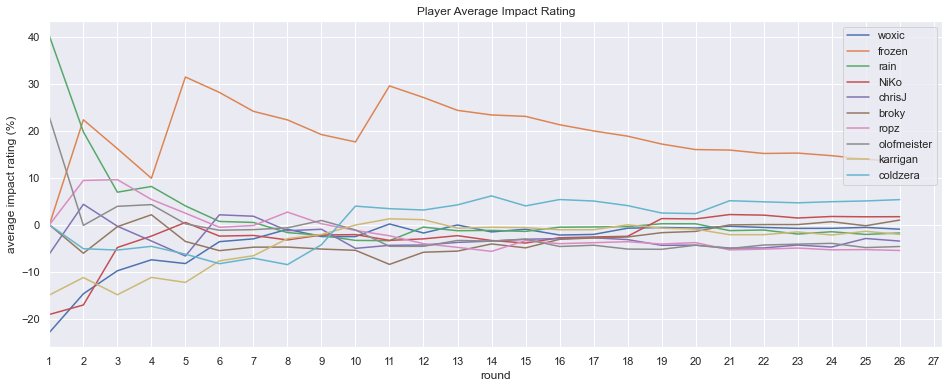

In [4]:
plt.figure(figsize=(16, 6))
for p in data['players']:
    rounds = [0]
    ratings = [0]
    for i, r in enumerate(p['roundRatings']):
        prev = ratings[-1] * rounds[-1]
        rounds.append(i+1)
        ratings.append((prev + r['totalRating'] * 100.0) / (i+1))
    plt.plot(rounds[1:], ratings[1:], label=p['name'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1,)
plt.legend()

plt.title('Player Average Impact Rating')
plt.xlabel('round')
plt.ylabel('average impact rating (%)')

plt.show()

The previous plot shows that coldzera started the map slowly, only achieving a positive average Impact Rating at round 10, but performs well from this point onwards, ending the map with a very strong average Impact Rating. Meanwhile, frozen quickly accumulates high Impact Rating values, keeping his average very high for the whole duration of the map.

## Individual Player Results

Let's break down frozen's performance to understand why they achieved this map's highest average Impact Rating.

### Round-By-Round Impact Rating

The following plot shows frozen's rating in each of the 26 rounds played.

**Note:** unlike the previous plot of **average** Impact Ratings, this simply shows the frozen's rating in each individual round.

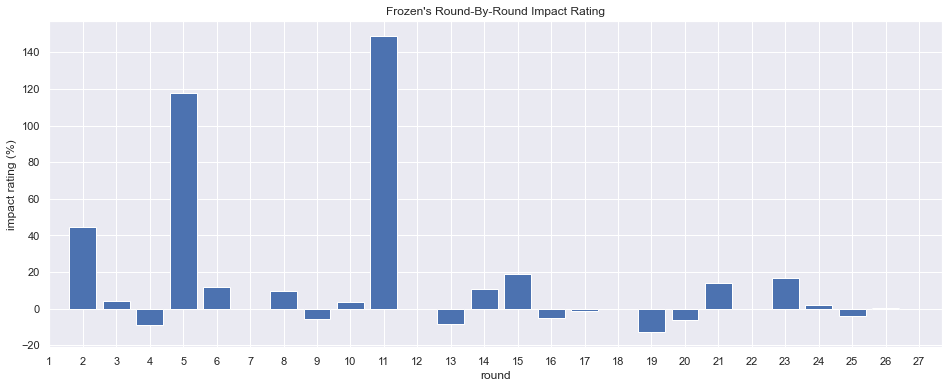

In [5]:
f_rounds = []
f_ratings = []
for p in data['players']:
    if p['name'] == 'frozen':
        for r in p['roundRatings']:
            f_rounds.append(r['round']['number'])
            f_ratings.append(r['totalRating'] * 100.0)

plt.figure(figsize=(16, 6))
plt.bar(f_rounds, f_ratings)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Frozen\'s Round-By-Round Impact Rating')
plt.xlabel('round')
plt.xlim(1,)
plt.ylabel('impact rating (%)')
plt.show()

This shows that frozen ended very few rounds with a substantial negative Impact Rating, and played a key role in three rounds specifically: 2, 5, and 11.

### Single Round Breakdown

Let's look at **round 5** in detail, to see how frozen achieved such a high Impact Rating. The round in question can be viewed in the VOD below:

In [6]:
HTML('<center><iframe width="960" height="500" src="https://www.youtube.com/embed/9X7KpyXN5P0?start=674&end=815&version=3" frameborder="0" allowfullscreen></iframe></center>')

As you can see, Faze have full-bought into the round, whereas mousesports have chosen to full-eco, purchasing only a single flashbang. Mousesports end up winning the round after trading favourably in mid early, before Faze respond with entry kills leaving coldzera in a 1v2. He kills the first and plants the bomb, before frozen wins the 1v1 and defuses to win the round.

Let's first plot the **round outcome prediction probabilities**, to get an idea of how the model evaluated the round as it progressed. Annotations have been added to the plot to show the events that caused each change in prediction. The y-axis in this plot represents the predicted probability of a T-side round win.

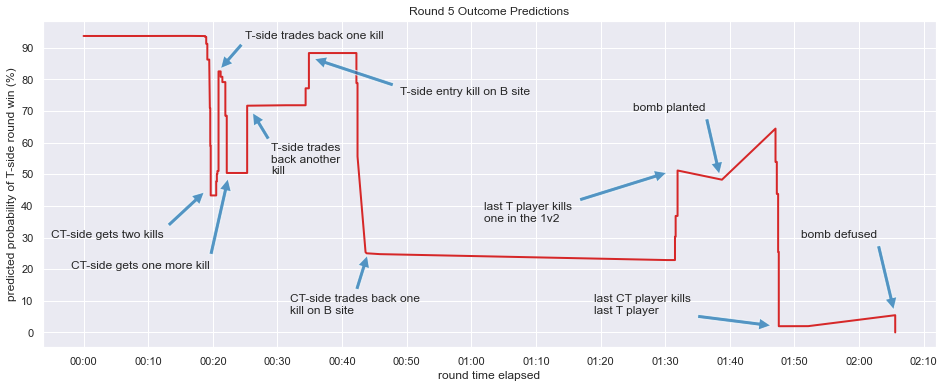

In [7]:
r_times = []
r_preds = []
round_start_tick = None

for rop in data['roundOutcomePredictions']:
    if rop['round']['number'] == 5:
        if round_start_tick == None:
            round_start_tick = rop['tick']
        r_times.append((rop['tick'] - round_start_tick) / 128)
        r_preds.append(rop['outcomePrediction'] * 100.0)

plt.figure(figsize=(16, 6))
plt.plot(r_times, r_preds, lw=2, c='tab:red')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
formatter = ticker.FuncFormatter(lambda s, x: time.strftime('%M:%S', time.gmtime(s)))
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('round time elapsed')
plt.ylabel('predicted probability of T-side round win (%)')

plt.title('Round 5 Outcome Predictions')

# hardcode some annotations in
arrowprops = {'facecolor': 'tab:blue', 'shrink': 0.05, 'alpha': 0.75}
plt.gca().annotate('CT-side gets two kills', xy=(19, 45), xytext=(-5, 30), arrowprops=arrowprops)
plt.gca().annotate('T-side trades back one kill', xy=(21, 83), xytext=(25, 93), arrowprops=arrowprops)
plt.gca().annotate('CT-side gets one more kill', xy=(22.5, 50), xytext=(-2, 20), arrowprops=arrowprops)
plt.gca().annotate('T-side trades\nback another\nkill', xy=(26, 70), xytext=(29, 50), arrowprops=arrowprops)
plt.gca().annotate('T-side entry kill on B site', xy=(35, 87), xytext=(49, 75), arrowprops=arrowprops)
plt.gca().annotate('CT-side trades back one\nkill on B site', xy=(44, 25), xytext=(32, 6), arrowprops=arrowprops)
plt.gca().annotate('last T player kills\none in the 1v2', xy=(91, 51), xytext=(62, 35), arrowprops=arrowprops)
plt.gca().annotate('bomb planted', xy=(98.5, 49), xytext=(85, 70), arrowprops=arrowprops)
plt.gca().annotate('last CT player kills\nlast T player', xy=(107, 2), xytext=(79, 6), arrowprops=arrowprops)
plt.gca().annotate('bomb defused', xy=(125.5, 6), xytext=(111, 30), arrowprops=arrowprops)

plt.show()

As you can see, the initial buys from both teams has led the model to initially predict a very likely T-side round win (~95% probability). As the round progresses, the prediction changes dramatically, and ends with a certain CT round win as the final kill is found and the bomb is defused.

Now let's look at how frozen's individual Impact Rating changes as the round develops.

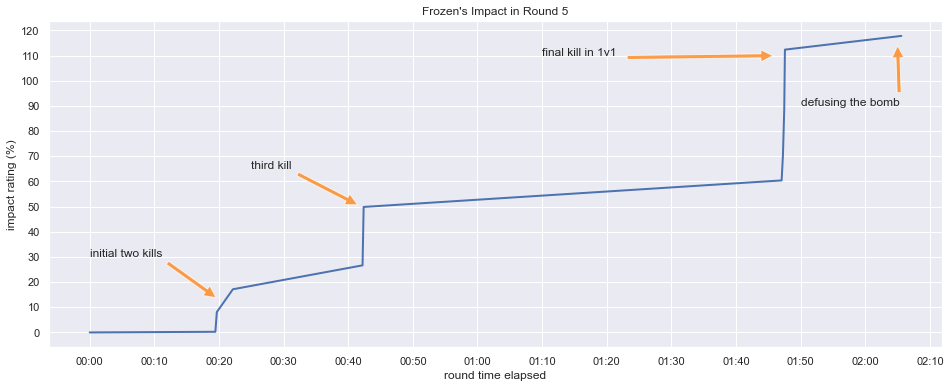

In [8]:
frozen_id = 76561198068422762
f_times = [0]
f_ratings = [0]
round_start_tick = None

for rop in data['roundOutcomePredictions']:
    if rop['round']['number'] == 5 and round_start_tick == None:
        round_start_tick = rop['tick']

for rc in data['ratingChanges']:
    if rc['round']['number'] == 5:
        if rc['player'] == frozen_id:
            f_times.append((rc['tick'] - round_start_tick) / 128)
            f_ratings.append(f_ratings[-1] + rc['change'] * 100.0)

plt.figure(figsize=(16, 6))
plt.plot(f_times, f_ratings, lw=2)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
formatter = ticker.FuncFormatter(lambda s, x: time.strftime('%M:%S', time.gmtime(s)))
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('round time elapsed')
plt.ylabel('impact rating (%)')

plt.title('Frozen\'s Impact in Round 5')

# hardcode some annotations in
arrowprops = {'facecolor': 'tab:orange', 'shrink': 0.05, 'alpha': 0.75}
plt.gca().annotate('initial two kills', xy=(20, 13), xytext=(0, 30), arrowprops=arrowprops)
plt.gca().annotate('third kill', xy=(42, 50), xytext=(25, 65), arrowprops=arrowprops)
plt.gca().annotate('final kill in 1v1', xy=(107, 110), xytext=(70, 110), arrowprops=arrowprops)
plt.gca().annotate('defusing the bomb', xy=(125, 115), xytext=(110, 90), arrowprops=arrowprops)
plt.show()

As you can see, frozen was directly involved in multiple events during the round which swayed the round into his team's favour.

## Round Impact Viewer

Use the dropdown lists below to view the Impact Rating of any chosen player over any chosen round in the match.

In [9]:
player_ids = {}
for p in data['players']:
    player_ids[p['name']] = p['steamID']

out = widgets.Output()
player_dd = widgets.Dropdown(
    options=['frozen','woxic','chrisJ','ropz','karrigan','coldzera','broky','NiKo','olofmeister','rain'],
    value='frozen',
    description='Player:',
    disabled=False,
)

round_dd = widgets.Dropdown(
    options=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
    value=1,
    description='Round:',
    disabled=False,
)

button = widgets.Button(description='Plot')

def update(b):
    with out:
        clear_output()

        plt.figure(figsize=(16, 12))
        ax1 = plt.subplot(211)

        # show the round outcome predictions plot
        r_times = []
        r_preds = []
        round_start_tick = None

        for rop in data['roundOutcomePredictions']:
            if rop['round']['number'] == round_dd.value:
                if round_start_tick == None:
                    round_start_tick = rop['tick']
                r_times.append((rop['tick'] - round_start_tick) / 128)
                r_preds.append(rop['outcomePrediction'] * 100.0)

        plt.plot(r_times, r_preds, lw=2, c='tab:red')

        plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
        plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
        formatter = ticker.FuncFormatter(lambda s, x: time.strftime('%M:%S', time.gmtime(s)))
        plt.gca().xaxis.set_major_formatter(formatter)

        plt.xlabel('round time elapsed')
        plt.ylabel('predicted probability of T-side round win (%)')

        plt.title('Round {} Outcome Predictions'.format(round_dd.value))
        
        ax2 = plt.subplot(212, sharex=ax1)
        plt.xlabel('round time elapsed')
        plt.ylabel('impact rating (%)')
        ax2.set_title('{}\'s Impact in Round {}'.format(player_dd.value, round_dd.value))
        
        p_times = [0]
        p_ratings = [0]       
        
        for rc in data['ratingChanges']:
            if rc['round']['number'] == round_dd.value:
                if rc['player'] == player_ids[player_dd.value]:
                    p_times.append((rc['tick'] - round_start_tick) / 128)
                    p_ratings.append(p_ratings[-1] + rc['change'] * 100.0)
        
        if len(p_ratings) == 1:
            plt.show()
            print('{} did not have any impact in round {}'.format(player_dd.value, round_dd.value))
        else:
            plt.plot(p_times, p_ratings, lw=2)

            plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
            plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
            plt.gca().xaxis.set_major_formatter(formatter)

            plt.show()
            print('{}\'s final Impact Rating for round {}: {:.3f}%'.format(player_dd.value, round_dd.value, p_ratings[-1]))

button.on_click(update)
display(widgets.VBox([
    widgets.HBox([player_dd, round_dd, button]),
    out
]))
update(None)